# **Aprendizaje por refuerzo en robótica móvil**

## **Inteligencia Artificial**
### Grado en Ingeniería Informática - Ingeniería del Software
### Curso 2023/2024

## **Integrantes**
- Andrés Francisco García Rivero
- Jorge Muñoz Rodríguez

## **Introducción y objetivo**

El aprendizaje por refuerzo [1, 2, 3, 4] es un paradigma de aprendizaje automático en el que un agente interactúa con un entorno, observa las señales de recompensa o penalización resultantes de sus acciones y ajusta su comportamiento para maximizar la recompensa acumulada a lo largo del tiempo. En esencia, el agente aprende a través de la experiencia, tomando decisiones secuenciales para alcanzar sus objetivos basándose en la retroalimentación que recibe del entorno.

Dicho paradigma está estrechamente relacionado con los procesos de decisión de Markov (MDP por sus siglas en inglés), ya que muchos algoritmos de aprendizaje por refuerzo se basan en la teoría y los principios subyacentes de los MDP para tomar decisiones secuenciales en entornos dinámicos.

Los MDP son un marco matemático que modeliza las interacciones entre un agente que toma decisiones y un entorno estocástico en el que esas decisiones tienen consecuencias. En un MDP, el agente toma decisiones en cada paso de tiempo para maximizar una medida de rendimiento (generalmente la recompensa acumulada a lo largo del tiempo) en presencia de la incertidumbre en el entorno.

Los algoritmos de aprendizaje por refuerzo, como Q-Learning, SARSA, y algoritmos basados en políticas, utilizan los MDP para modelizar el entorno y calcular estrategias óptimas para tomar decisiones secuenciales. Estos algoritmos aprenden iterativamente a partir de la experiencia, ajustando sus políticas de acción para maximizar la recompensa esperada, utilizando técnicas como la exploración y la explotación para equilibrar el aprendizaje y la toma de decisiones.

En este trabajo nos centraremos en una sencilla aplicación del aprendizaje por refuerzo a la robótica móvil, en dónde un robot con ruedas debe planificar una ruta en un entorno con obstáculos. Para simplificar el problema, consideraremos discreto tanto el espacio de estados como el espacio de acciones. No obstante, el efecto de las acciones será estocástico. El objetivo será, por tanto, encontrar una política para navegar hacia el destino minimizando la posibilidad de colisionar con los obstáculos. Para ello, se utilizarán y compararán diferentes algoritmos de aprendizaje por refuerzo.

## **Trabajo a realizar**

El trabajo consistirá en aplicar algoritmos de aprendizaje por refuerzo para la resolución del problema descrito, es decir, supondremos desconocida tanto la función de transición como la función de recompensa.

- Resolución del problema utilizando Q-Learning, para ello se puede usar la biblioteca mdptoolbox.
- Implementación propia del algoritmo Monte-Carlo.
- Implementación propia del algoritmo SARSA.
- Comparativa de algoritmos y valores de hiperparámetros sobre el mapa de ejemplo.
- Diseño de dos nuevos mapas y comparativa de algoritmos y valores de hiperparámetros.


### **Bibliotecas utilizadas**

En este proyecto, emplearemos las siguientes bibliotecas de Python, que son esenciales para el procesamiento de datos, la modelación de procesos de decisión y la visualización de resultados:

- **NumPy**: Una biblioteca fundamental para la computación científica con Python. Proporciona soporte para arrays y matrices grandes y multidimensionales, junto con una colección de funciones matemáticas para operar con estos arrays.

- **MDP Toolbox**: Utilizada para la implementación de algoritmos de procesos de decisión de Markov (MDP). Nos permite modelar y resolver MDPs.

- **Matplotlib**: Una biblioteca de trazado para la visualización de datos en Python. Nos facilitará la creación de gráficos estáticos, animados e interactivos.

In [58]:
import numpy as np
import mdptoolbox.mdp as mdp
import matplotlib.pyplot as plt

### **Funciones comunes**

### Estableciendo la Semilla en NumPy

Para asegurar la reproducibilidad en procesos que dependen de la generación de números aleatorios, es fundamental establecer una semilla utilizando NumPy. Esto es esencial para la ciencia de datos y algoritmos que requieren resultados consistentes en diferentes ejecuciones.


In [59]:
np.random.seed(357823)

### Constantes de Penalización

- **`K1 = -1000`**: Esta penalización se aplica cuando el robot decide permanecer en espera (`wait`) en una posición que no es el destino.

- **`K2 = -10000`**: Se utiliza esta penalización mucho más severa cuando el robot se encuentra en un obstáculo.

- **`Perror = 0.1`**: Representa la probabilidad de que ocurra un error en el movimiento del robot.



In [60]:
K1 = -1000
K2 = -10000
Perror = 0.1

### Descripción de Funciones en el Proyecto

#### `lee_mapa(fichero)`
- **Descripción**: Lee un mapa desde un archivo y convierte las líneas en una matriz de numpy, donde '1' representa paredes y '0' caminos. También extrae las coordenadas del destino.
- **Parámetros**:
  - `fichero`: Nombre del archivo del que se lee el mapa.

#### `inicializa_posicion(mapa, destino)`
- **Descripción**: Inicializa una posición aleatoria en el mapa que no sea una pared o el destino.
- **Parámetros**:
  - `mapa`: Matriz del mapa.
  - `destino`: Coordenadas del punto de destino.

#### `visualiza_mapa()`
- **Descripción**: Visualiza el mapa utilizando Matplotlib, mostrando paredes y caminos con diferentes colores.
  
#### `hay_colision(estado)`
- **Descripción**: Verifica si la posición actual es una colisión, es decir, si es una pared.
- **Parámetros**:
  - `estado`: Coordenadas del estado actual.

#### `aplica_accion(estado, accion)`
- **Descripción**: Aplica una acción al estado actual y devuelve el nuevo estado teniendo en cuenta las colisiones y los límites del mapa.
- **Parámetros**:
  - `estado`: Estado actual.
  - `accion`: Acción a aplicar.

#### `obtiene_recompensa(estado, accion)`
- **Descripción**: Calcula la recompensa basada en la acción tomada y el nuevo estado después de aplicar la acción.
- **Parámetros**:
  - `estado`: Estado actual.
  - `accion`: Acción aplicada.

#### `visualiza_politica(politica)`
- **Descripción**: Visualiza el mapa con las políticas aplicadas, mostrando la dirección de cada acción en el mapa.
- **Parámetros**:
  - `politica`: Lista de acciones para cada estado.

#### `visualiza_recompensas()`
- **Descripción**: Visualiza el mapa con colores que representan la magnitud de las recompensas en cada posición.

#### `visualiza_politica_letras(politica, mapa, destino)`
- **Descripción**: Visualiza el mapa y sobreimpresiona las políticas en forma de texto, marcando claramente las acciones en cada posición y destacando el destino.
- **Parámetros**:
  - `politica`: Lista de acciones para cada estado.
  - `mapa`: Matriz del mapa.
  - `destino`: Coordenadas del punto de destino.


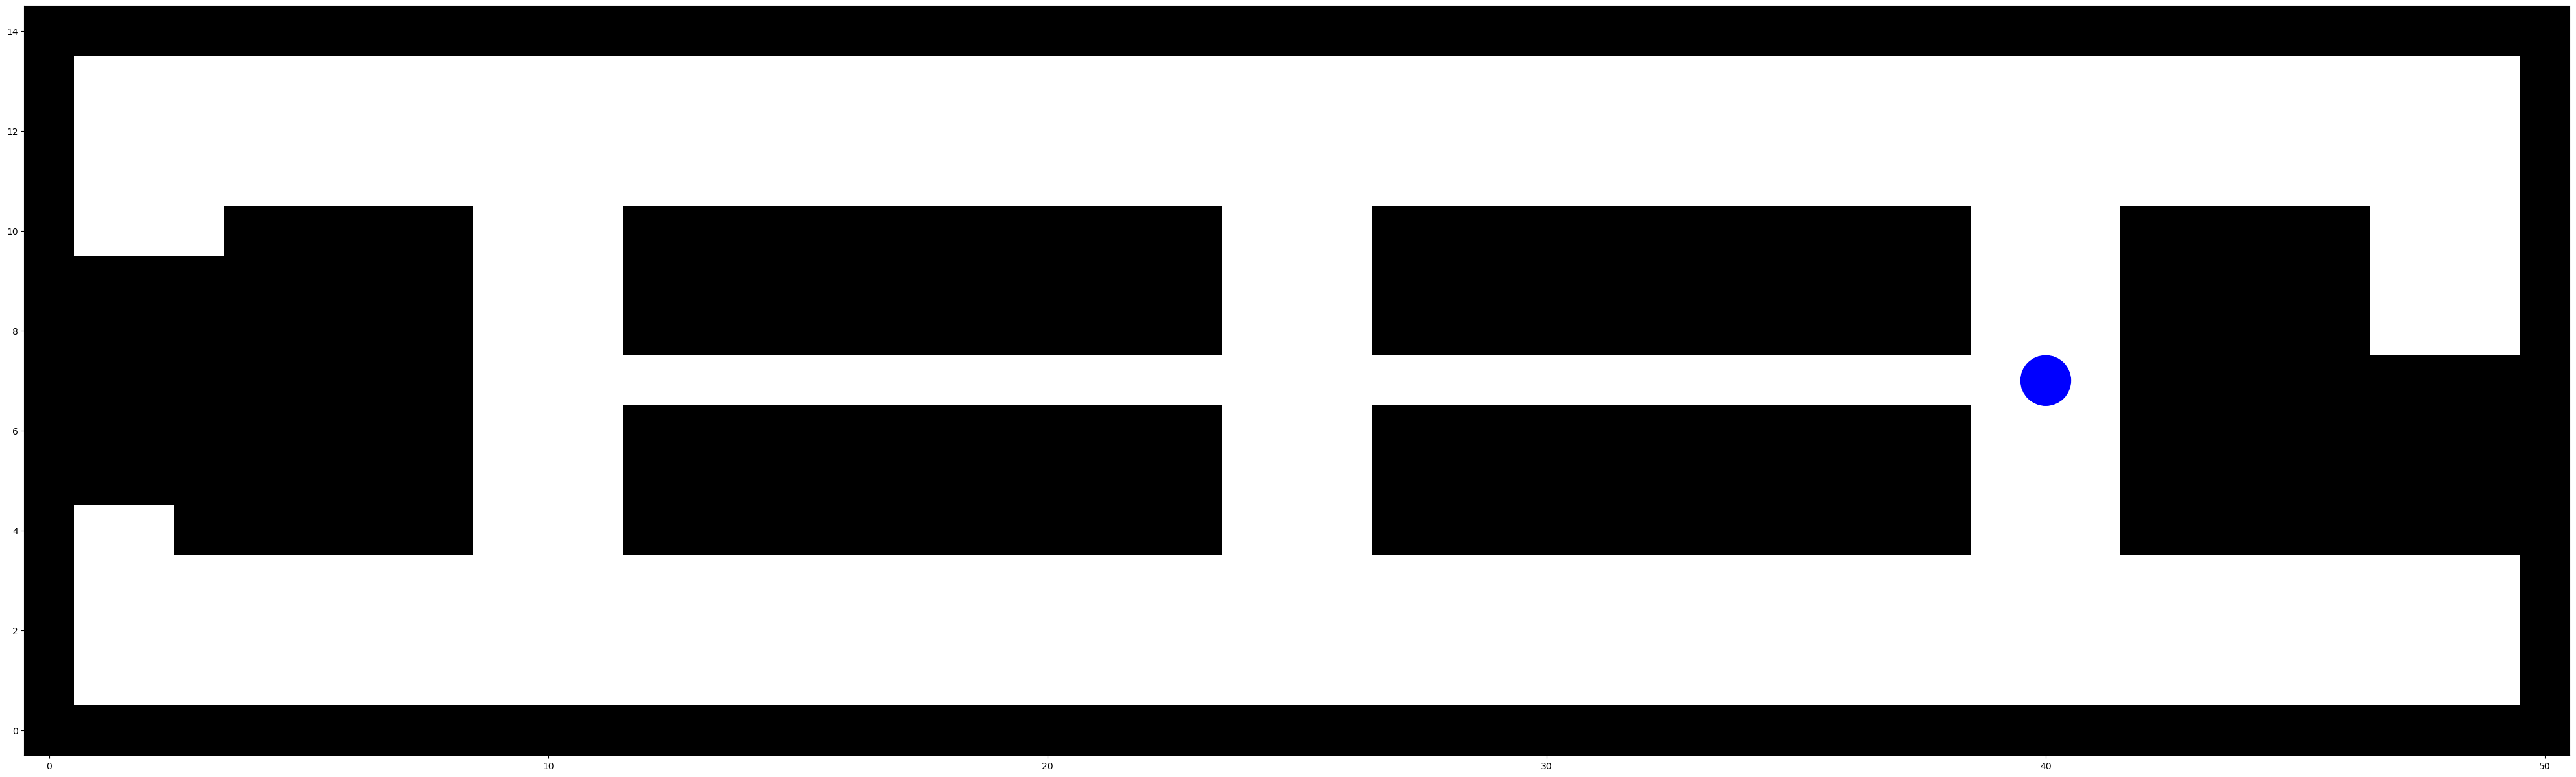

In [61]:
def lee_mapa(fichero):
    with open(fichero,'r') as archivo:
        lineas = archivo.readlines()
    numeros = [float(numero) for numero in lineas[0].split()]
    lineas.pop(0)
    lineas.reverse()
    matriz = []
    for linea in lineas:
        fila = [int(caracter) for caracter in linea.strip()]
        matriz.append(fila)
    return np.array(matriz),(int(numeros[0]),int(numeros[1]))

mapa,destino = lee_mapa("map.txt")
m,n = mapa.shape
movimientos = {
    'wait': (0, 0), 'N': (0, 1), 'NE': (1, 1), 'E': (1, 0),
    'SE': (1, -1), 'S': (0, -1), 'SO': (-1, -1), 'O': (-1, 0), 'NO': (-1, 1)
}
nav_estados = [(i, j) for i in range(n) for j in range(m)]
nav_acciones = ['wait','N','NE','E','SE','S','SO','O','NO']

def parsea_politica_ql(ql):
    return [nav_acciones[i] for i in ql.policy]

def inicializa_posicion(mapa, destino):
    inicio = np.random.randint(n), np.random.randint(m)
    intentos = 0
    max_intentos = 1000
    while mapa[inicio[1],inicio[0]] == 1 or inicio == destino:
        inicio = np.random.randint(n), np.random.randint(m)
        intentos += 1
        if intentos > max_intentos:
            raise ValueError("No se pudo encontrar una posición inicial válida.")
    return inicio

def visualiza_mapa():
    plt.figure(figsize=(len(mapa[0]), len(mapa)))
    plt.imshow(1-mapa, cmap='gray', interpolation='none')
    plt.xlim(-0.5, len(mapa[0]) - 0.5)
    plt.ylim(-0.5, len(mapa) - 0.5)
    plt.gca().add_patch(plt.Circle(destino,radius = 0.5,edgecolor = 'blue', facecolor = 'blue'))
    
def hay_colision(estado):
    return mapa[estado[1],estado[0]] == 1

def aplica_accion(estado, accion):
    if hay_colision(estado):
        return estado
    x = estado[0] + movimientos[accion][0]
    y = estado[1] + movimientos[accion][1]
    if x < 1 or x >= mapa.shape[1]-1 or y < 1 or y >= mapa.shape[0]-1 or hay_colision((x, y)):
        return estado
    return x, y

def obtiene_recompensa_simple(estado):
    if hay_colision(estado):
        valor = K1
    else:
        valor = - np.sqrt( (estado[0]-destino[0])**2 + (estado[1]-destino[1])**2)*0.5
    return valor

def obtiene_recompensa(estado, accion):
    nuevo_estado = aplica_accion(estado, accion)
    if hay_colision(nuevo_estado):
        return K2
    if accion == 'wait' and estado != destino:
        return K1
    return -np.sqrt((nuevo_estado[0] - destino[0])**2 + (nuevo_estado[1] - destino[1])**2)*0.5

def visualiza_politica(politica):
    visualiza_mapa()
    for p in zip(nav_estados,politica):
        accion = p[1]
        if accion=='wait':
            if not hay_colision(p[0]):
                plt.text(p[0][0],p[0][1],'WAIT',fontsize=40,ha='center',va='center', color='red', fontweight='bold')
            continue
        estado = p[0]
        e1 = aplica_accion(estado,accion)
        x0 = estado[0]
        y0 = estado[1]
        x1 = e1[0]
        y1 = e1[1]
        
        plt.gca().arrow(x0, y0, (x1 - x0)*0.6, (y1 - y0)*0.6,
        head_width=0.3, head_length=0.3, fc='black', ec='black')

def visualiza_recompensas():
    visualiza_mapa()
    recompensas = [obtiene_recompensa_simple(e) for e in nav_estados]
    recompensas = [np.nan if elemento == K1 else elemento for elemento in recompensas]
    max_recompensa = np.nanmax(recompensas)
    min_recompensa = np.nanmin(recompensas)
    for e in nav_estados:
        r = obtiene_recompensa_simple(e)
        if r == K1:
            continue
        a = (r-min_recompensa)/(max_recompensa-min_recompensa)
        rect = plt.Rectangle((e[0] - 0.5, e[1] - 0.5), 1, 1, alpha = a,linewidth=1, edgecolor='blue', facecolor='blue')
        plt.gca().add_patch(rect)
        
def visualiza_politica_letras(politica, mapa, destino):
    plt.figure(figsize=(20, 20))
    plt.imshow(1 - mapa, cmap='gray', origin='lower')

    plt.gca().add_patch(plt.Circle(destino, radius=0.3, edgecolor='red', facecolor='red', label='Destino'))

    for i in range(n):
        for j in range(m):
            if mapa[j, i] == 0:
                s_index = i * m + j
                accion = nav_acciones[politica[s_index]]
                if accion == 'wait':
                    print(f"Esperar en {i, j}")
                    plt.text(i, j, 'WAIT', ha='center', va='center', color='blue', fontsize=12)
                else:
                    plt.text(i, j, accion, ha='center', va='center', color='brown', fontsize=12)

    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Destino'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Wait'),
    ])
    plt.show()
    
visualiza_mapa()

### **Apartado 1: Implementación mediante Q-Learning**

Q-learning es un algoritmo de aprendizaje por refuerzo basado en la idea de aprendizaje mediante ensayo y error. Su principal objetivo es descubrir la estrategia óptima que guía las acciones del agente para maximizar el valor esperado de las recompensas futuras. El agente aprende a estimar el valor de cada acción posible en un estado específico.

#### Componentes de Q-Learning

- `Estados (S):` El conjunto de todos los posibles estados en el entorno.

- `Acciones (A):` El conjunto de todas las posibles acciones que el agente puede tomar.

- `Recompensas (R):` La recompensa inmediata recibida después de la transición de un estado a otro al tomar una acción específica.

- `Valores Q (Q):` Una tabla o función que asigna pares estado-acción a valores, representando el beneficio a largo plazo de tomar una acción en un estado específico.


#### `crea_recompensas_sistema()`
- **Descripción**: Genera una matriz de recompensas para cada estado y acción posible en el sistema.
- **Proceso**:
  - Itera sobre cada estado en `nav_estados`.
  - Para cada estado, calcula la recompensa para cada acción posible usando la función `obtiene_recompensa`.
  - La matriz resultante tiene dimensiones `[número de estados] x [número de acciones]`.

#### `crea_transiciones_movimiento(accion, prob_error)`
- **Descripción**: Construye la matriz de transiciones para una acción específica considerando una probabilidad de error en el movimiento.
- **Parámetros**:
  - `accion`: La acción para la cual se construye la matriz de transición.
  - `prob_error`: Probabilidad de que la acción resulte en un movimiento erróneo.
- **Proceso**:
  - Itera sobre cada estado, calculando el resultado de la acción aplicada.
  - Ajusta las probabilidades en la fila de transiciones para cada estado basándose en la acción principal y posibles errores.

#### `crea_transiciones_sistema(prob_error)`
- **Descripción**: Genera un conjunto completo de matrices de transiciones para todas las acciones posibles en el sistema.
- **Parámetros**:
  - `prob_error`: Probabilidad de error utilizada para todas las acciones.
- **Proceso**:
  - Utiliza `crea_transiciones_movimiento` para cada acción en `nav_acciones`.
  - Compila las matrices en un arreglo tridimensional que representa las transiciones para cada acción.

#### `obtiene_indice_estado(estado)`
- **Descripción**: Calcula el índice lineal de un estado en la matriz de transiciones o recompensas.
- **Parámetros**:
  - `estado`: Coordenadas del estado en el mapa.
  
#### `obtiene_posibles_errores(accion)`
- **Descripción**: Devuelve una lista de posibles errores de movimiento asociados con una acción específica.
- **Parámetros**:
  - `accion`: La acción principal que podría tener errores asociados.

In [62]:
def crea_recompensas_sistema():
    matriz = []
    for e in nav_estados:
        fila = [obtiene_recompensa(e, accion) for accion in nav_acciones]
        matriz.append(fila)
    return np.array(matriz)

nav_recompensas_sistema = crea_recompensas_sistema()

def obtiene_indice_estado(estado):
    return int(estado[0]*mapa.shape[0]+estado[1])

def obtiene_posibles_errores(accion):
    errores_dict = {
        'N': ['NE', 'NO'], 'S': ['SE', 'SO'], 'E': ['NE', 'SE'], 'O': ['NO', 'SO'],
        'NE': ['N', 'E'], 'NO': ['N', 'O'], 'SE': ['S', 'E'], 'SO': ['S', 'O']
    }
    return errores_dict.get(accion, [])

def crea_transiciones_movimiento(accion, prob_error):
    matriz = []
    for e0 in nav_estados:
        fila = [0] * len(nav_estados)
        if hay_colision(e0):
            fila[obtiene_indice_estado(e0)] = 1
        else:
            goal = aplica_accion(e0, accion)
            if prob_error == 0:
                fila[obtiene_indice_estado(goal)] = 1
            else:
                errores = obtiene_posibles_errores(accion)
                fila[obtiene_indice_estado(goal)] = 1 - prob_error
                for error in errores:
                    goal_error = aplica_accion(e0, error)
                    fila[obtiene_indice_estado(goal_error)] += prob_error / len(errores)
        suma_fila = sum(fila)
        if suma_fila != 1:
            fila = [x / suma_fila for x in fila]
        matriz.append(fila)
    return np.array(matriz)

def crea_transiciones_sistema(prob_error):
    return np.array([crea_transiciones_movimiento(accion, prob_error) for accion in nav_acciones])

nav_transiciones_sistema = crea_transiciones_sistema(Perror)


#### Q-Learning con mdptoolbox y Diferentes Valores del Factor de Descuento

Ahora vamos a realizar una prueba utilizando el algoritmo Q-Learning implementado en la biblioteca `mdptoolbox`. Probaremos con diferentes valores del factor de descuento $\gamma$	 para observar cómo afectan al comportamiento del agente. El factor de descuento $\gamma$ es un número entre 0 y 1 que determina la importancia de las recompensas futuras frente a las recompensas inmediatas. Valores más altos de $\gamma$ harán que el agente valore más las recompensas a largo plazo, mientras que valores más bajos harán que el agente se concentre en las recompensas inmediatas.

#### Valores del Factor de Descuento $\gamma$	 y su Impacto

- **$\gamma$ = 0**:
  - **Impacto**: Solo se consideran las recompensas inmediatas.
  - **Comportamiento**: El agente toma decisiones basadas únicamente en las recompensas inmediatas, sin considerar el futuro.

- **$\gamma$ = 0.5**:
  - **Impacto**: Las recompensas futuras se valoran, pero con menor peso.
  - **Comportamiento**: El agente equilibra entre recompensas inmediatas y futuras, considerando el futuro pero no de manera determinante.

- **$\gamma$ = 0.9**:
  - **Impacto**: Las recompensas futuras son casi tan importantes como las inmediatas.
  - **Comportamiento**: El agente toma decisiones que maximizan las recompensas a largo plazo.

#### Q-Learning - $\gamma$ = 0.5 y 30,000 Iteraciones

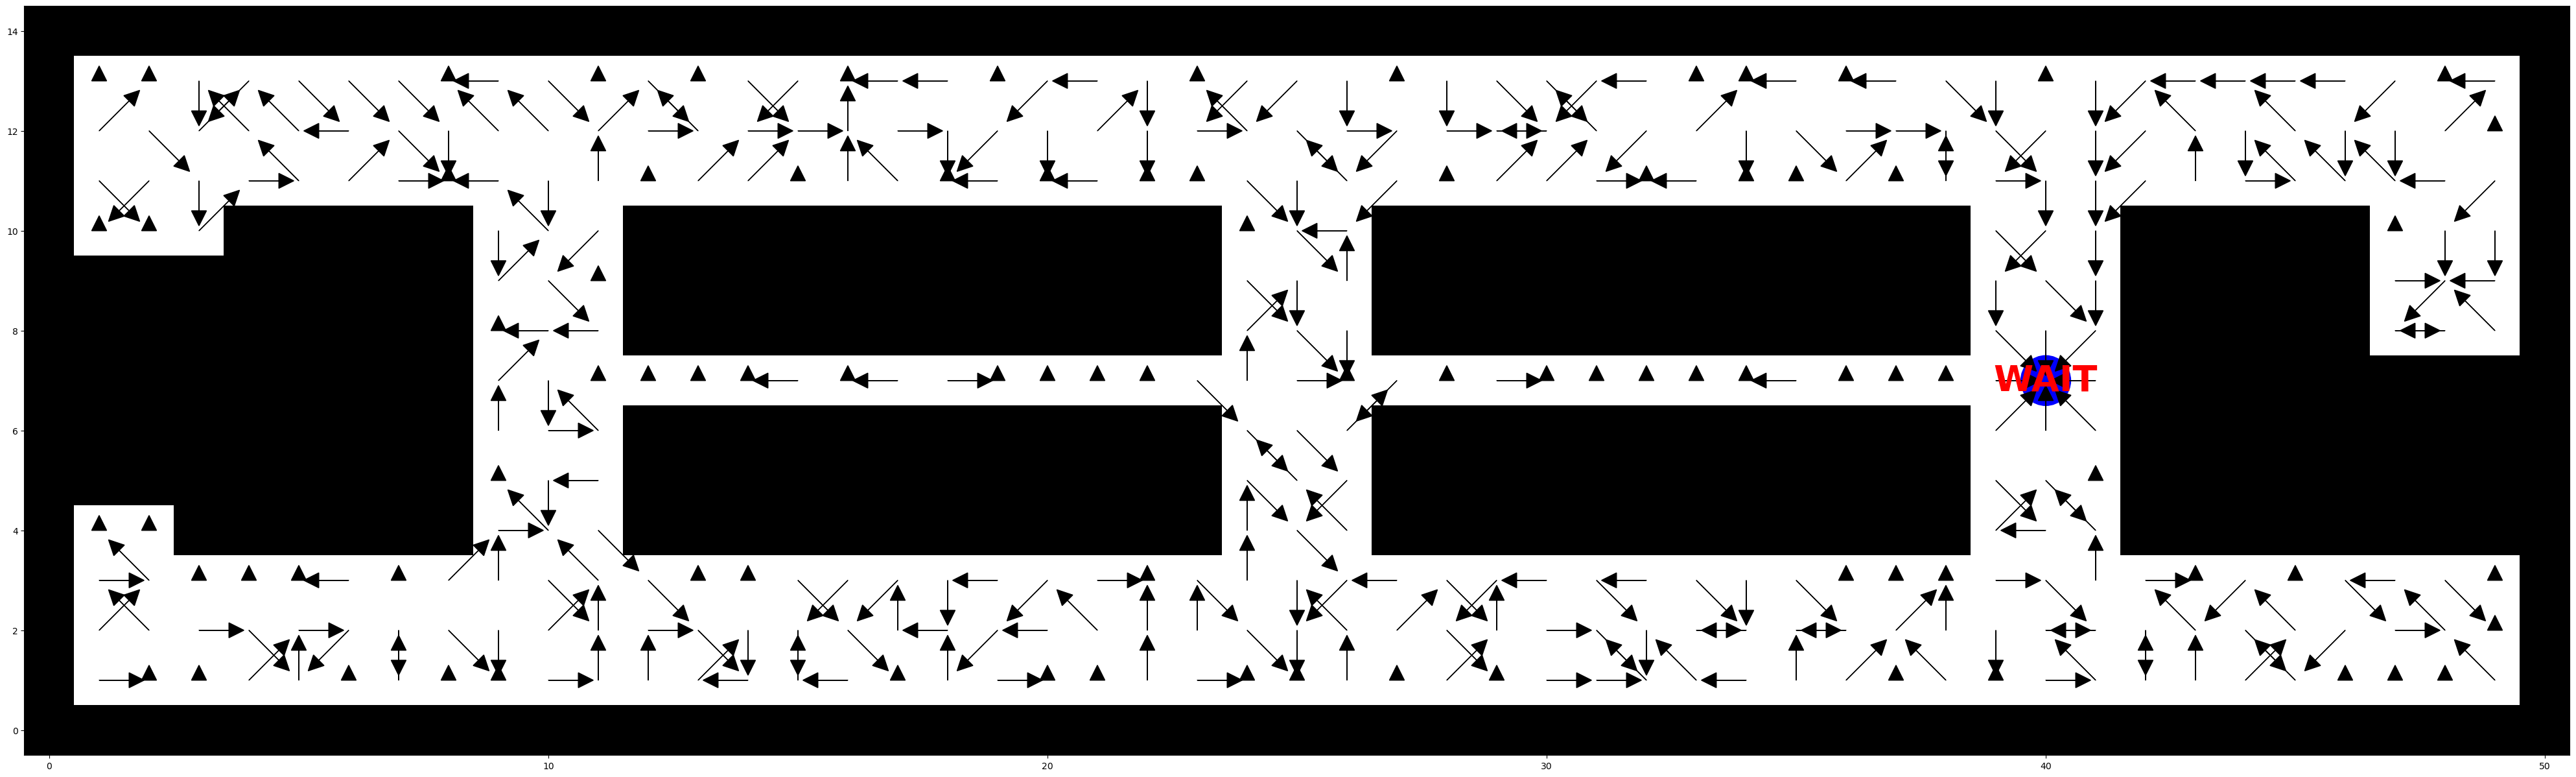

In [63]:
ql_discount_low = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.5, n_iter=30000)
ql_discount_low.run()
politica_ql_discount_low = parsea_politica_ql(ql_discount_low)
visualiza_politica(politica_ql_discount_low)

#### Q-Learning - $\gamma$ = 0.75 y 30,000 Iteraciones

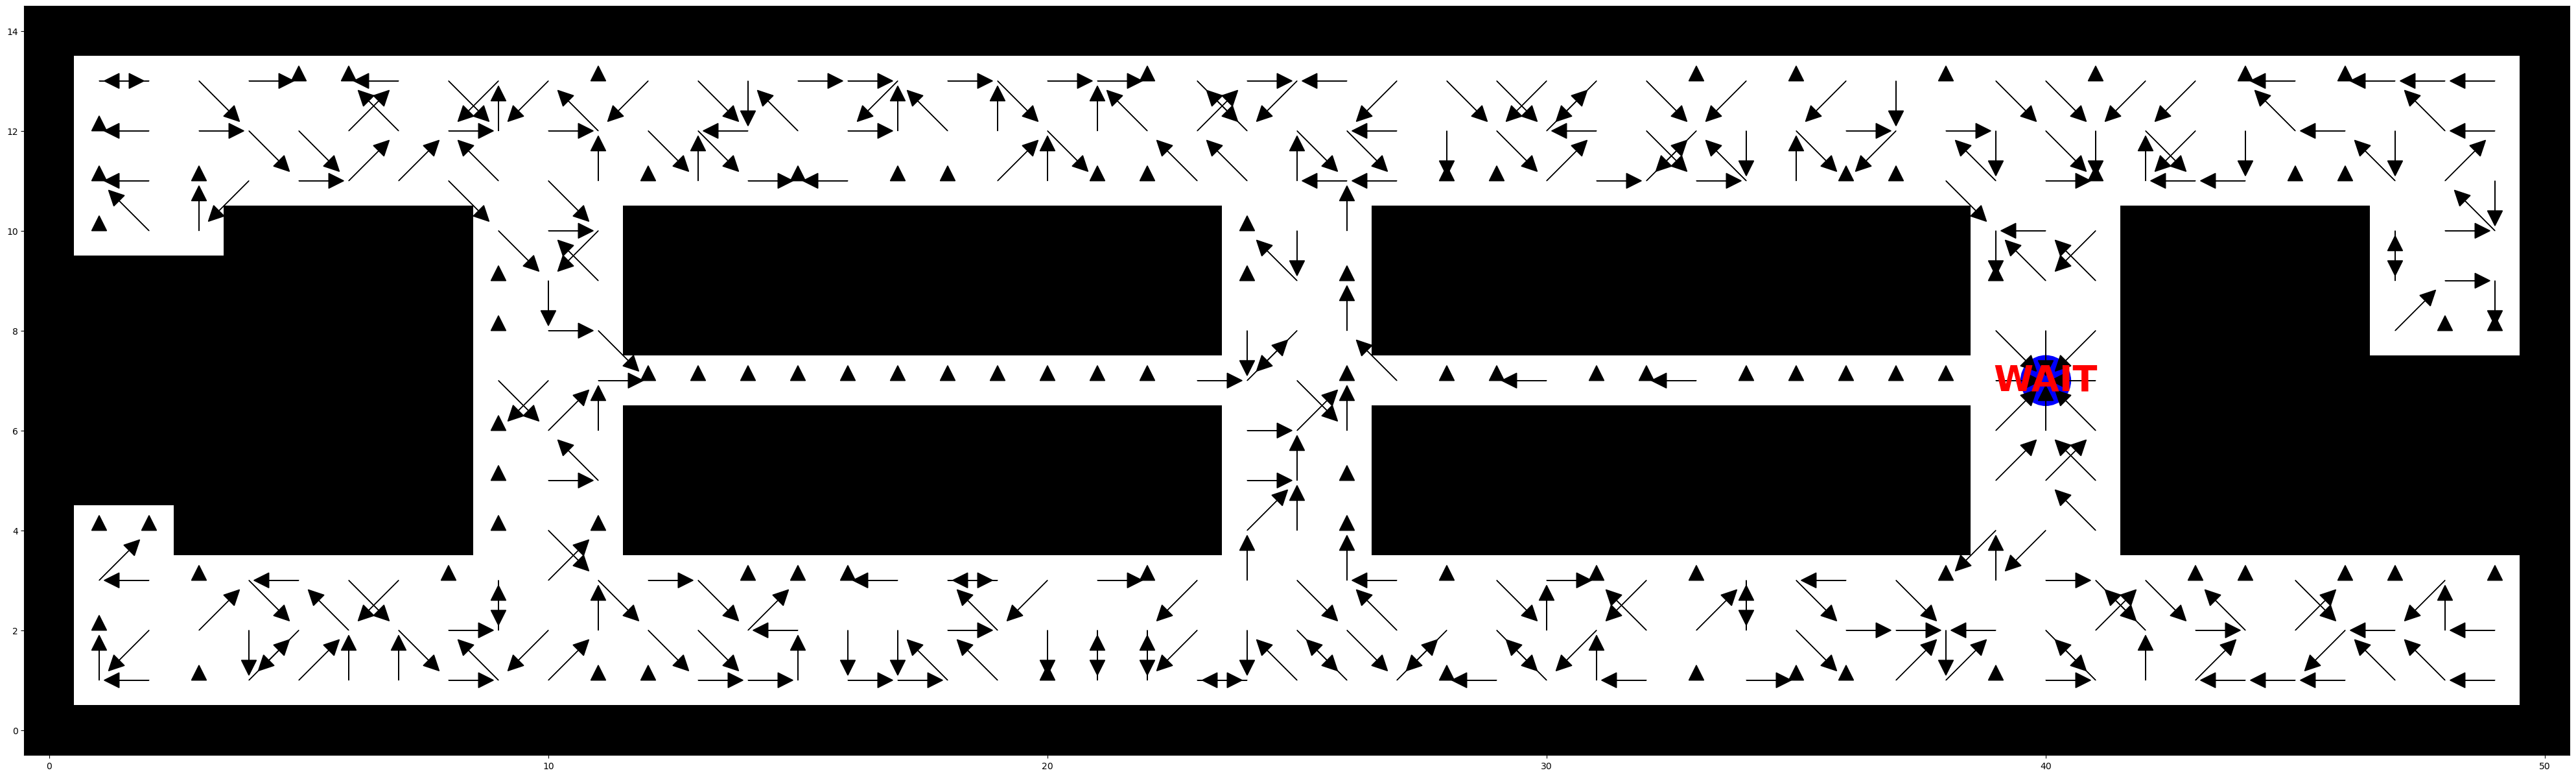

In [64]:
ql_discount_mid = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.75, n_iter=30000)
ql_discount_mid.run()
politica_ql_discount_mid = parsea_politica_ql(ql_discount_mid)
visualiza_politica(politica_ql_discount_mid)

#### Q-Learning - $\gamma$ = 0.90 y 30,000 Iteraciones

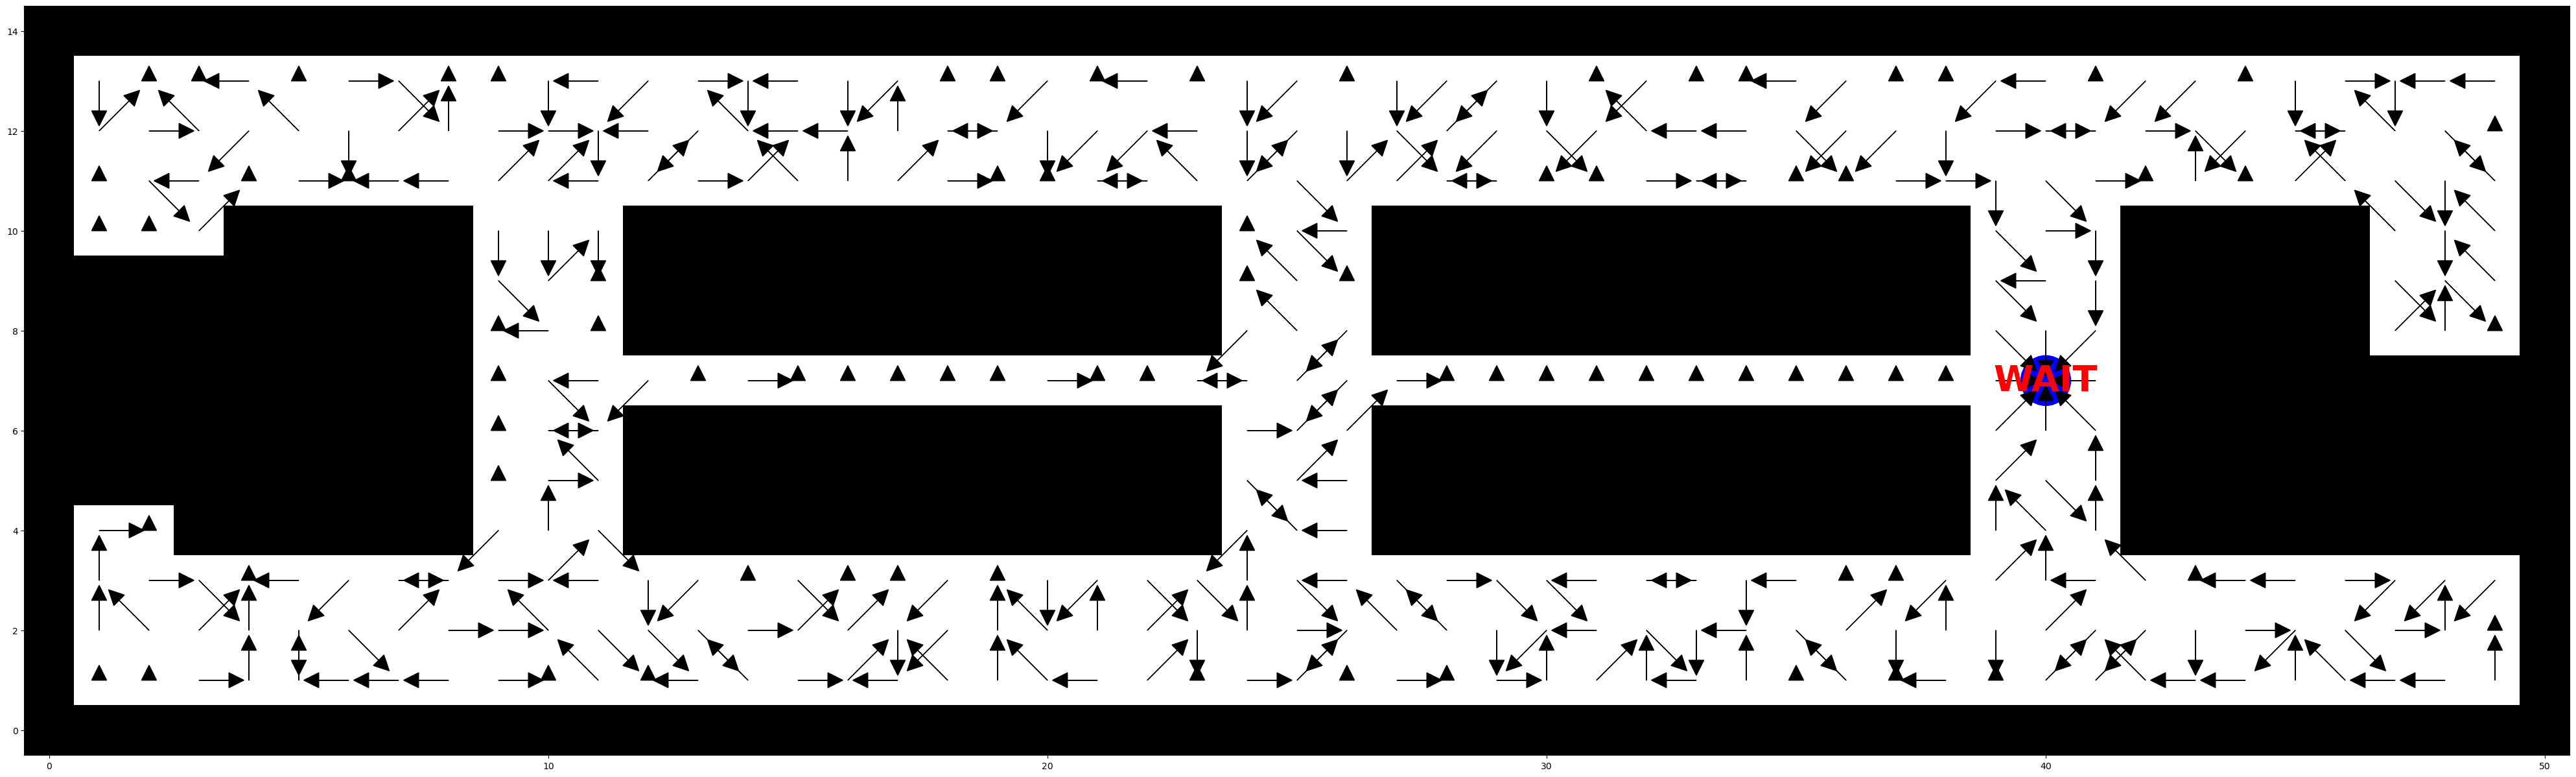

In [65]:
ql_discount_high = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.90, n_iter=30000)
ql_discount_high.run()
politica_ql_discount_high = parsea_politica_ql(ql_discount_high)
visualiza_politica(politica_ql_discount_high)

#### Q-Learning - $\gamma$ = 0.99 y 30,000 Iteraciones

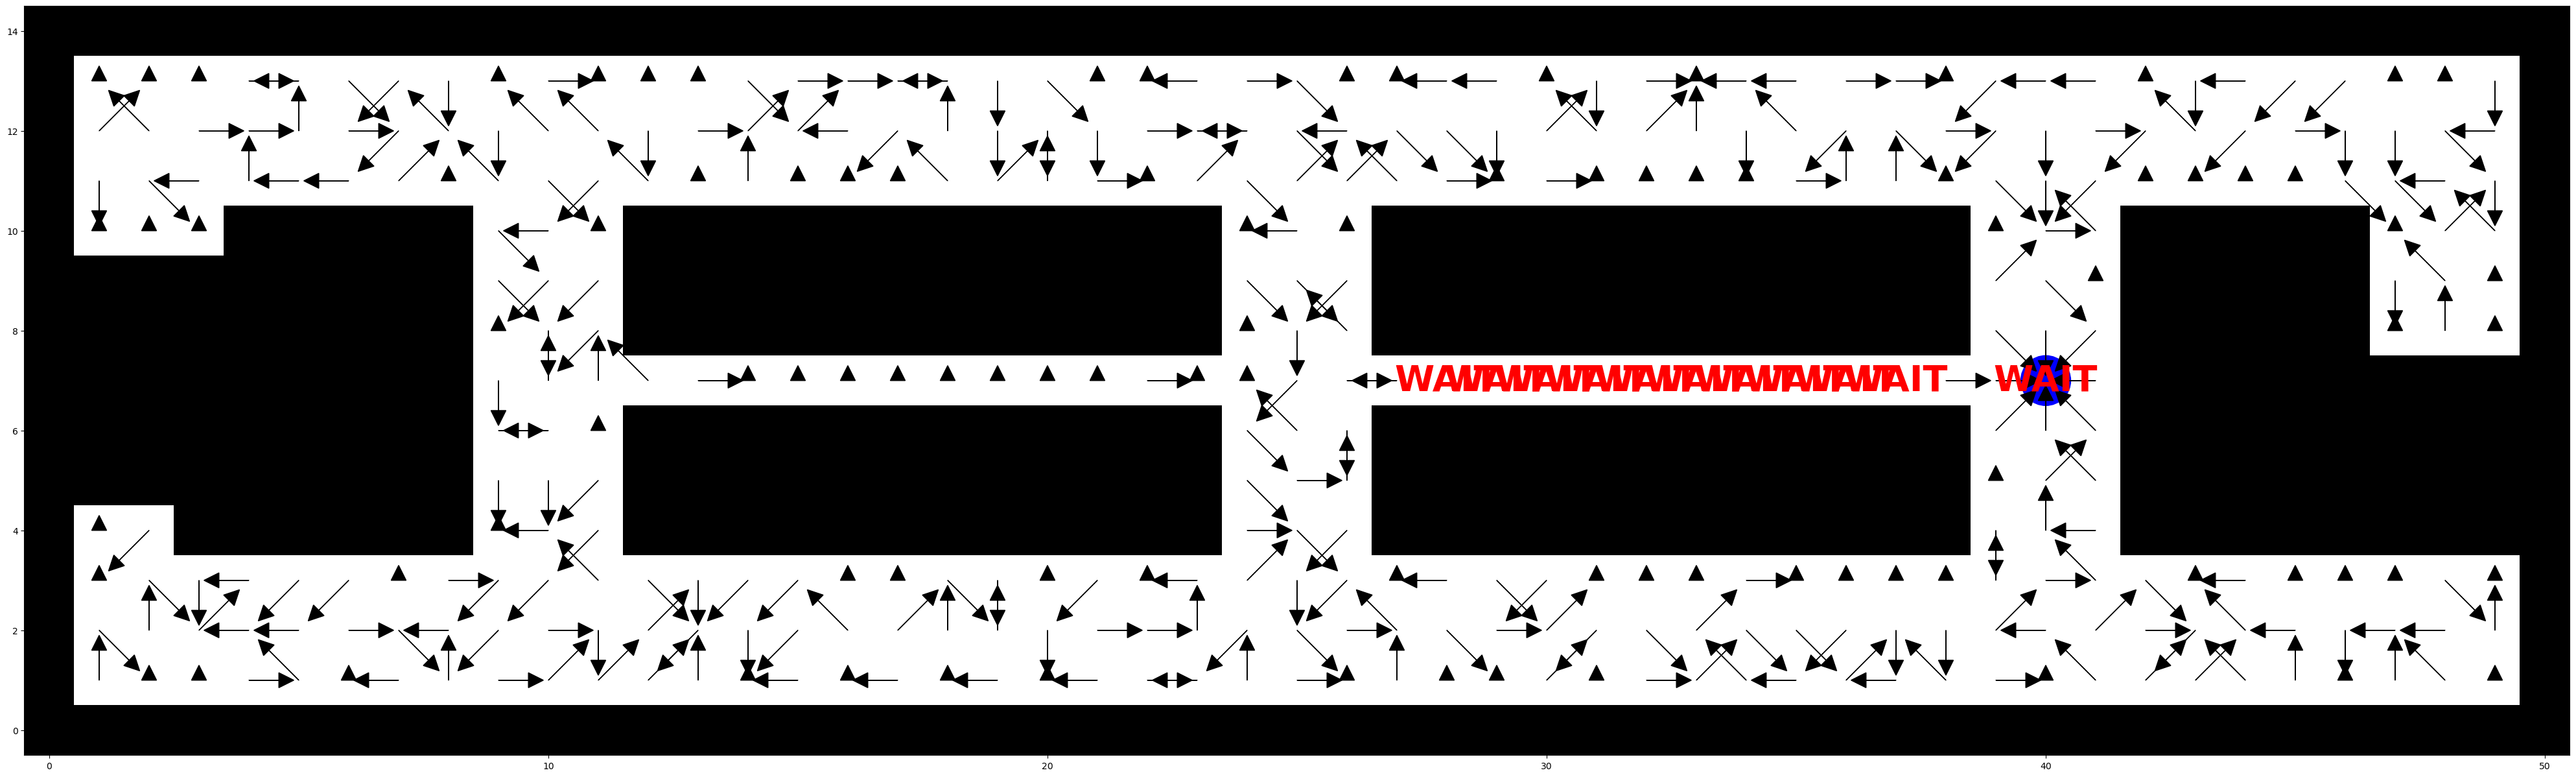

In [66]:
ql_discount_max = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.99, n_iter=30000)
ql_discount_max.run()
politica_ql_discount_max = parsea_politica_ql(ql_discount_max)
visualiza_politica(politica_ql_discount_max)

#### Q-Learning - $\gamma$ = 0.99 y 10,000 Iteraciones

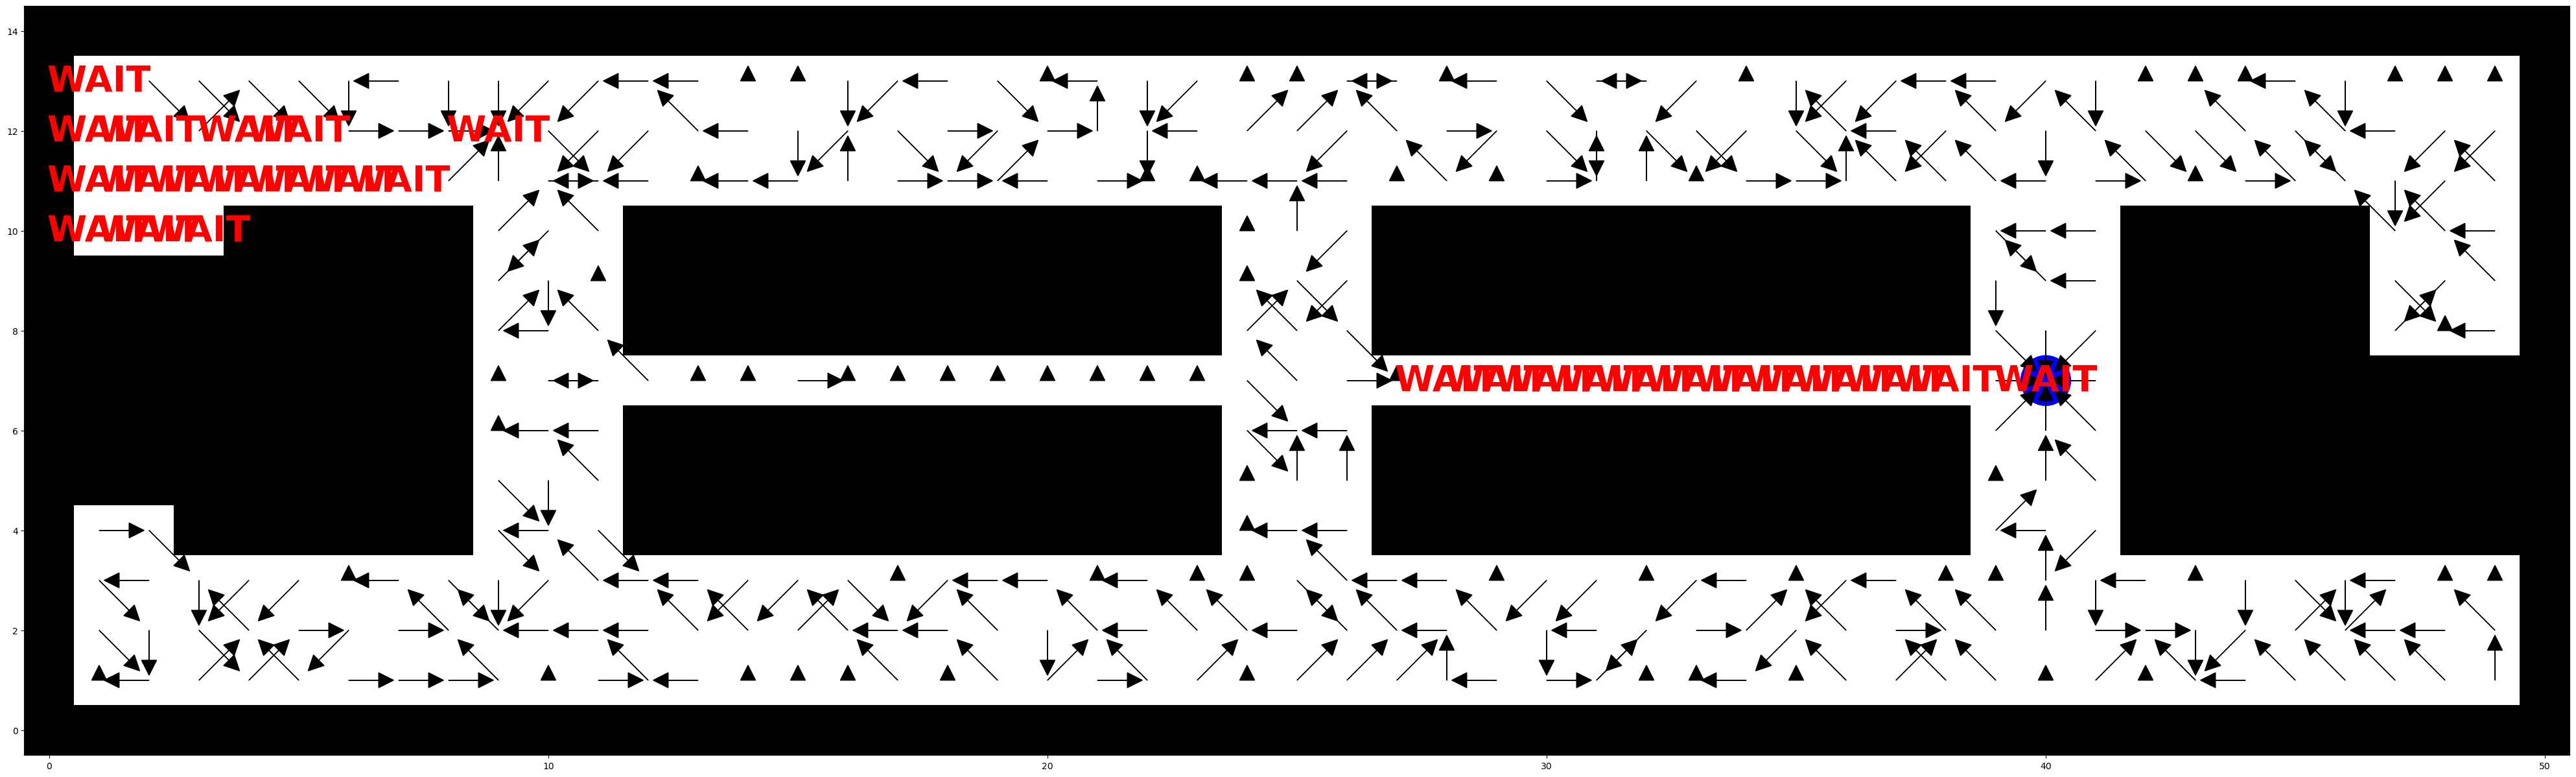

In [67]:
ql_iterations_low = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.99, n_iter=10000)
ql_iterations_low.run()
politica_ql_iterations_low = parsea_politica_ql(ql_iterations_low)
visualiza_politica(politica_ql_iterations_low)

#### Q-Learning - $\gamma$ = 0.99 y 50,000 Iteraciones

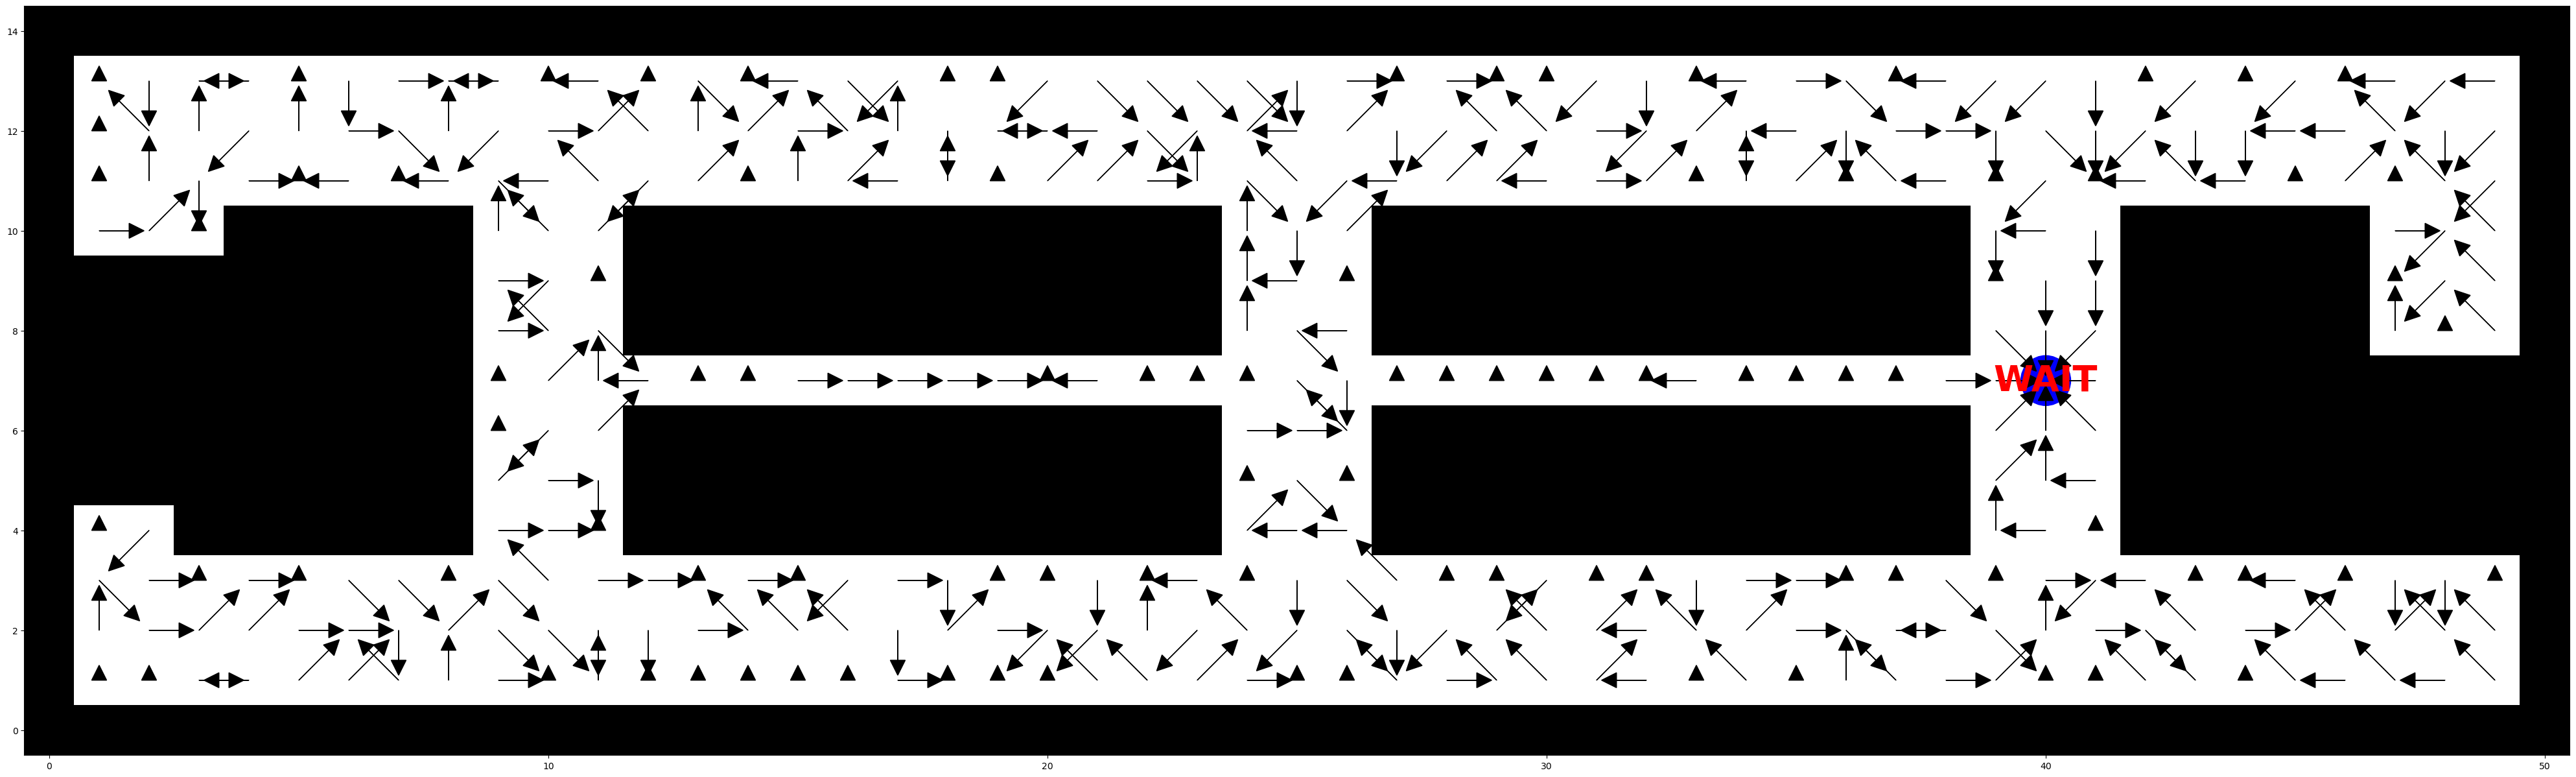

In [68]:
ql_iterations_high = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.99, n_iter=50000)
ql_iterations_high.run()
politica_ql_iterations_high = parsea_politica_ql(ql_iterations_high)
visualiza_politica(politica_ql_iterations_high)

#### Q-Learning - $\gamma$ = 0.99 y 100,000 Iteraciones

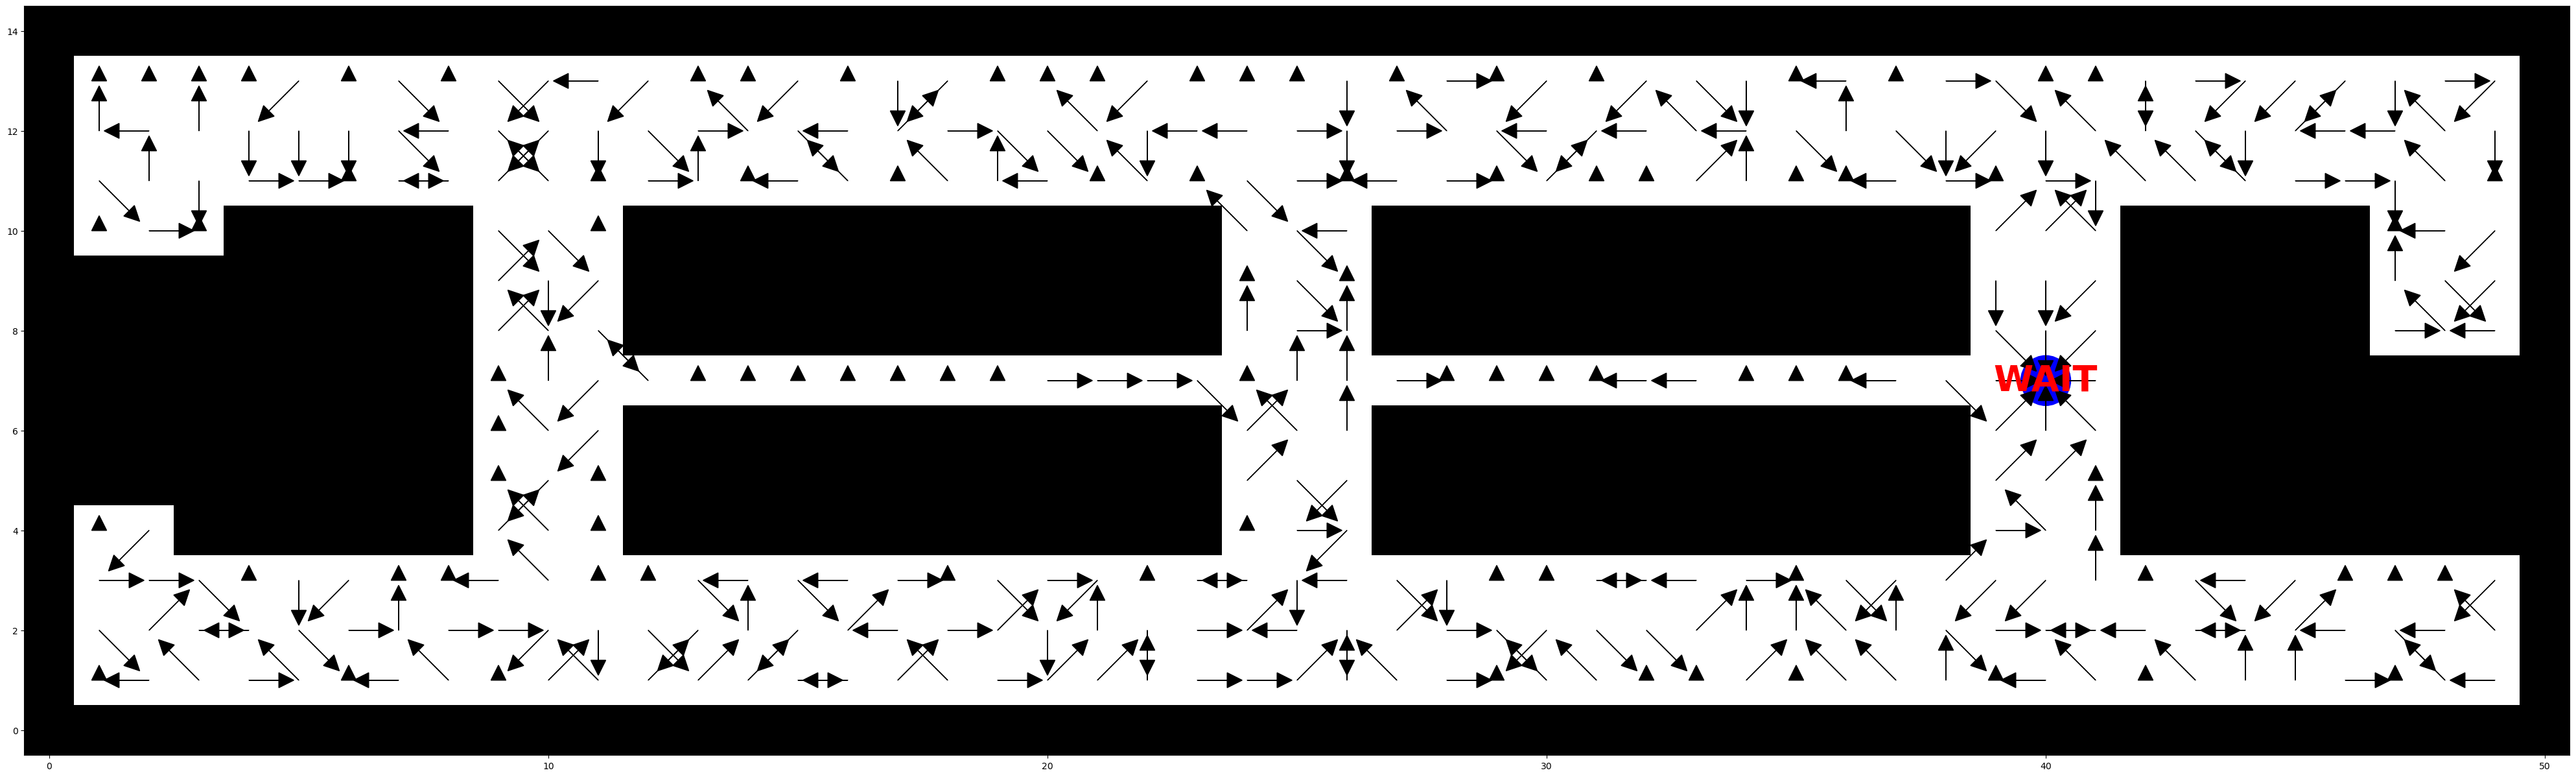

In [69]:
ql_optima = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.99, n_iter=100000)
ql_optima.run()
politica_ql_optima = parsea_politica_ql(ql_optima)
visualiza_politica(politica_ql_optima)

Tras realizar diversas ejecuciones del algoritmo Q-Learning, variando el número de iteraciones y el factor de descuento, hemos observado patrones significativos que guían nuestras conclusiones. Primero, es esencial contar con un número suficiente de iteraciones para permitir que el algoritmo explore adecuadamente el espacio de estados y acciones. Segundo, hemos constatado que a medida que el factor de descuento se aproxima a 1, la política resultante tiende a maximizar las recompensas a largo plazo. Esto implica que para alcanzar resultados más alineados con nuestros objetivos a largo plazo, deberíamos optar por un factor de descuento cercano a 1. Estas observaciones son cruciales para ajustar los parámetros del algoritmo con el fin de optimizar su rendimiento y efectividad en entornos de decisión complejos.

### **Apartado 2: Implementación mediante Montecarlo**

El método de Montecarlo es una técnica computacional que se utiliza para entender y aproximar soluciones de problemas complejos mediante la simulación de procesos aleatorios. Su principal ventaja es la capacidad de modelar sistemas complejos y obtener aproximaciones estadísticas a problemas que son difíciles de resolver analíticamente.

#### Componentes del Método de Montecarlo

- `Variables aleatorias (V):` Conjunto de variables que influyen en el sistema y cuya variabilidad es modelada usando distribuciones de probabilidad.

- `Simulaciones (S):` Conjunto de todas las ejecuciones del modelo, donde cada simulación representa una instancia del sistema bajo condiciones aleatorias específicas.

- `Resultados (R):` Los resultados obtenidos de cada simulación, que pueden incluir estimaciones de probabilidades, cálculos de promedios, o la evaluación de escenarios específicos.

- `Estimaciones (E):` Cálculos derivados de agrupar y analizar los resultados de múltiples simulaciones para obtener una estimación robusta y representativa del comportamiento del sistema.

Este enfoque permite utilizar la potencia del cálculo estocástico para explorar y analizar la dinámica y las consecuencias de diferentes escenarios, haciendo del método de Montecarlo una herramienta invaluable en campos como la física, la ingeniería, las finanzas y más.

### Política Epsilon-Greedy

#### `crea_politica_greedy()`
- **Descripción**: Esta función genera una política greedy evaluando la mejor acción posible para cada estado basado en las recompensas obtenidas.
- **Proceso**:
  - Itera sobre cada estado.
  - Para cada estado, evalúa todas las acciones posibles y calcula la recompensa de moverse a la posición resultante.
  - Selecciona la acción que proporciona la mayor recompensa y la añade a la política.

#### `greedy_policy(state, Q)`
- **Descripción**: Selecciona la acción con el valor Q más alto para el estado dado, representando la estrategia greedy basada en los valores Q aprendidos hasta el momento.
- **Parámetros**:
  - `state`: El estado actual del agente.
  - `Q`: Diccionario de valores Q que mapea pares estado-acción a sus respectivos valores.

### Función Monte Carlo

#### `monte_carlo(mapa, destino, num_episodes, gamma)`
- **Descripción**: Implementa el algoritmo de Monte Carlo para aprender la política óptima basada en múltiples simulaciones de episodios.
- **Parámetros**:
  - `mapa`: El mapa del entorno donde se realiza el aprendizaje.
  - `destino`: La ubicación objetivo en el mapa.
  - `num_episodes`: Número de episodios para correr el algoritmo.
  - `gamma`: Factor de descuento para las recompensas futuras.
- **Proceso**:
  - Inicializa los valores Q y los contadores N para todas las acciones en todos los estados.
  - Para cada episodio, simula una trayectoria desde un estado inicial hasta que se alcanza el destino o se toma la acción 'wait'.
  - Actualiza los valores Q basados en las recompensas acumuladas y el número de visitas a cada par estado-acción.

In [70]:
def crea_politica_greedy():
    p = []
    for e in nav_estados:
        valores = []
        for a in nav_acciones:
            e1 = aplica_accion(e,a)
            valores.append(obtiene_recompensa_simple(e1))
        accion = nav_acciones[np.argmax(valores)]
        p.append(accion)
    return p
politica_greedy = crea_politica_greedy()

def greedy_policy(state, Q):
    return max(Q[state], key=Q[state].get)

def monte_carlo(mapa, destino, num_episodes, gamma=0.95):
    Q = {estado: {accion: 0 for accion in nav_acciones} for estado in nav_estados}
    N = {estado: {accion: 0 for accion in nav_acciones} for estado in nav_estados}
    
    for _ in range(num_episodes):
        estado = inicializa_posicion(mapa, destino)
        episodio = []
        while len(episodio) < 1000:
            accion = greedy_policy(estado, Q)
            nuevo_estado = aplica_accion(estado, accion)
            recompensa = obtiene_recompensa(estado, accion)
            episodio.append((estado, accion, recompensa))
            if nuevo_estado == destino or accion == 'wait':
                break
            estado = nuevo_estado

        G = 0
        for estado, accion, recompensa in reversed(episodio):
            G = gamma * G + recompensa
            N[estado][accion] += 1
            Q[estado][accion] = ((N[estado][accion] - 1) * Q[estado][accion] + G) / N[estado][accion]

    politica_optima = [max(Q[estado], key=Q[estado].get) for estado in nav_estados]
    return politica_optima

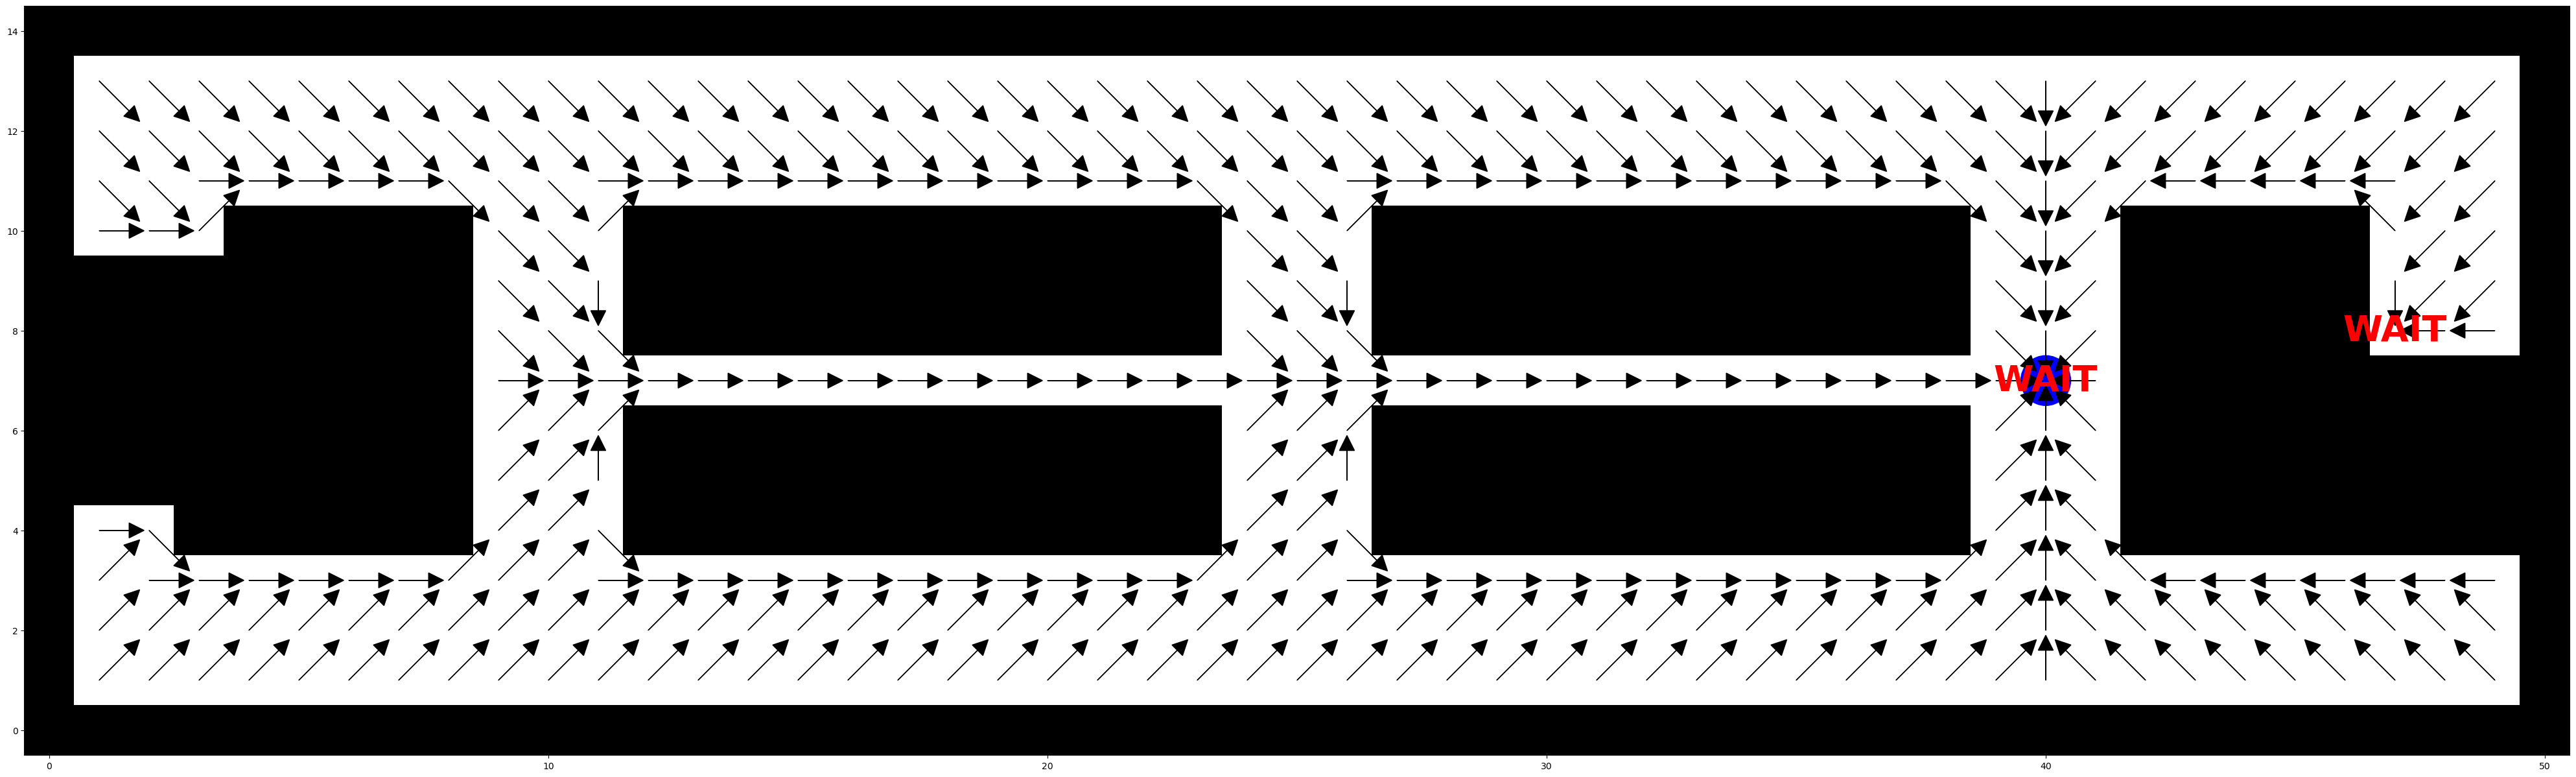

In [71]:
visualiza_politica(politica_greedy)

#### Impacto del Número de Episodios en la Convergencia

En el contexto de los métodos de Montecarlo aplicados al aprendizaje por refuerzo, un "episodio" se refiere a una secuencia completa de interacciones del agente con el entorno que comienza en un estado inicial y termina en un estado terminal o después de un número predefinido de pasos. Cada episodio es una realización completa del proceso que el agente está aprendiendo a navegar. En Montecarlo, la política del agente se evalúa y se mejora basándose en la experiencia acumulada al completar estos episodios. El número de episodios jugados tiene un impacto directo en la efectividad y la convergencia del aprendizaje del algoritmo. Aquí vemos cómo diferentes cantidades de episodios pueden afectar el proceso de aprendizaje:

- **100 episodios**:
   - **Bajo número de episodios**: Aquí, el agente tiene muy pocas interacciones con el entorno, lo que puede resultar en una comprensión y una aproximación muy limitadas de la política óptima. La política aprendida puede ser subóptima y no generalizar bien a diferentes estados del entorno.

- **1,000 episodios**:
   - **Moderadamente bajo**: Con más episodios, el agente comienza a tener una mejor idea de las recompensas y las transiciones del entorno. Sin embargo, aún puede no ser suficiente para alcanzar la convergencia en problemas más complejos o en entornos con una gran cantidad de estados o acciones.

- **5,000 episodios**:
   - **Moderado**: Este nivel de interacción permite una exploración más extensa y una mejor estimación de la función de valor. El algoritmo tiene más oportunidades de ajustar su política basada en un espectro más amplio de situaciones encontradas, llevando a una mejor convergencia en comparación con los dos casos anteriores.

- **100,000 episodios**:
   - **Alto número de episodios**: En este punto, el algoritmo ha tenido una cantidad significativa de interacciones, lo que le permite explorar profundamente el entorno y refinar considerablemente su política. Esto es particularmente útil en entornos complejos donde las relaciones entre acciones y estados no son inmediatamente obvias. La política resultante suele ser mucho más robusta y cerca de la óptima.

#### Impacto del Factor de Descuento $\gamma$ en la Convergencia

En el método de Montecarlo aplicado al aprendizaje por refuerzo, el factor de descuento $\gamma$ juega un papel crucial al determinar la importancia de las recompensas futuras. $\gamma$ puede variar entre 0 y 1, y su valor influye significativamente en la estrategia de aprendizaje del agente y en la convergencia hacia una política óptima. A continuación, exploramos cómo diferentes valores de $\gamma$ afectan el aprendizaje:

- **$\gamma$ = 0.1**:
   - **Enfoque a corto plazo**: Con un $\gamma$ bajo, el agente prioriza las recompensas inmediatas sobre las futuras. Esto puede conducir a políticas que son óptimas para obtener ganancias rápidas, pero subóptimas en términos de beneficios a largo plazo.

- **$\gamma$ = 0.5**:
   - **Balance moderado**: Un valor intermedio de $\gamma$ permite al agente equilibrar entre las recompensas inmediatas y las futuras. Esto puede resultar en una política más equilibrada que puede ser efectiva en entornos con dinámicas cambiantes o donde las acciones tienen consecuencias tanto a corto como a medio plazo.

- **$\gamma$ = 0.8**:
   - **Preferencia por recompensas futuras**: Con un $\gamma$ alto, el agente valora más las recompensas que se obtendrán en el futuro. Esto favorece estrategias que buscan maximizar el retorno a largo plazo, lo que puede ser ventajoso en entornos donde las decisiones tempranas tienen fuertes impactos en los resultados futuros.

- **$\gamma$ = 0.99**:
   - **Visión a largo plazo extremadamente alta**: Un $\gamma$ cercano a 1 maximiza la importancia de las recompensas futuras, casi ignorando las ganancias inmediatas. Esto puede llevar al agente a adoptar estrategias que solo serán rentables después de muchas acciones, lo cual es útil en entornos altamente complejos o cuando la planificación a largo plazo es crítica para el éxito.

Cada valor de $\gamma$ configura de manera diferente la aproximación del agente al problema y afecta directamente cómo y cuándo converge a una política óptima. Elegir el valor adecuado de $\gamma$ es esencial para alinear el comportamiento del agente con los objetivos específicos del entorno en que opera.


#### Montecarlo - 1000 Episodios y $\gamma$ = 0.95

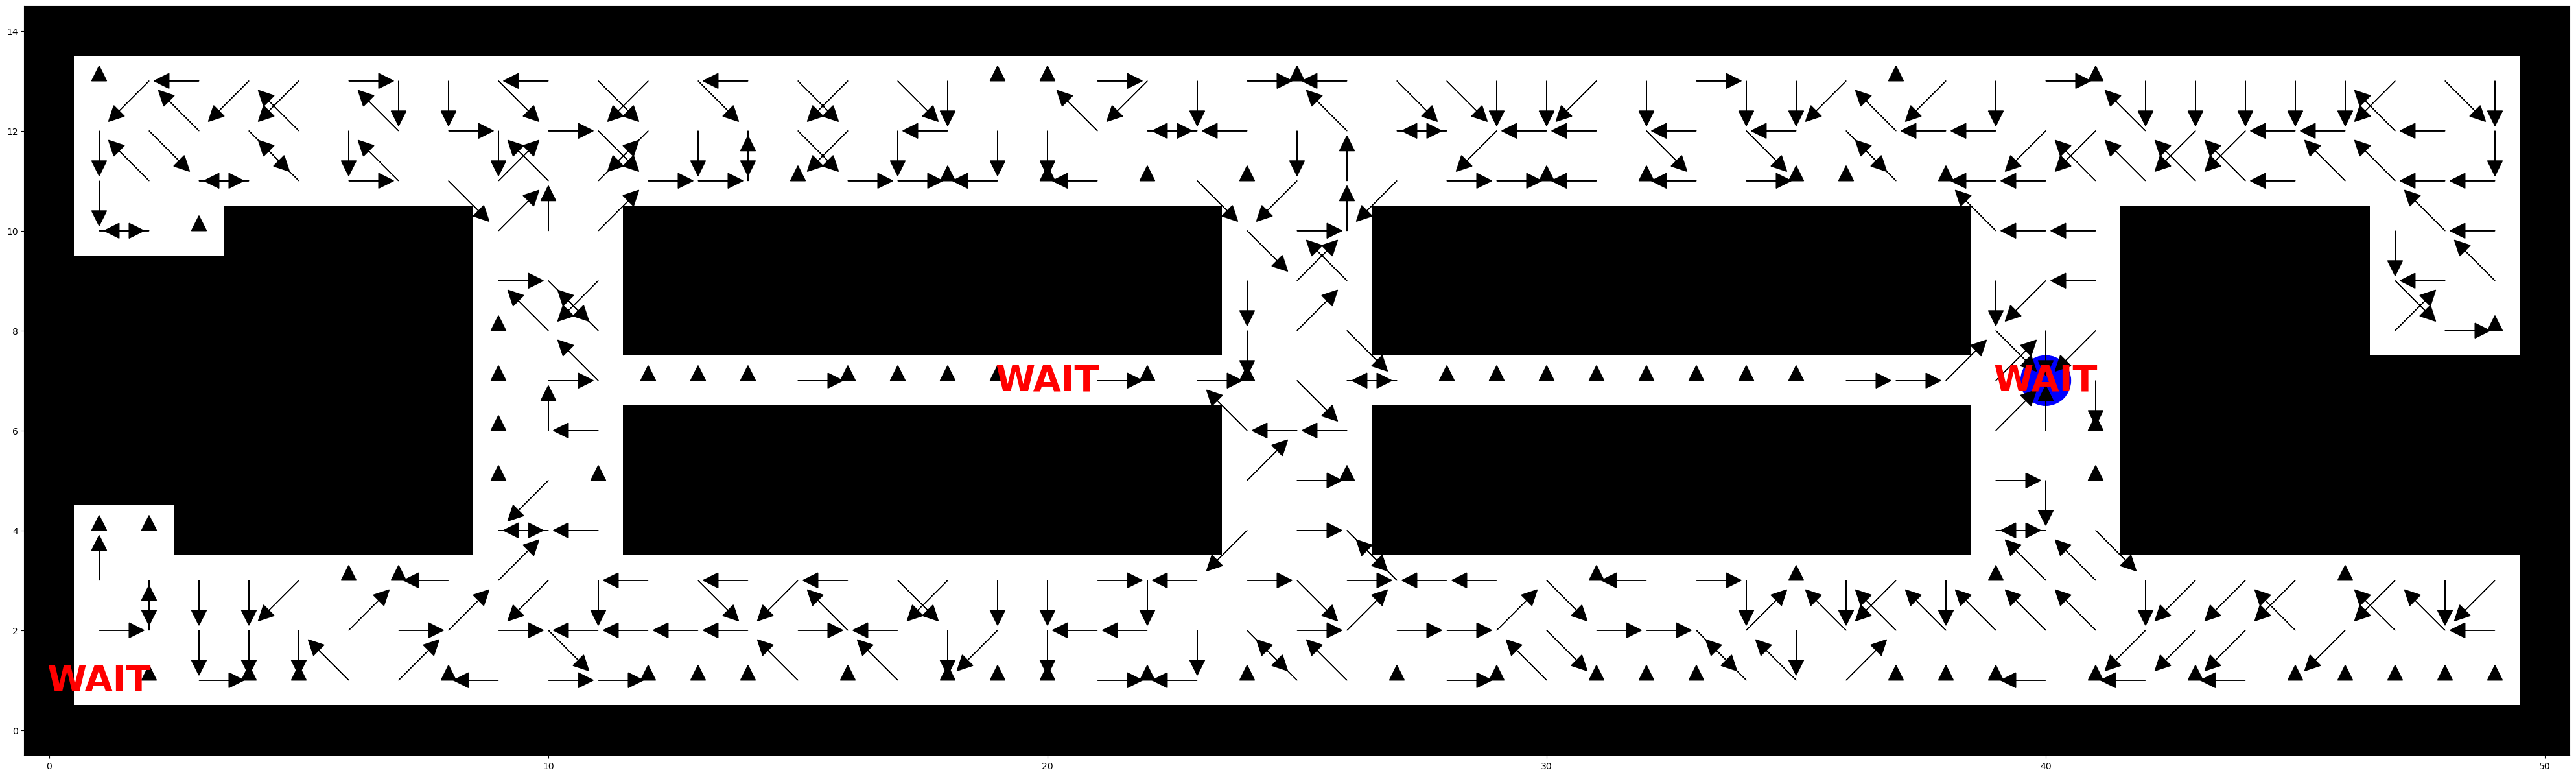

In [72]:
politica_mc_episodes_low = monte_carlo(mapa, destino, 1000)
visualiza_politica(politica_mc_episodes_low)

#### Montecarlo - 5000 Episodios y $\gamma$ = 0.95

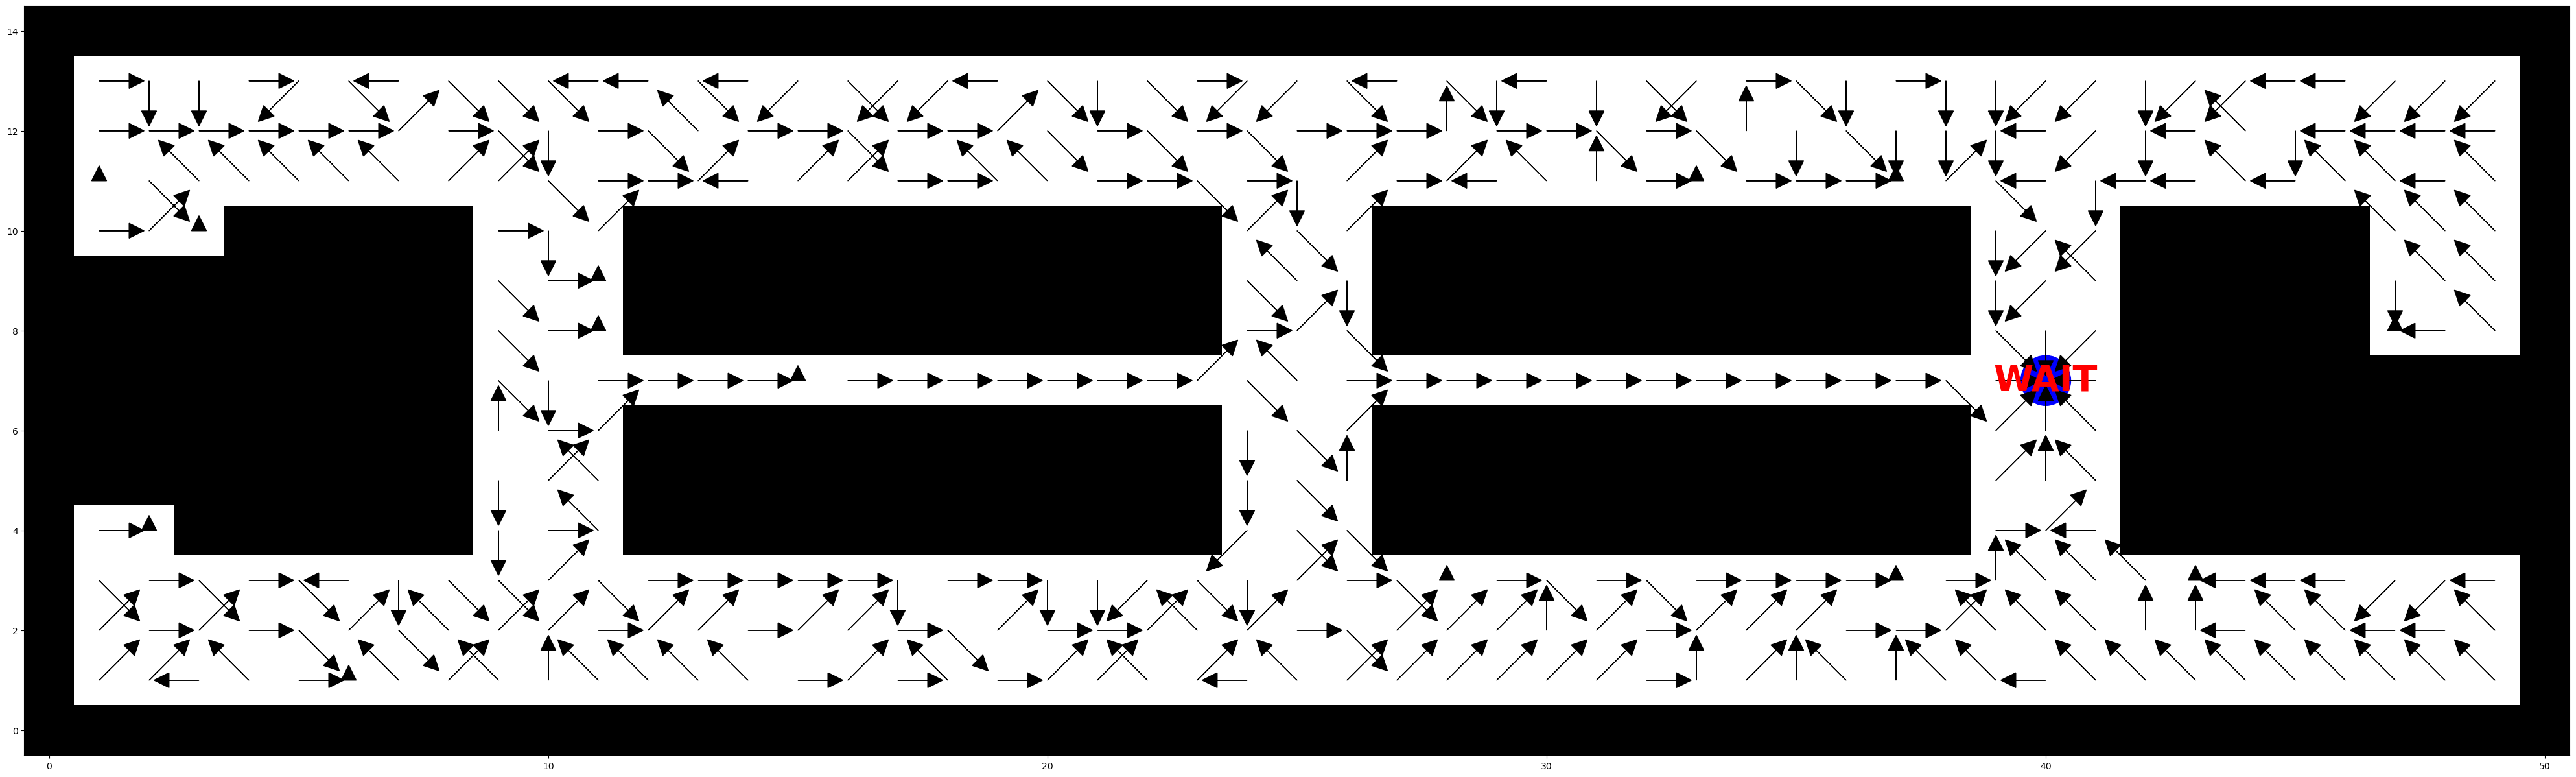

In [73]:
politica_mc_episodes_mid = monte_carlo(mapa, destino, 5000)
visualiza_politica(politica_mc_episodes_mid)

#### Montecarlo - 10000 Episodios y $\gamma$ = 0.95

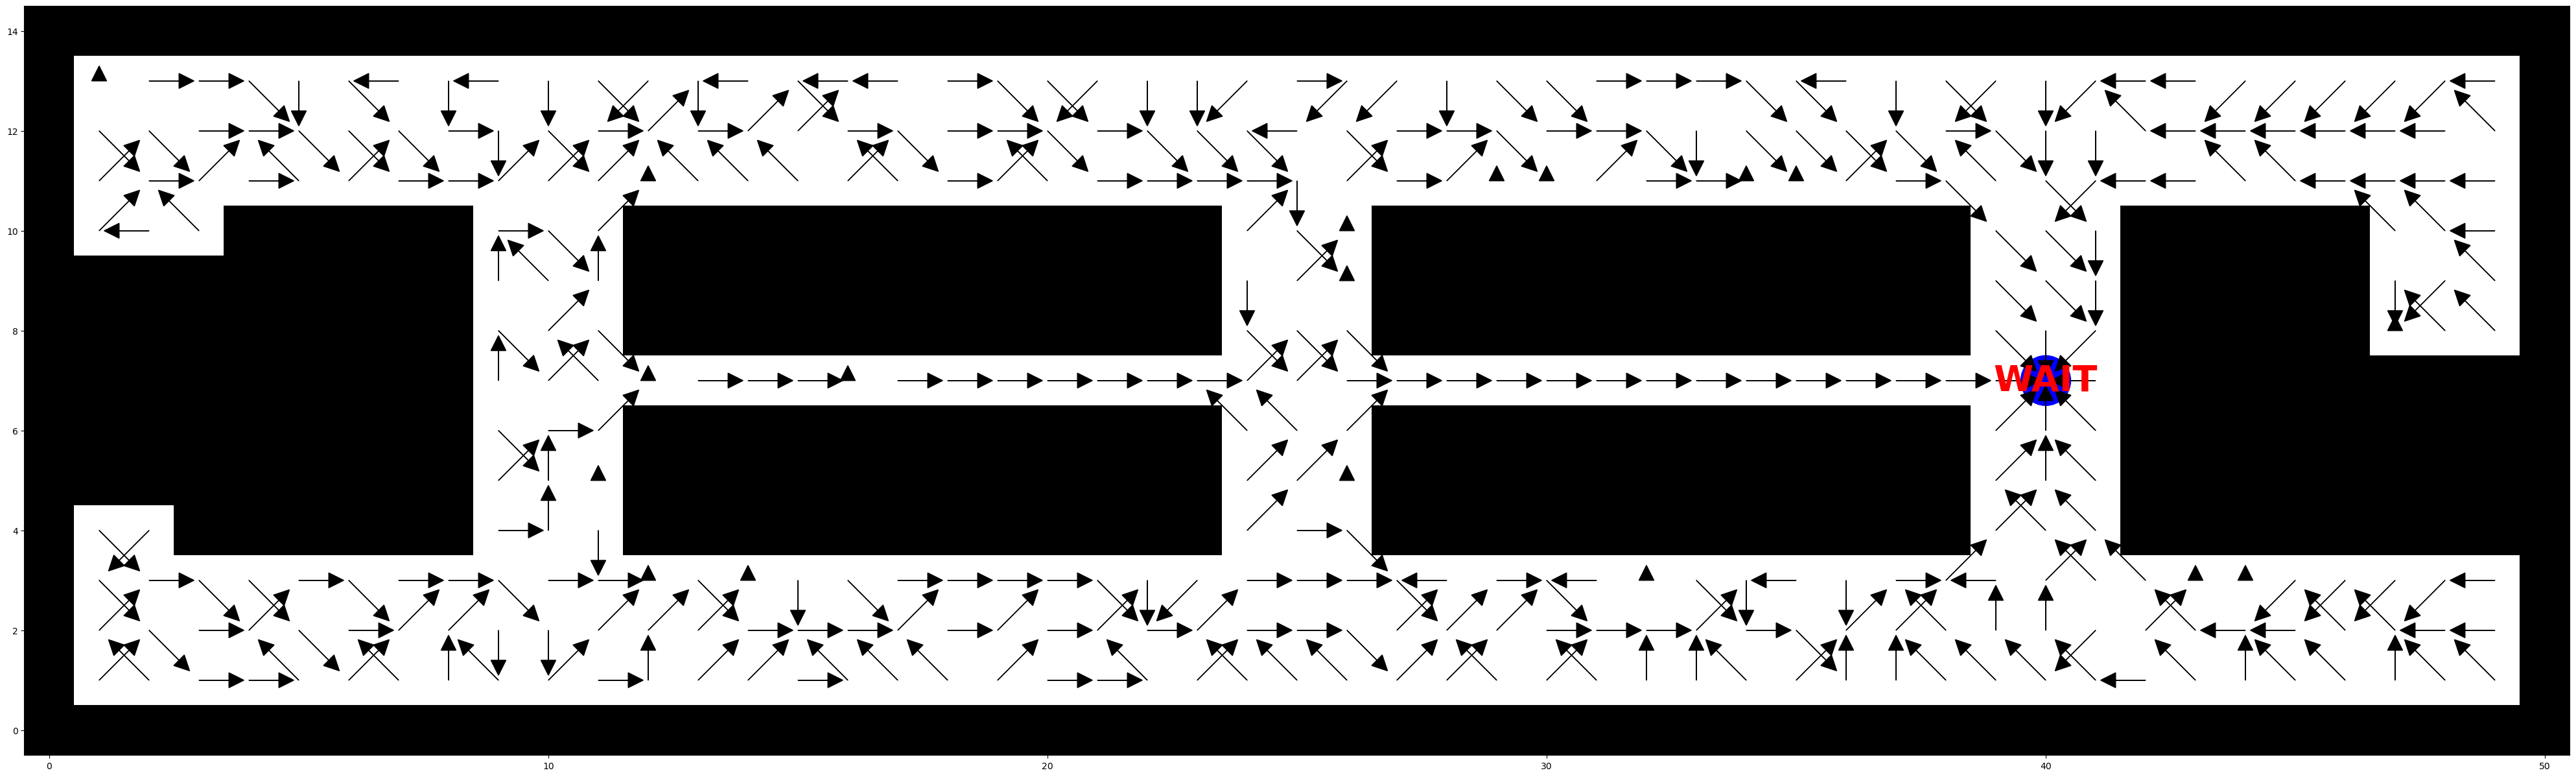

In [74]:
politica_mc_episodes_high = monte_carlo(mapa, destino, 10000)
visualiza_politica(politica_mc_episodes_high)

#### Montecarlo - 5000 Episodios y $\gamma$ = 0.50

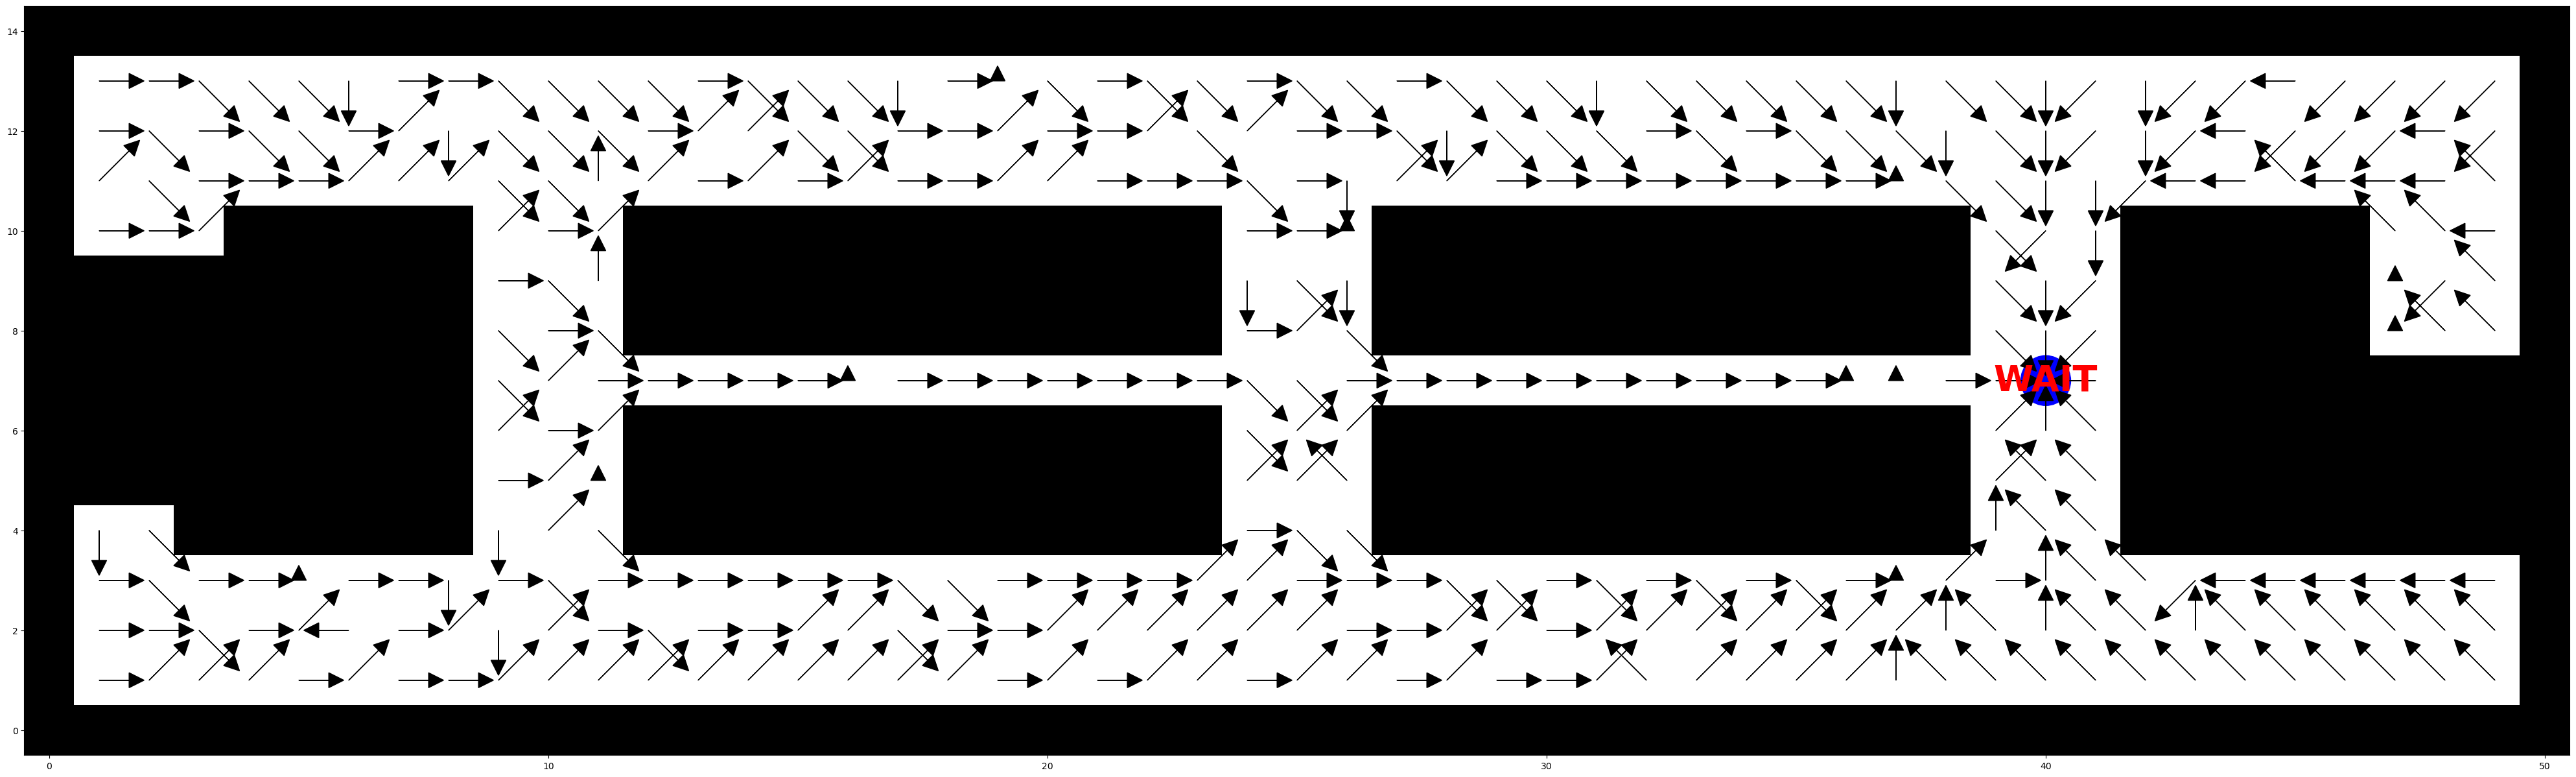

In [75]:
politica_mc_gamma_low = monte_carlo(mapa, destino, 5000, gamma=0.5)
visualiza_politica(politica_mc_gamma_low)

#### Montecarlo - 5000 Episodios y $\gamma$ = 0.75

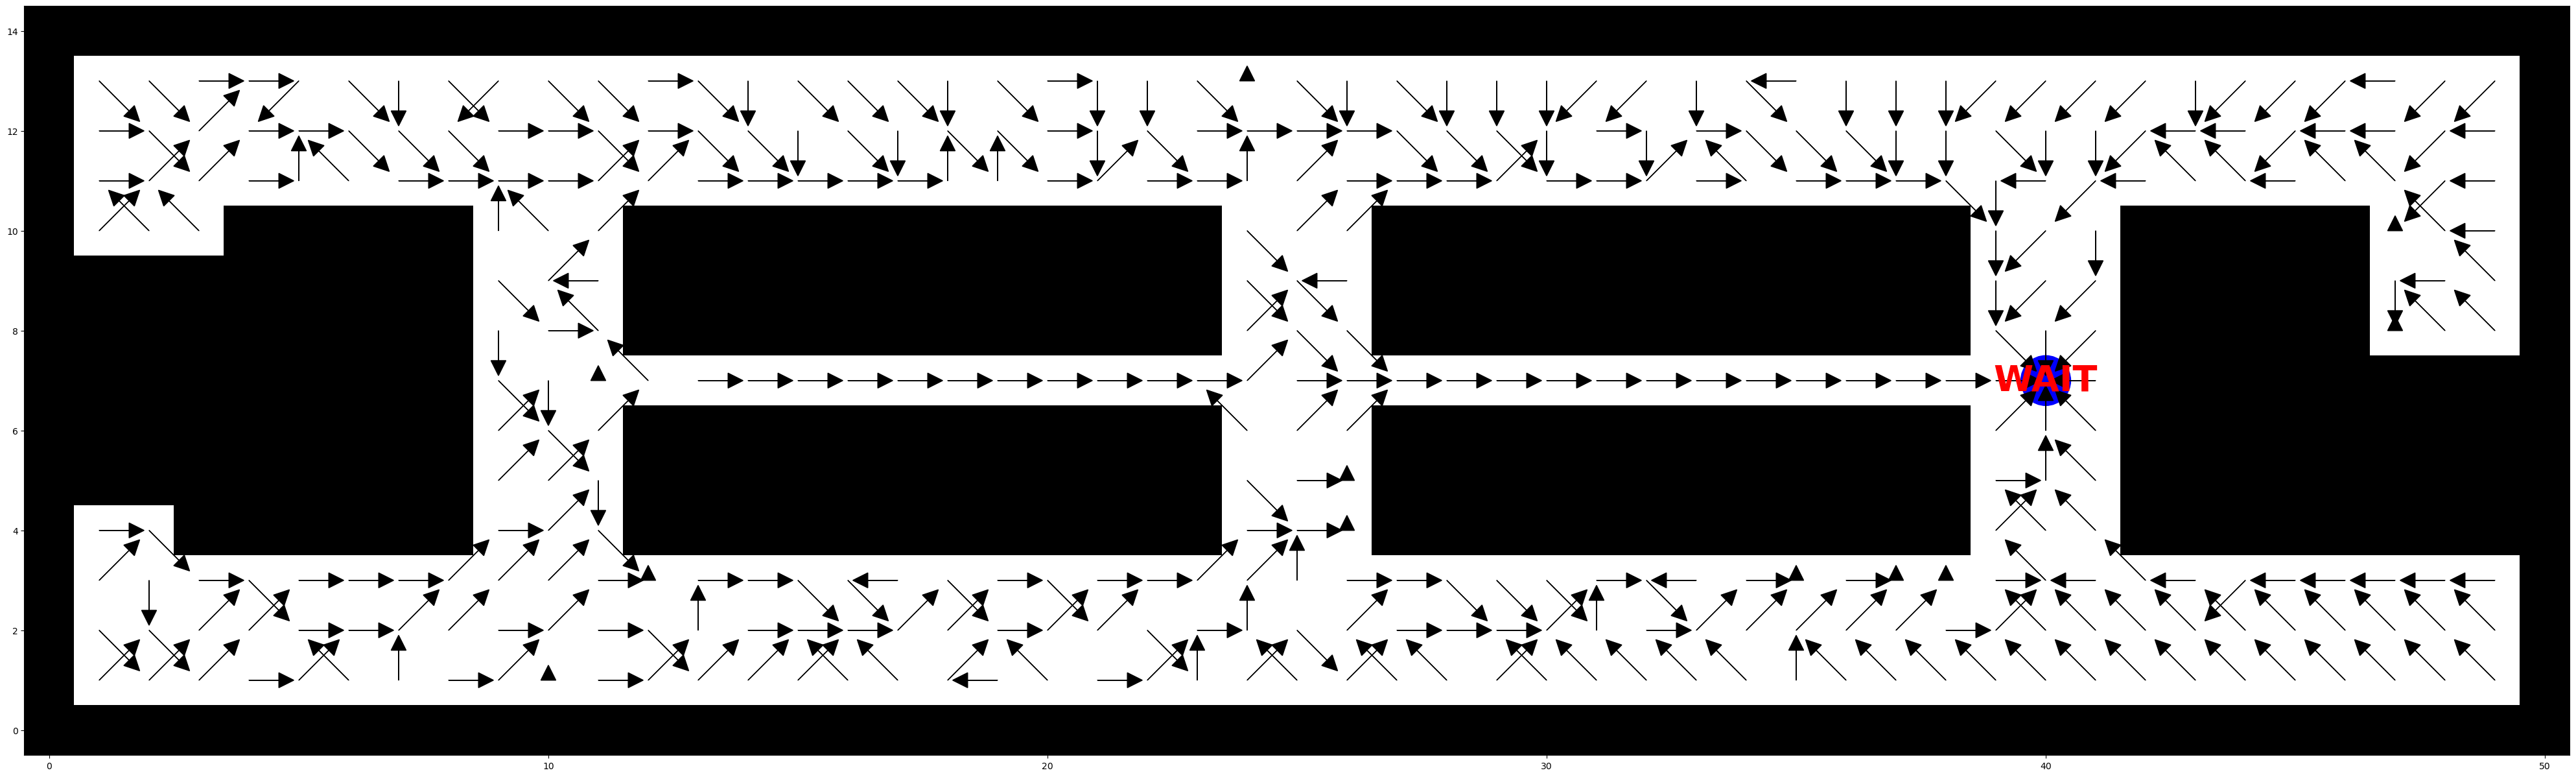

In [76]:
politica_mc_gamma_mid = monte_carlo(mapa, destino, 5000, gamma=0.75)
visualiza_politica(politica_mc_gamma_mid)

#### Montecarlo - 5000 Episodios y $\gamma$ = 0.99

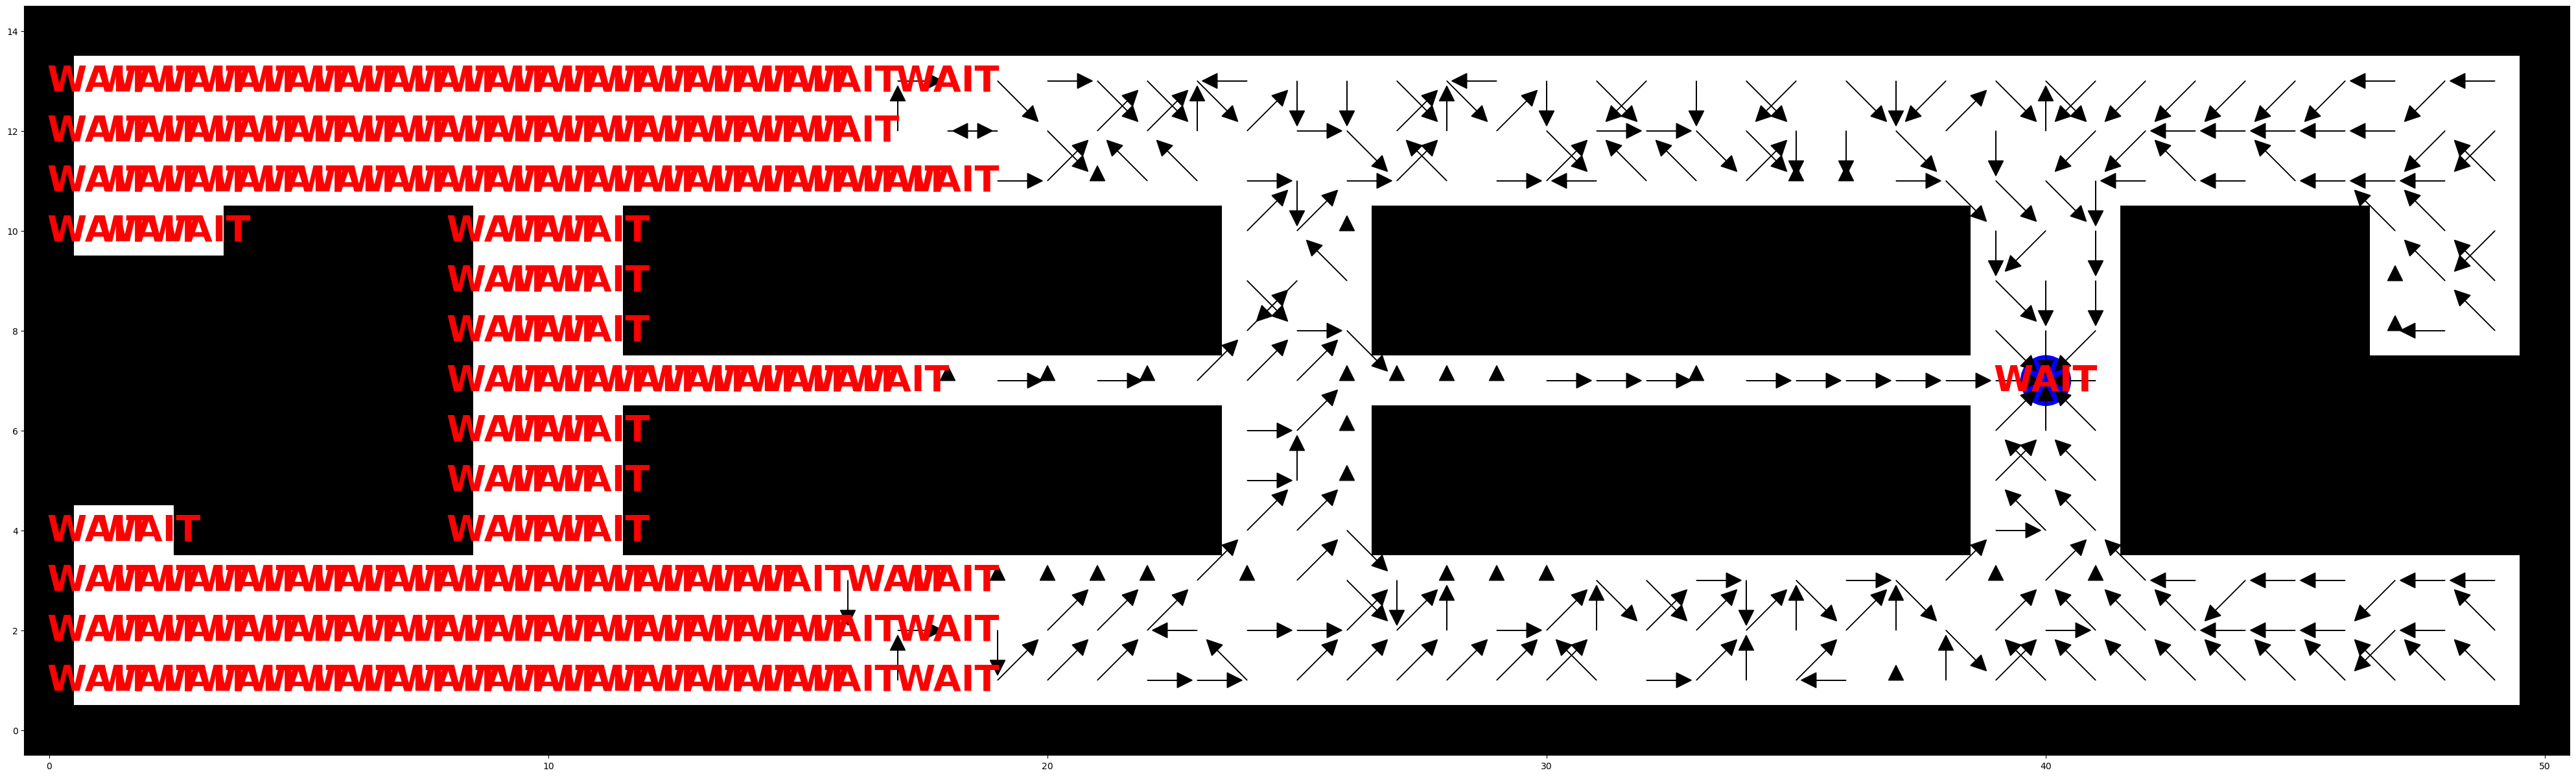

In [77]:
politica_mc_gamma_high = monte_carlo(mapa, destino, 5000, gamma=0.99)
visualiza_politica(politica_mc_gamma_high)

#### Montecarlo - 5000 Episodios y $\gamma$ = 0.95

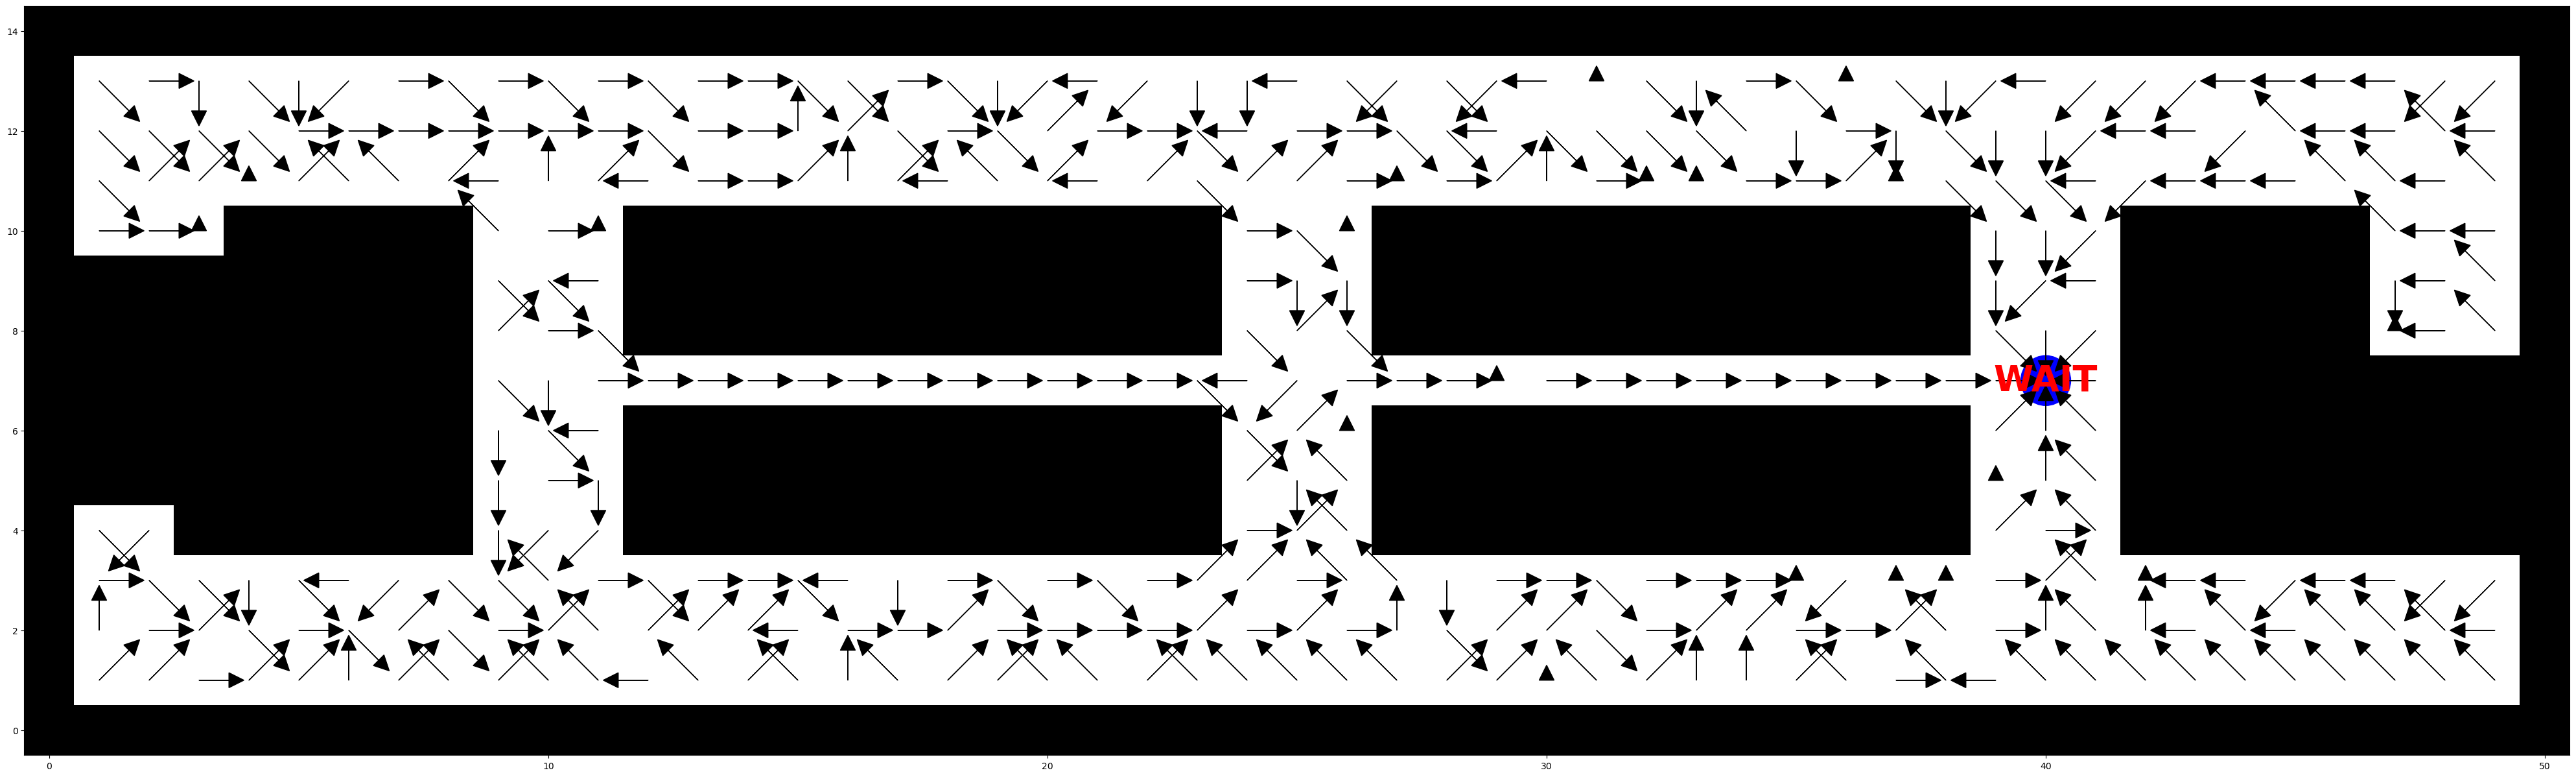

In [78]:
politica_mc_optima = monte_carlo(mapa, destino, 5000, gamma=0.95)
visualiza_politica(politica_mc_optima)

Al variar tanto el número de episodios como el factor de descuento gamma en el método de Montecarlo, se observa que incrementar el número de episodios mejora la exploración y precisión en la estimación de la política óptima, mientras que ajustar gamma determina el peso de las recompensas futuras vs inmediatas, influyendo directamente en la estrategia de aprendizaje del agente. Un equilibrio entre estos dos parámetros es crucial para optimizar la efectividad del algoritmo y alcanzar una convergencia adecuada hacia comportamientos deseables en entornos dinámicos y complejos.

### **Apartado 3: Implementación mediante SARSA (State-Action-Reward-State-Action)**

SARSA es un algoritmo de control para procesos de decisión de Markov que se usa en el aprendizaje por refuerzo. SARSA es un acrónimo que significa Estado-Acción-Recompensa-Siguiente Estado-Siguiente Acción, y se refiere a la actualización que se realiza en la función de valor Q para un par estado-acción dado. El algoritmo actualiza los valores de Q en base a la ecuación de actualización Q-learning, ajustada para tener en cuenta la política actual que se está siguiendo, generalmente una política ε-greedy.

#### Código y Parámetros de Entrada

##### Función `epsilon_greedy_policy`

- **Entradas**:
  - `state`: El estado actual en el que se encuentra el agente.
  - `Q`: Un diccionario que mapea pares de estados y acciones a sus valores Q.
  - `epsilon`: La probabilidad de elegir una acción al azar; esto ayuda a la exploración.

- **Funcionalidad**: Esta función selecciona una acción utilizando la política ε-greedy. Con probabilidad ε, elige una acción al azar para promover la exploración. Con probabilidad 1-ε, elige la acción que maximiza el valor Q para el estado actual, promoviendo la explotación.

##### Función `sarsa`

- **Entradas**:
  - `mapa`: El ambiente o contexto en el que se mueve el agente.
  - `destino`: El estado objetivo que el agente intenta alcanzar.
  - `num_episodes`: Número de episodios de entrenamiento.
  - `max_steps`: Número máximo de pasos por episodio.
  - `alpha`: Tasa de aprendizaje.
  - `gamma`: Factor de descuento, que equilibra la importancia de las recompensas inmediatas vs. futuras.
  - `epsilon`: Probabilidad de selección de acción aleatoria.

- **Funcionalidad**: Implementa el algoritmo SARSA para actualizar los valores Q basados en la secuencia de estados, acciones y recompensas experimentadas. El agente actualiza Q según las recompensas obtenidas y las estimaciones de Q para el siguiente estado y acción, bajo una política ε-greedy.

- **Implicaciones de los Parámetros**:
  - **`num_episodes`**: Aumentar el número de episodios permite al algoritmo explorar más el espacio de estado y acción, mejorando potencialmente la política aprendida. Reducirlo puede acelerar el entrenamiento pero a riesgo de obtener una política subóptima.
  - **`max_steps`**: Un número mayor permite episodios más largos, dando más oportunidades para aprender de una variedad de situaciones. Un número menor puede limitar el aprendizaje a experiencias cortas.
  - **`alpha`** (tasa de aprendizaje): Un valor alto puede hacer que el aprendizaje sea más rápido pero posiblemente inestable o convergente a políticas subóptimas. Un valor bajo asegura un aprendizaje más estable pero más lento.
  - **`gamma`** (factor de descuento): Un valor alto prioriza las recompensas futuras, ideal para tareas donde el "largo plazo" es importante. Un valor bajo hace que el agente valore más las recompensas inmediatas, útil en entornos donde el futuro es muy incierto o el agente necesita resultados rápidos.
  - **`epsilon`** (probabilidad de exploración): Un valor alto incrementa la exploración, útil en las fases iniciales del aprendizaje o en entornos muy dinámicos. Un valor bajo aumenta la explotación de la información aprendida, lo que puede mejorar la eficiencia en entornos estables.

In [79]:
def epsilon_greedy_policy(state, Q, epsilon):
    """ Selección de acciones usando la política epsilon-greedy. """
    if np.random.uniform() < epsilon:
        return np.random.choice(nav_acciones)
    else:
        return max(Q[state], key=Q[state].get)

def sarsa(mapa, destino, num_episodes, max_steps=200, alpha=0.05, gamma=0.95, epsilon=0.05):
    Q = {estado: {accion: 0 for accion in nav_acciones} for estado in nav_estados}
    for episode in range(num_episodes):
        estado = inicializa_posicion(mapa, destino)
        accion = epsilon_greedy_policy(estado, Q, epsilon)
        
        for _ in range(max_steps):
            nuevo_estado = aplica_accion(estado, accion)
            recompensa = obtiene_recompensa(estado, accion)
            nueva_accion = epsilon_greedy_policy(nuevo_estado, Q, epsilon)
            
            # Actualización SARSA
            Q[estado][accion] += alpha * (recompensa + gamma * Q[nuevo_estado][nueva_accion] - Q[estado][accion])
            
            estado, accion = nuevo_estado, nueva_accion
            
            if nuevo_estado == destino or accion == 'wait':
                break
    
    politica_optima = [max(Q[estado], key=Q[estado].get) for estado in nav_estados]

    return politica_optima



#### Plan de Experimentación con SARSA

El objetivo de este plan es verificar cómo diferentes configuraciones de parámetros afectan el comportamiento y el aprendizaje del algoritmo SARSA en un entorno de prueba. Los resultados ayudarán a comprender mejor cómo ajustar estos parámetros en aplicaciones prácticas.

#### Configuraciones de los Experimentos

Cada configuración de experimento variará uno o más parámetros mientras mantiene los otros constantes para aislar los efectos de cada uno. Los parámetros a variar son: episodios, pasos, $\alpha$, $\gamma$, y $\epsilon$.

##### Variación de episodios
- **Objetivo**: Evaluar el impacto del número de episodios en la calidad del aprendizaje.
- **Configuraciones**:
  - Bajo: 1000 episodios
  - Medio: 5000 episodios
  - Alto: 10000 episodios

##### Variación de pasos
- **Objetivo**: Determinar cómo el número máximo de pasos por episodio afecta la capacidad del agente para aprender de experiencias más prolongadas.
- **Configuraciones**:
  - Corto: 50 pasos
  - Medio: 100 pasos
  - Largo: 200 pasos

##### Variación de $\alpha$ (tasa de aprendizaje)
- **Objetivo**: Investigar cómo diferentes tasas de aprendizaje influyen en la convergencia del algoritmo.
- **Configuraciones**:
  - Baja: 0.05
  - Media: 0.1
  - Alta: 0.2

##### Variación de $\gamma$ (factor de descuento)
- **Objetivo**: Comprender cómo el factor de descuento afecta la valoración de recompensas futuras.
- **Configuraciones**:
  - Bajo: 0.5
  - Medio: 0.8
  - Alto: 0.95

##### Variación de $\epsilon$ (probabilidad de exploración)
- **Objetivo**: Examinar el efecto de diferentes niveles de exploración en la eficiencia y efectividad del aprendizaje.
- **Configuraciones**:
  - Bajo: 0.05
  - Medio: 0.1
  - Alto: 0.2

#### Metodología de Experimentación

Para cada configuración, se realizarán pruebas en un entorno controlado donde el mapa y el destino son consistentes a través de todos los experimentos. Se medirá la efectividad del aprendizaje por la calidad de la política aprendida.


#### SARSA - 1000 Episodios

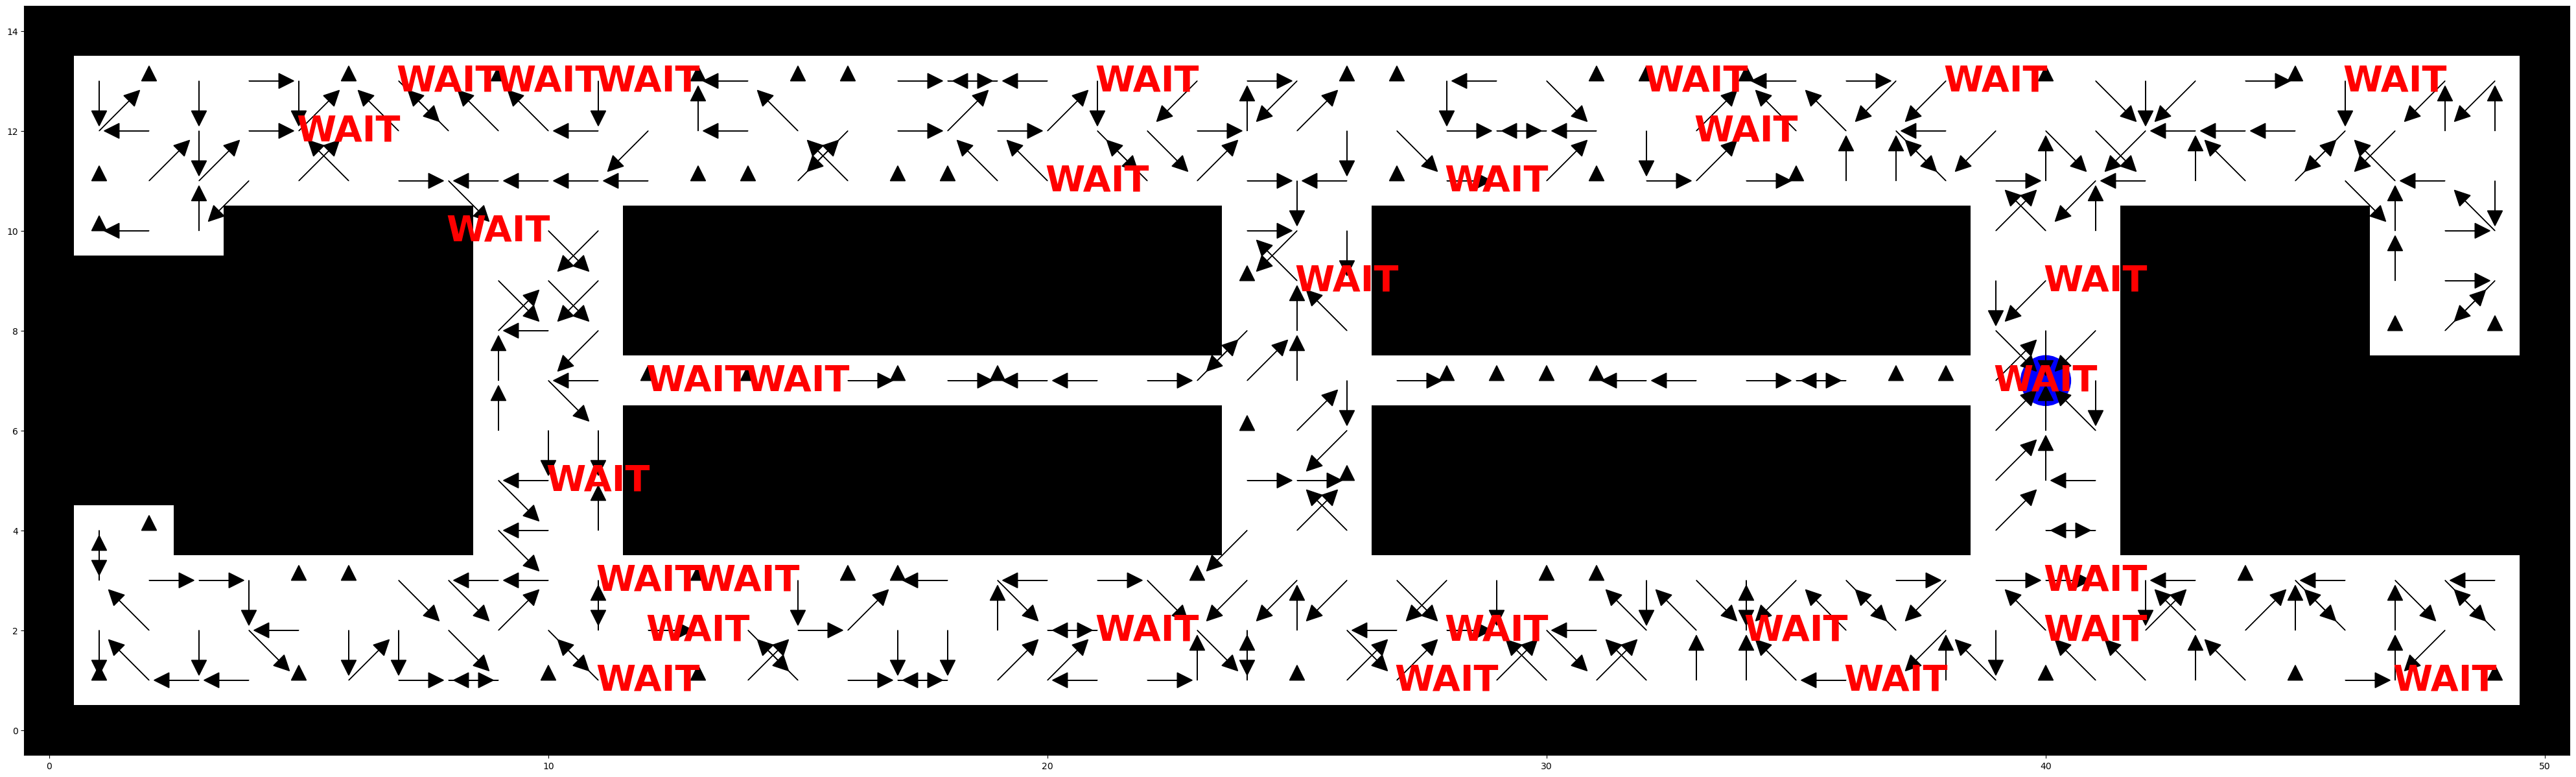

In [80]:
politica_sarsa_episodes_low = sarsa(mapa, destino, 1000, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_episodes_low)

#### SARSA - 50000 Episodios

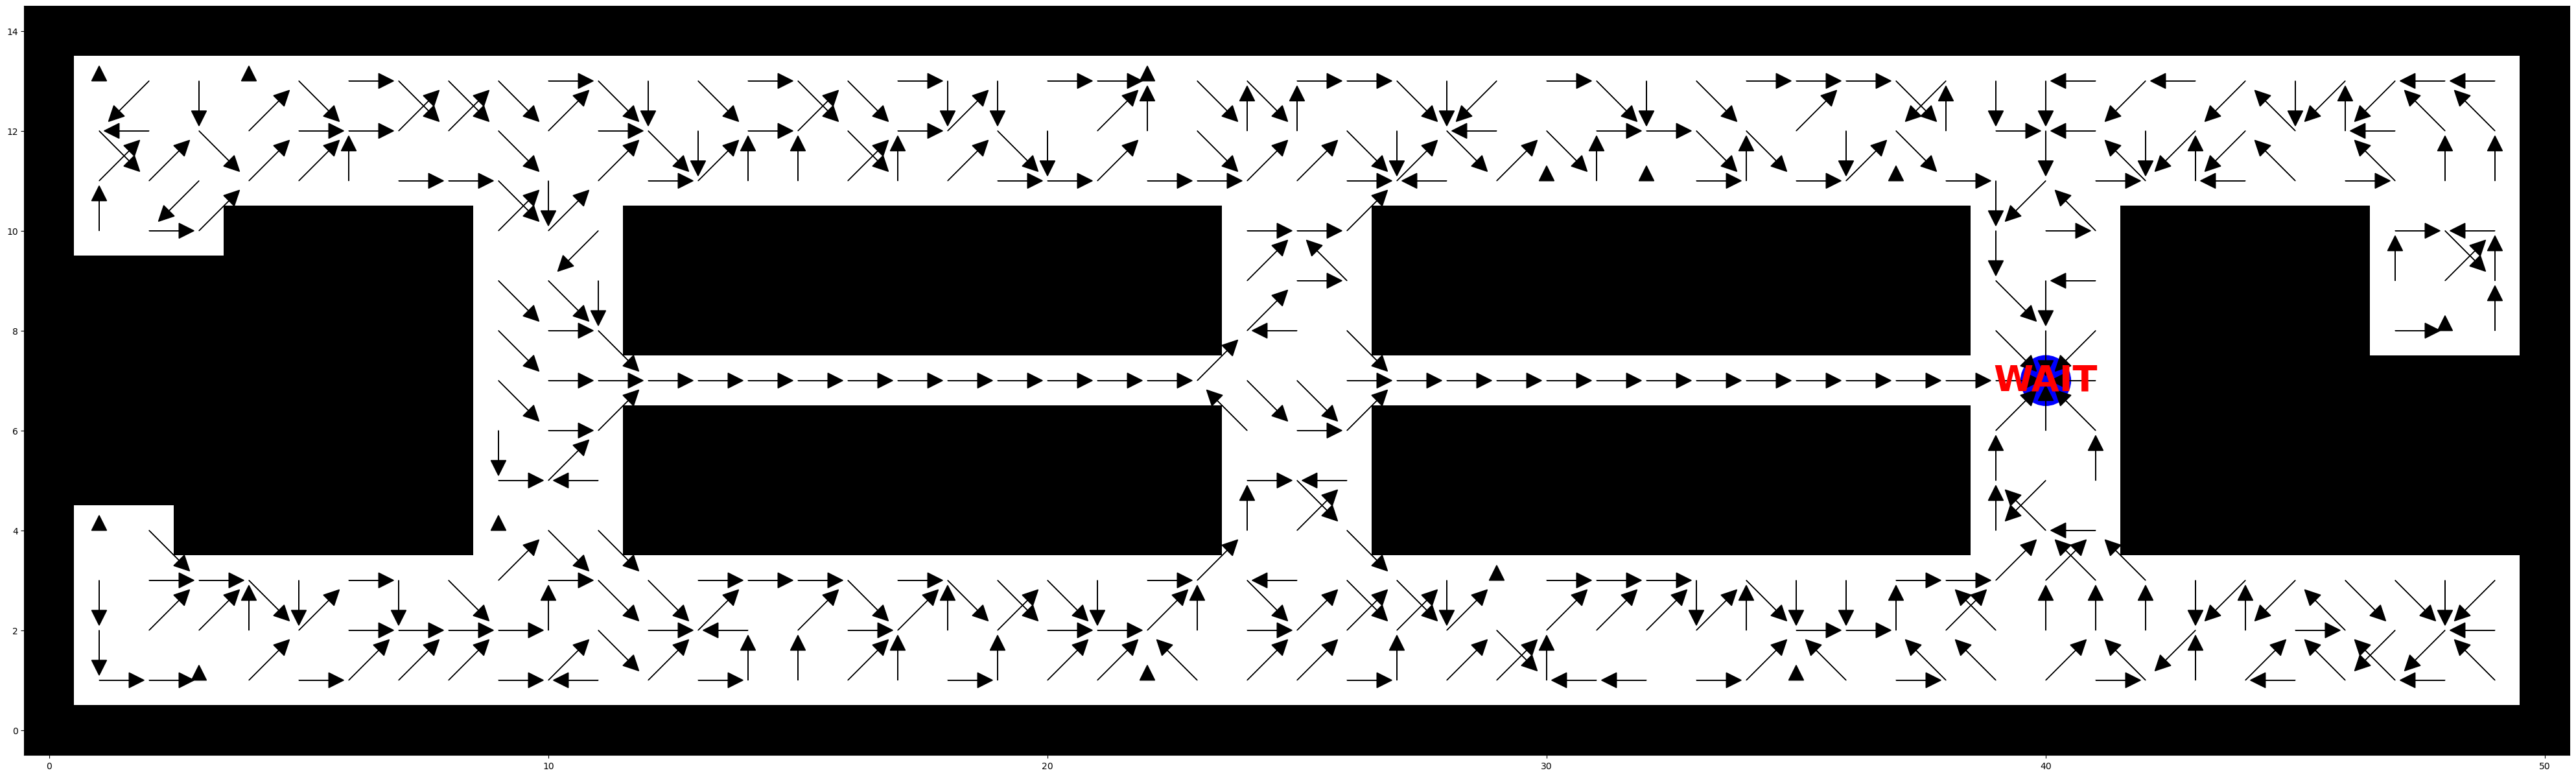

In [81]:
politica_sarsa_episodes_mid = sarsa(mapa, destino, 50000, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_episodes_mid)

#### SARSA - 100000 Episodios

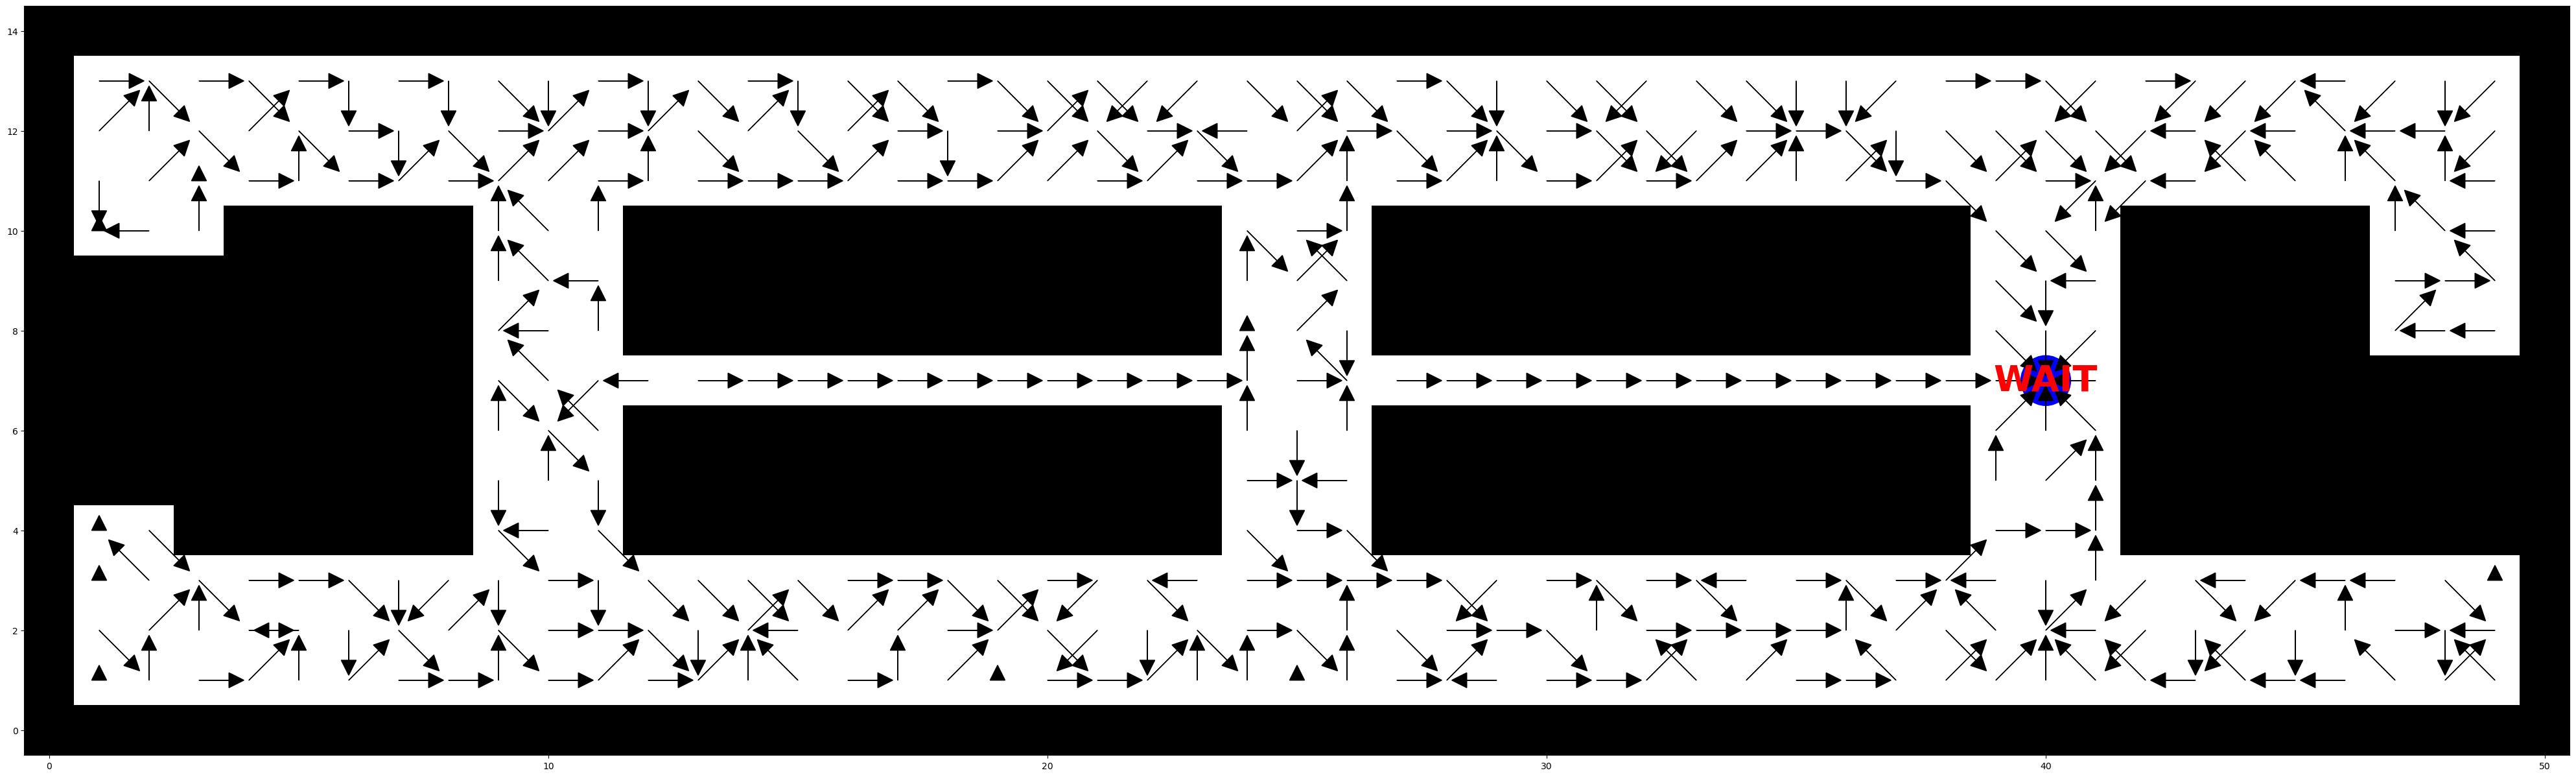

In [82]:
politica_sarsa_episodes_high = sarsa(mapa, destino, 100000, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_episodes_high)

#### SARSA - 50 Pasos

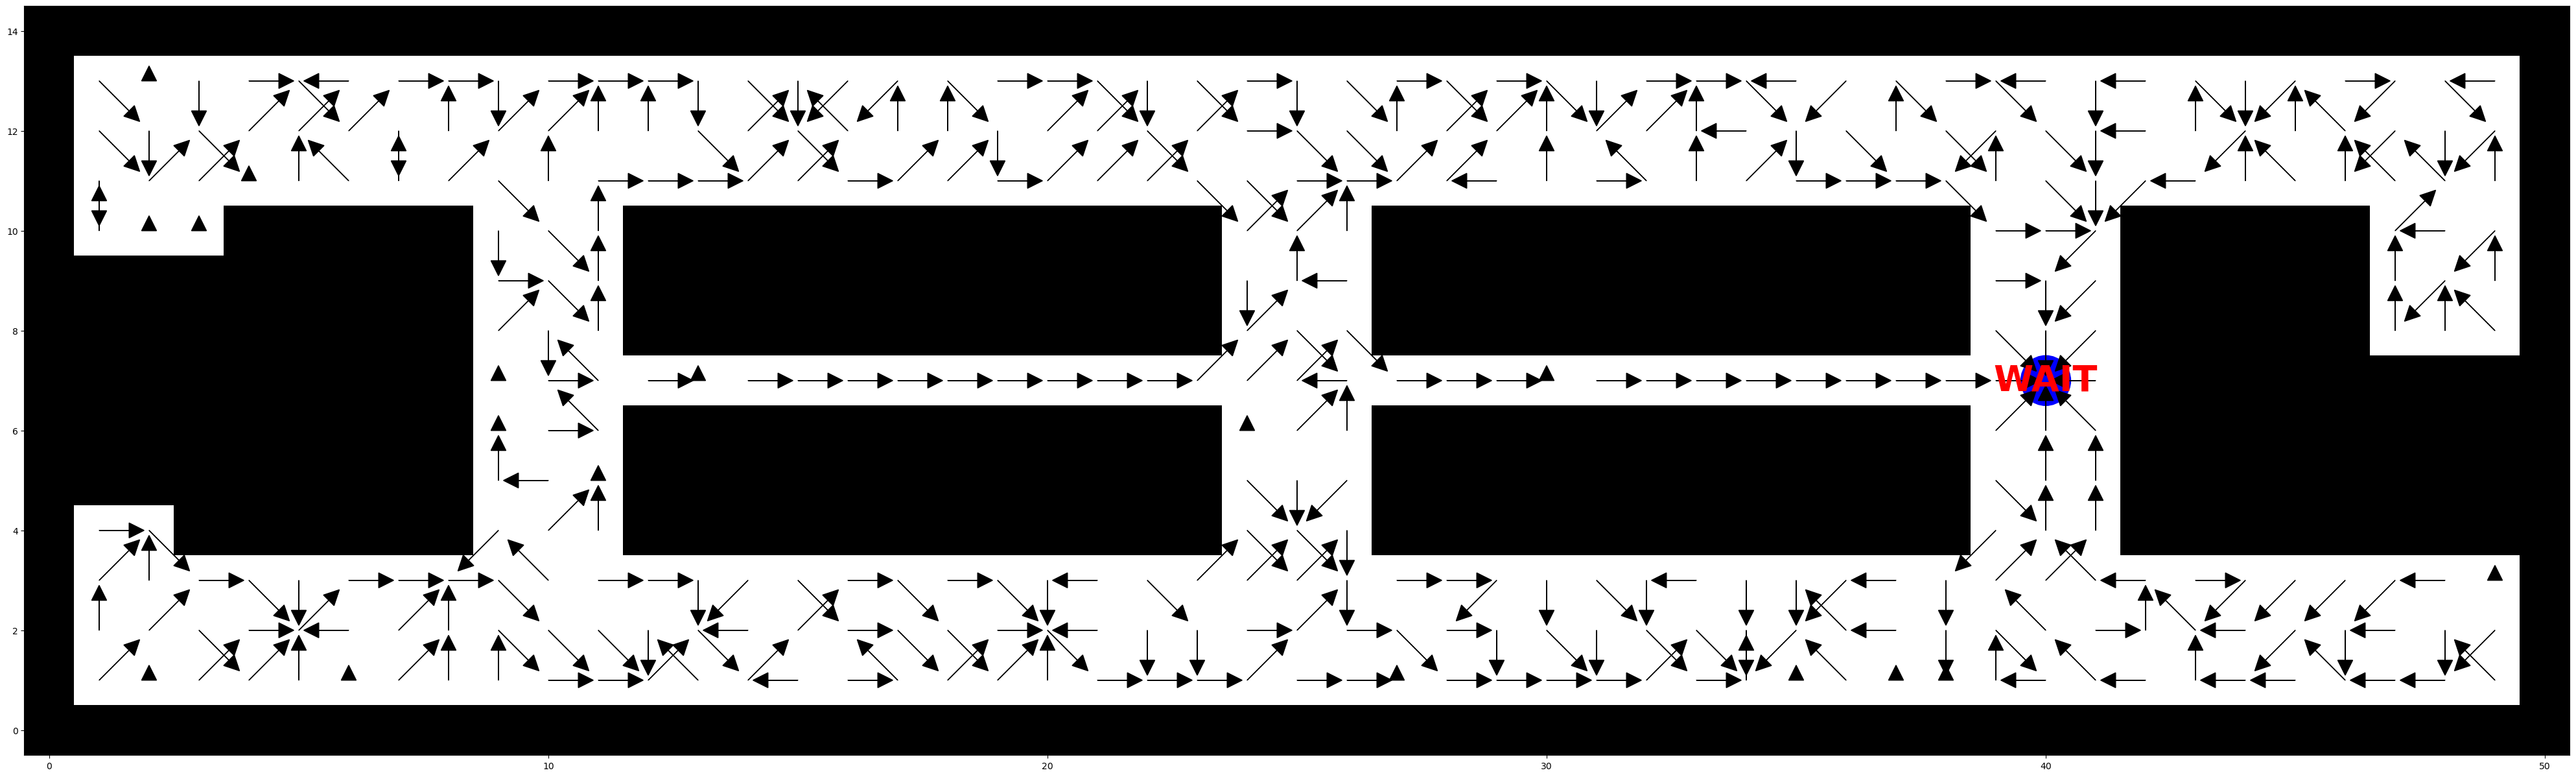

In [83]:
politica_sarsa_steps_low = sarsa(mapa, destino, 100000, max_steps=50, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_steps_low)

#### SARSA - 100 Pasos

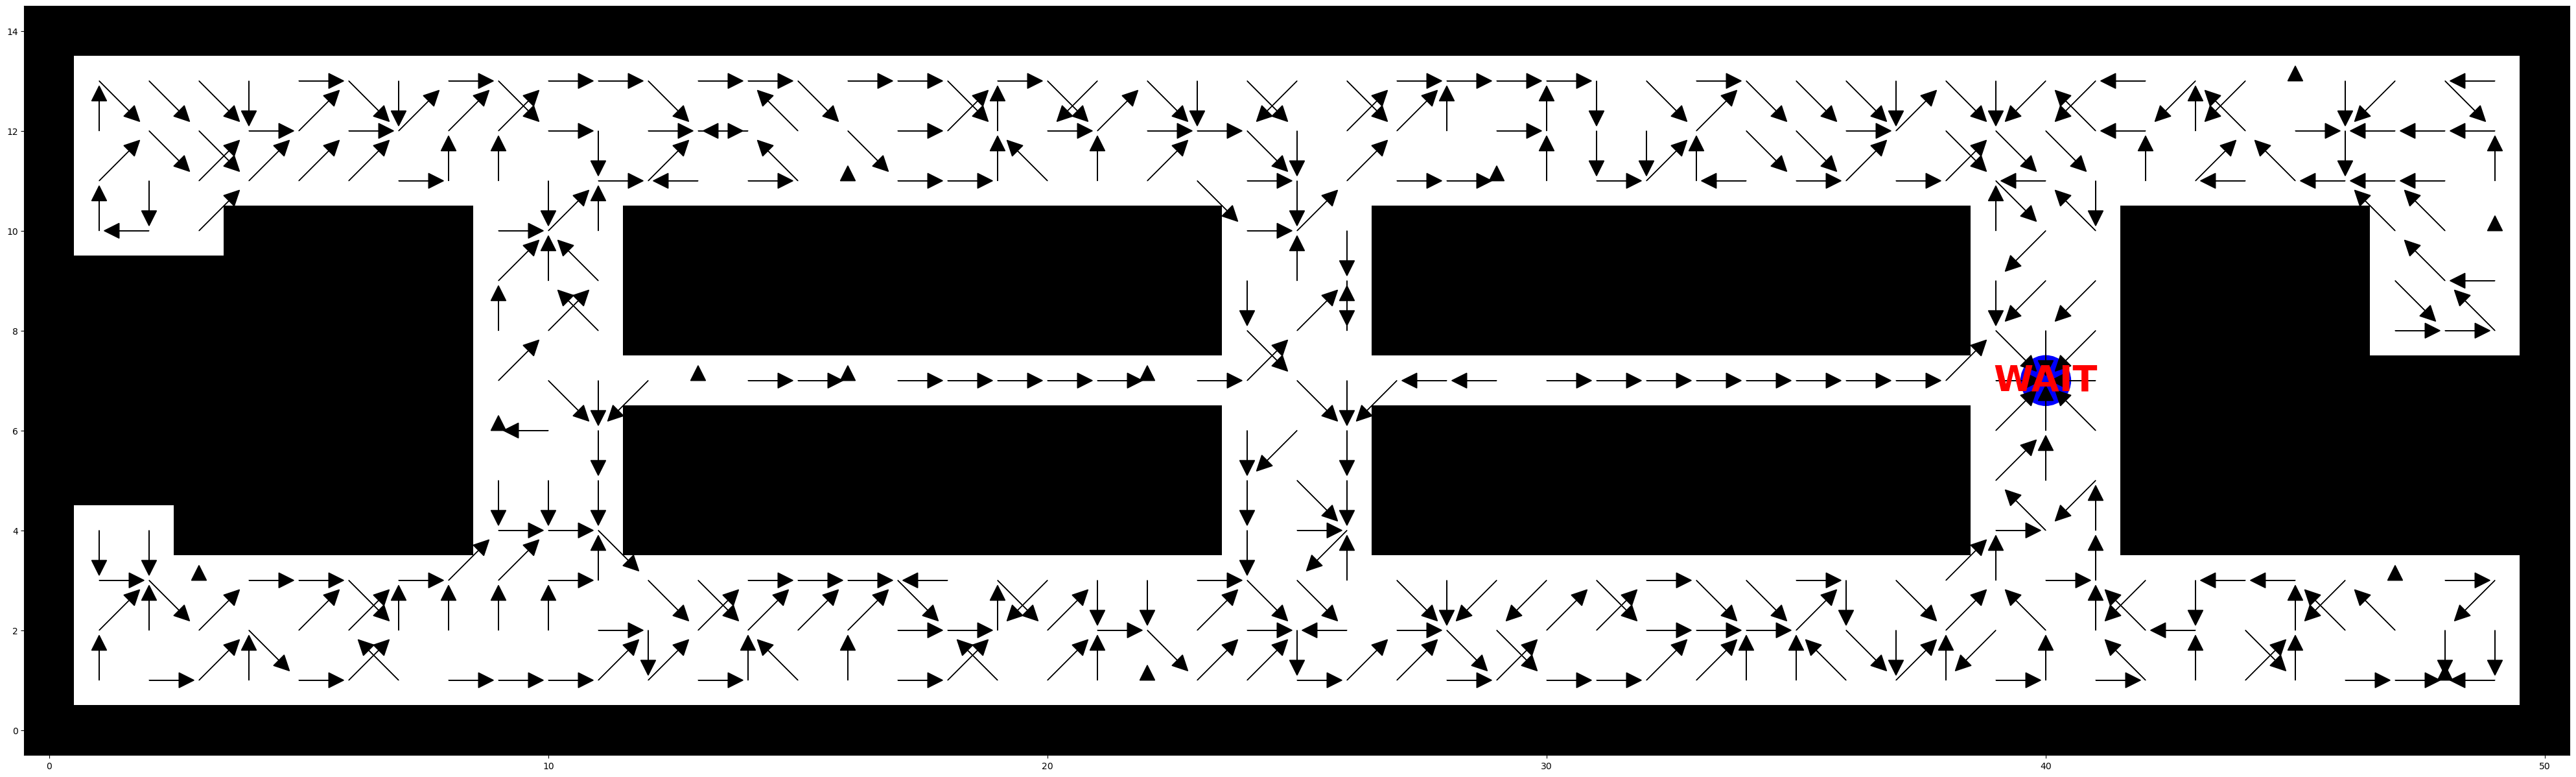

In [84]:
politica_sarsa_steps_mid = sarsa(mapa, destino, 100000, max_steps=100, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_steps_mid)

#### SARSA - 200 Pasos

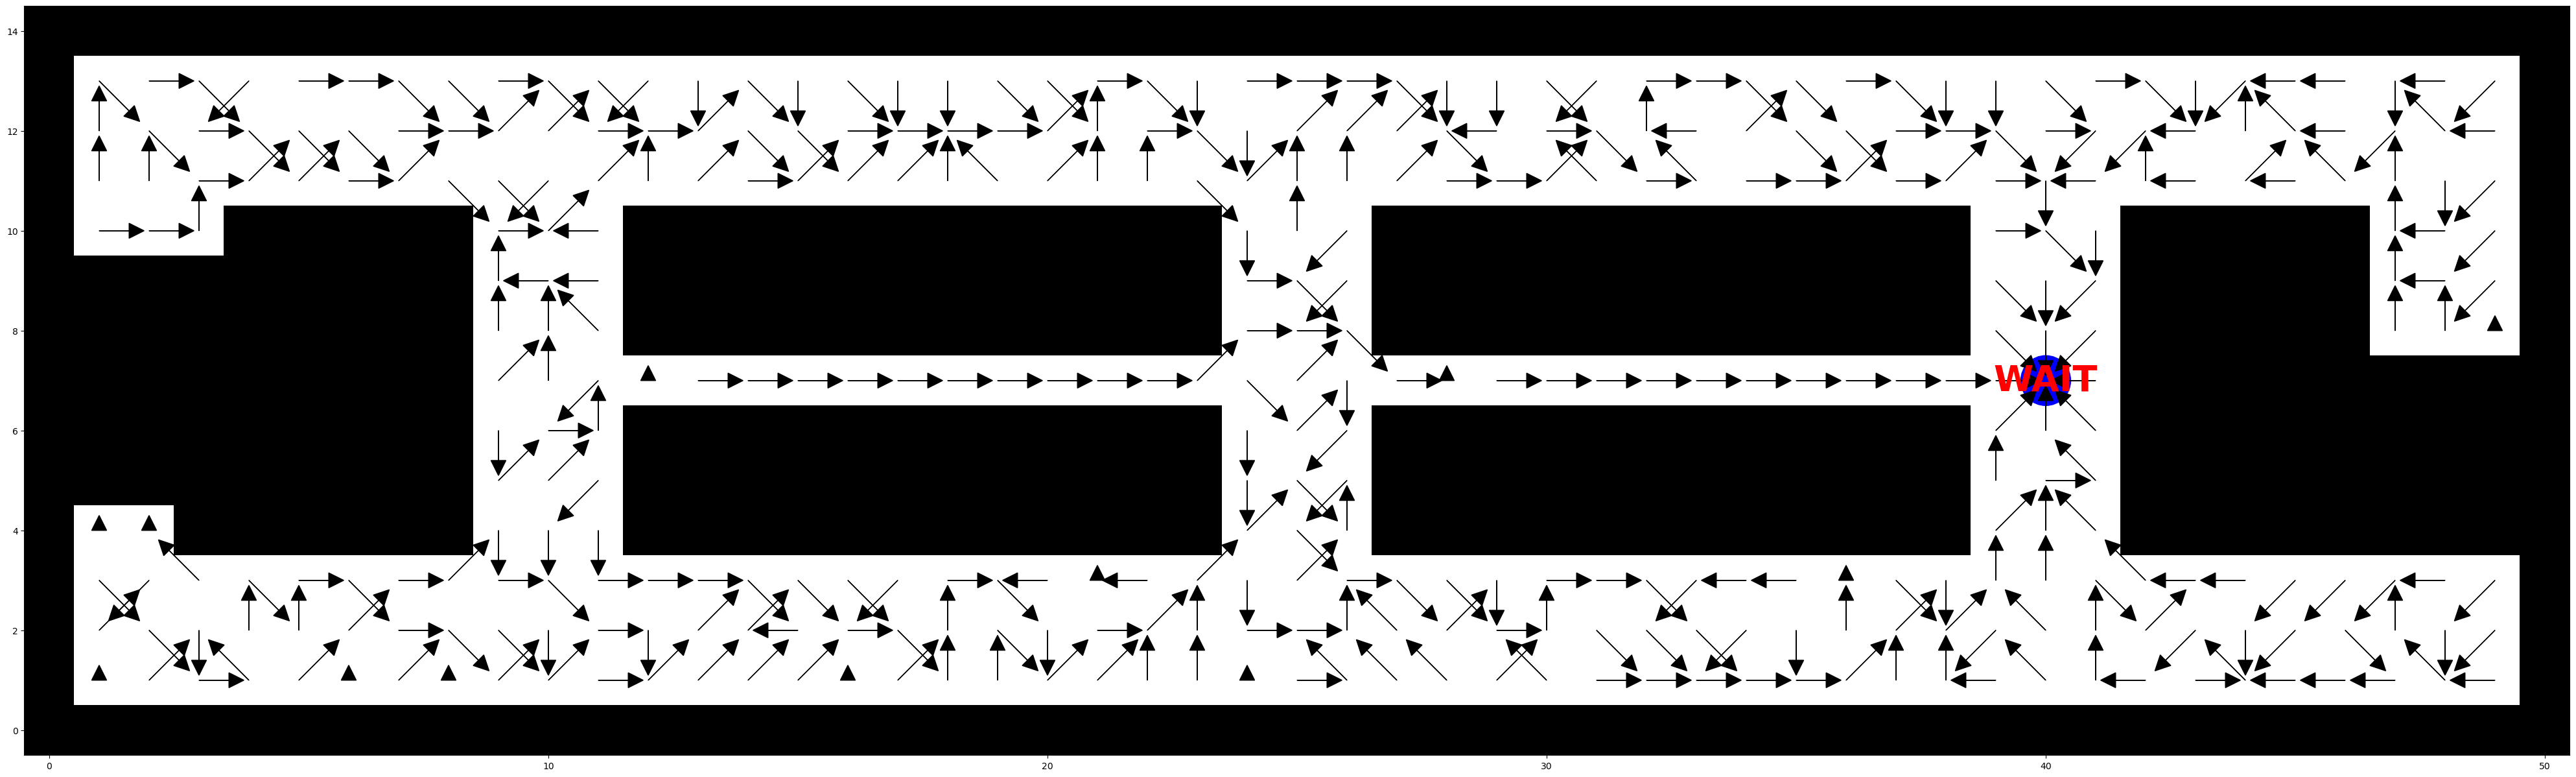

In [85]:
politica_sarsa_steps_high = sarsa(mapa, destino, 100000, max_steps=200, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_steps_high)

#### SARSA - $\alpha$ = 0.05

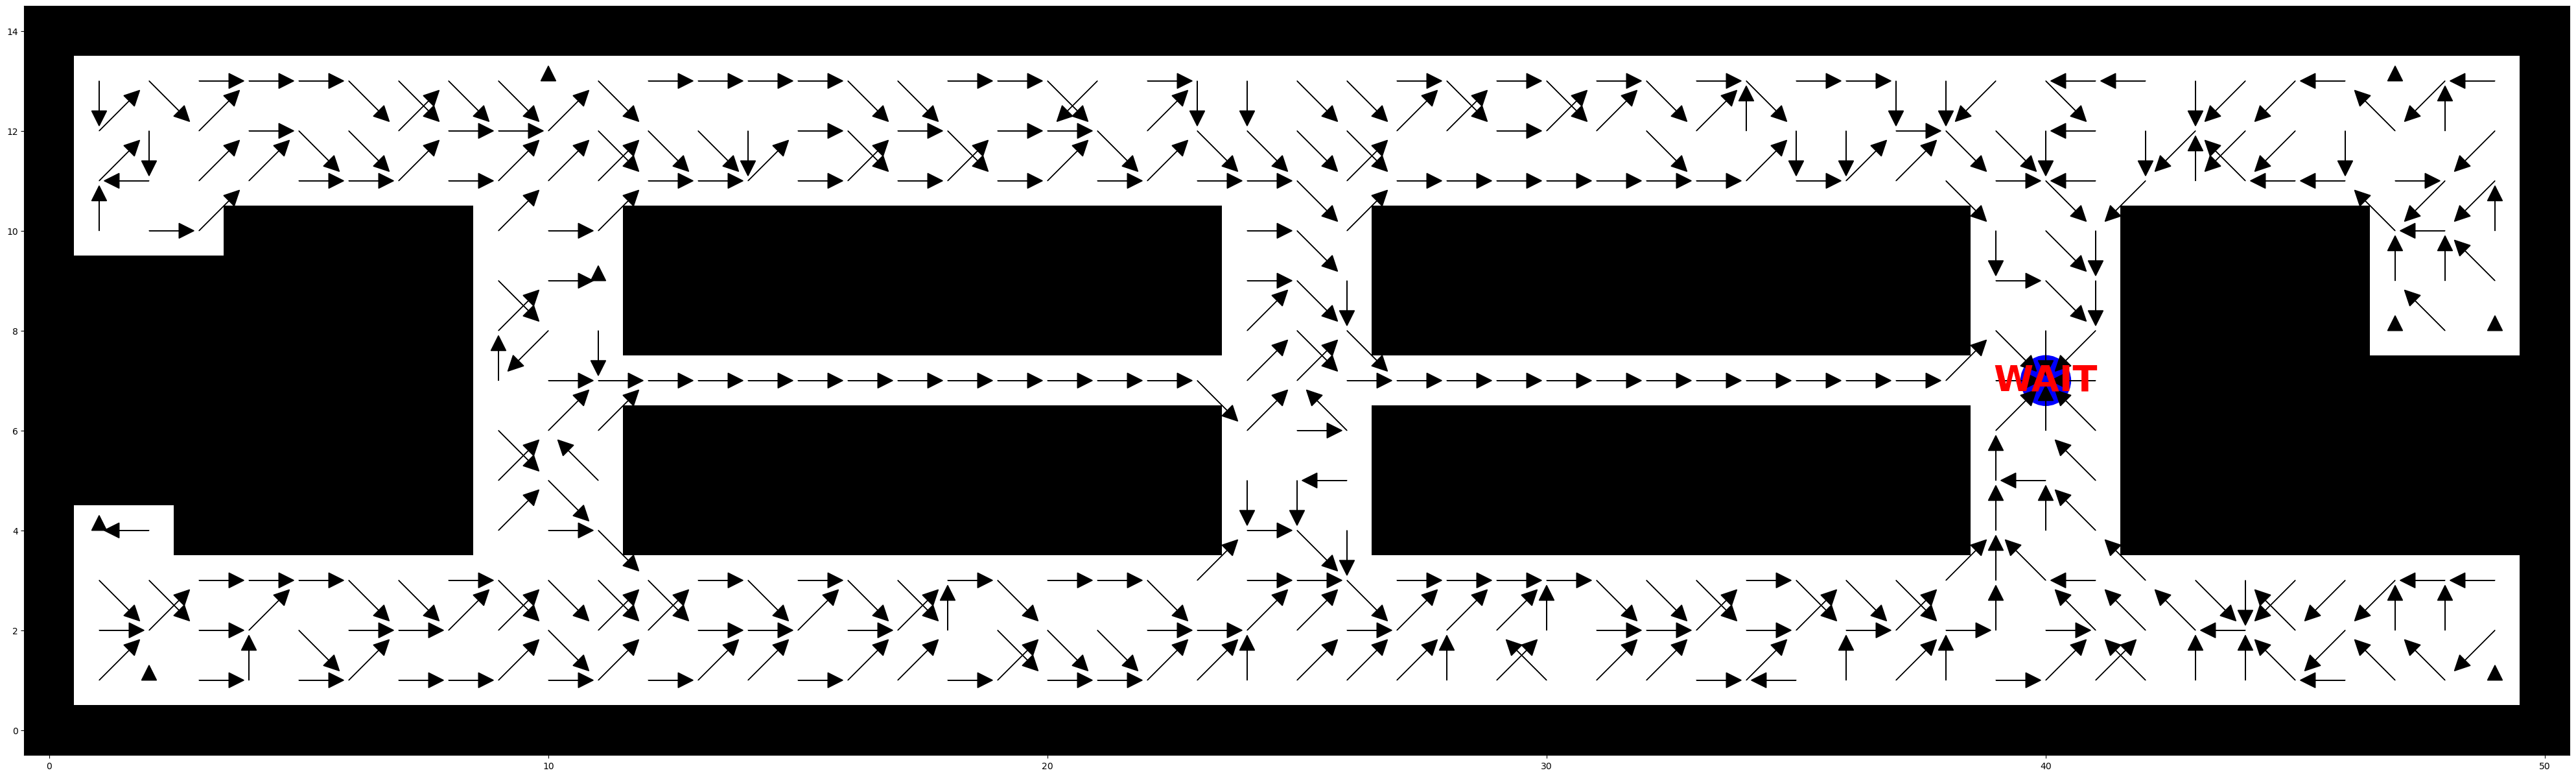

In [86]:
politica_sarsa_alpha_low = sarsa(mapa, destino, 100000, alpha=0.05, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_alpha_low)

#### SARSA - $\alpha$ = 0.1

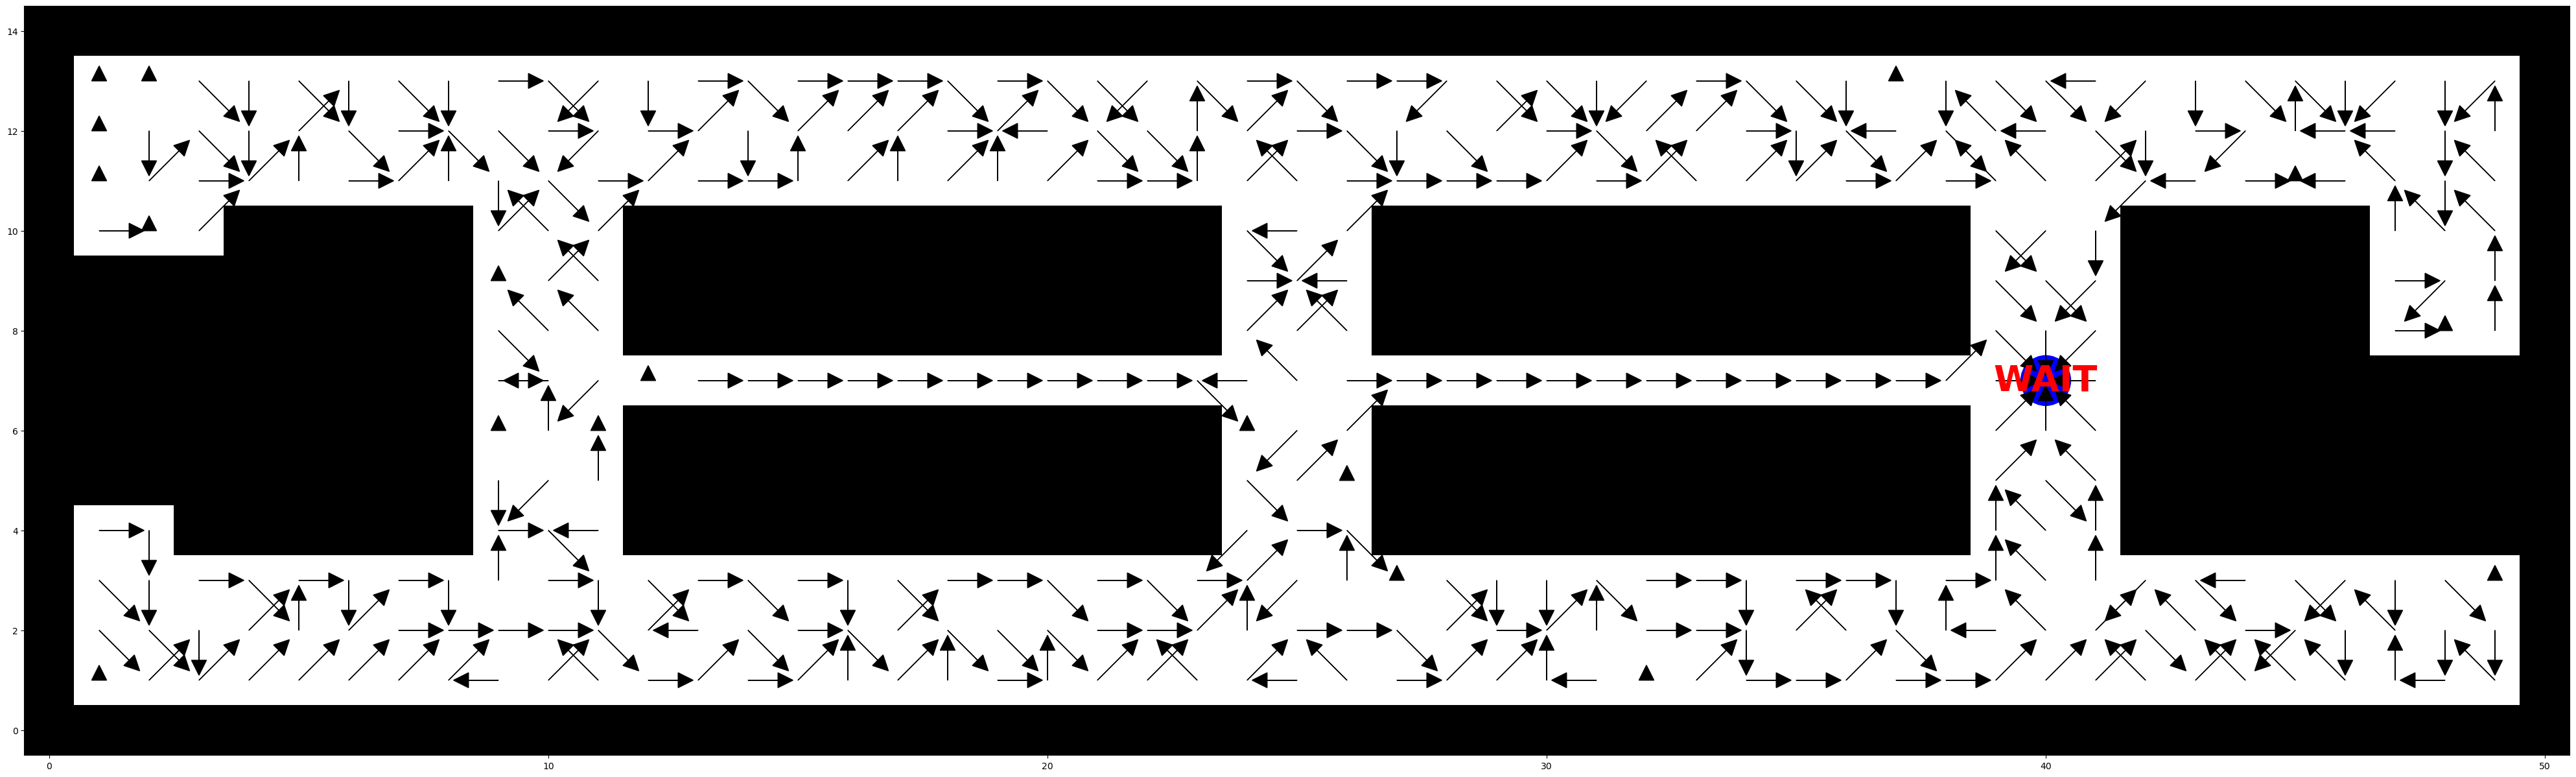

In [87]:
politica_sarsa_alpha_mid = sarsa(mapa, destino, 100000, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_alpha_mid)

#### SARSA - $\alpha$ = 0.2

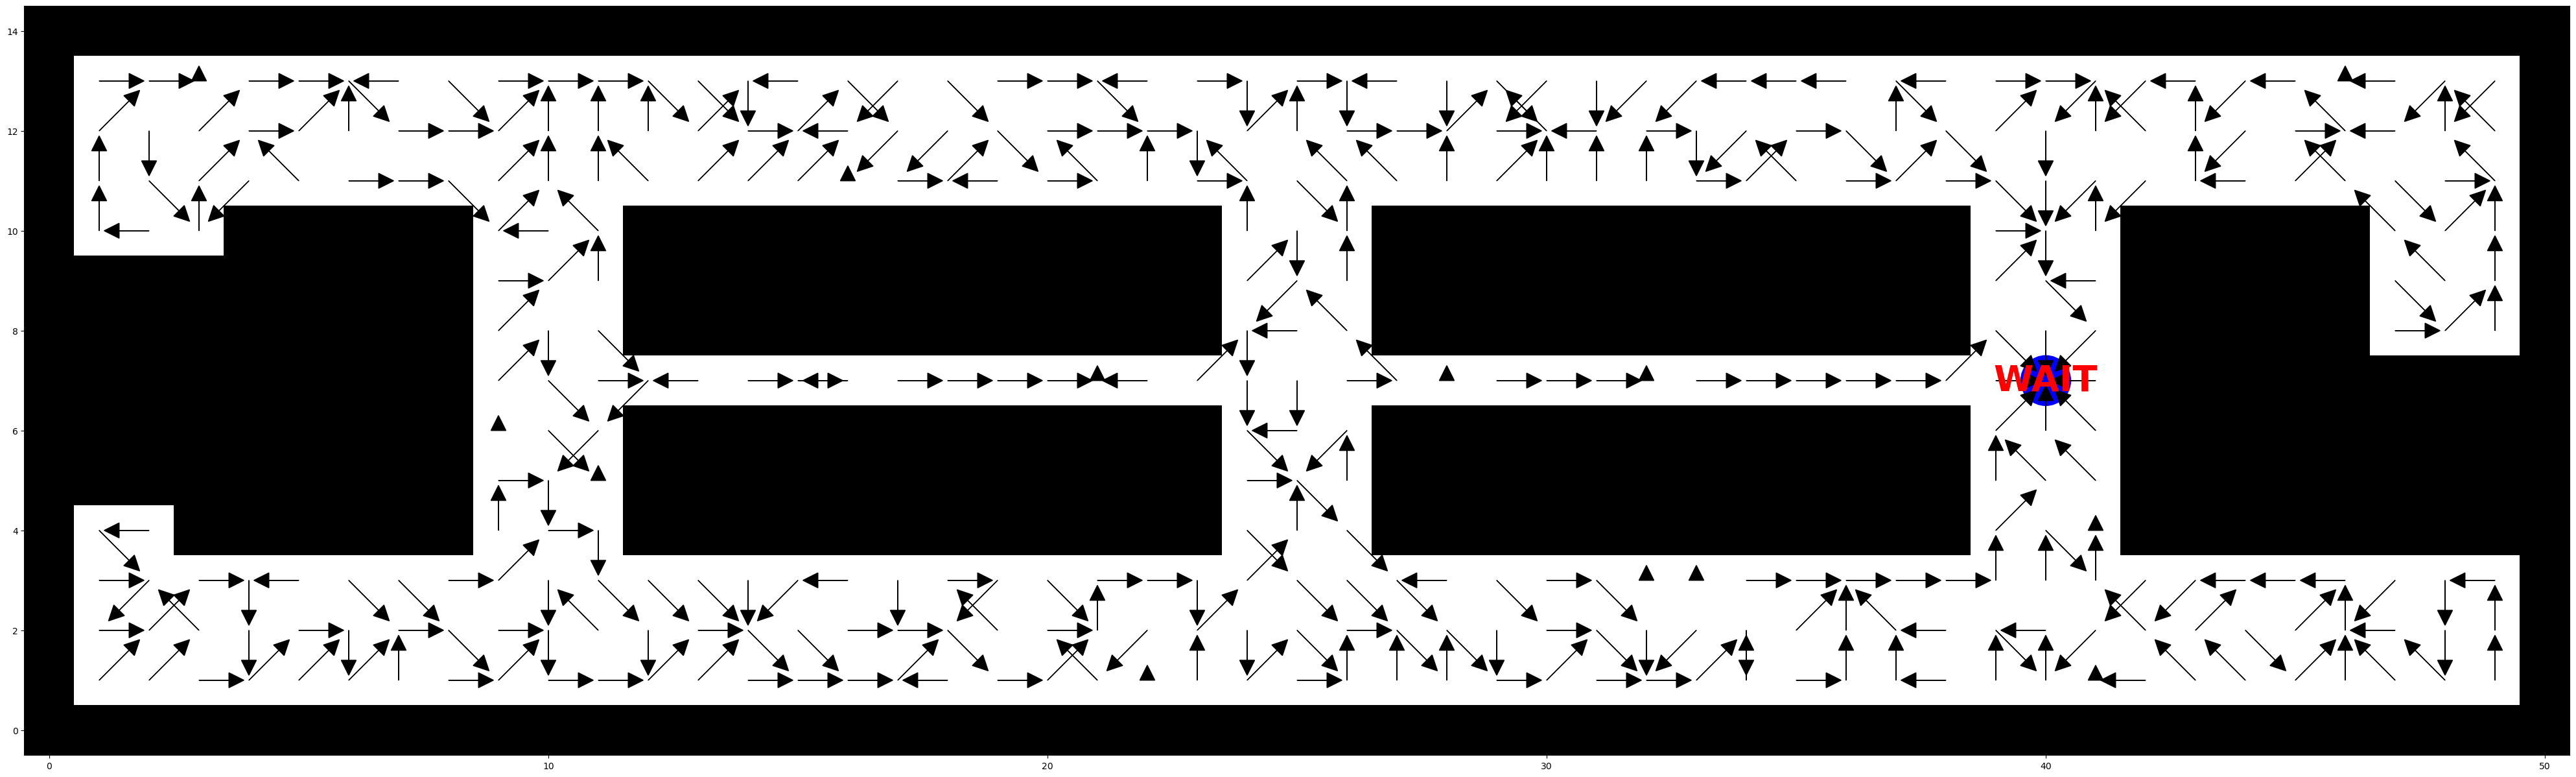

In [88]:
politica_sarsa_alpha_high = sarsa(mapa, destino, 100000, alpha=0.2, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_alpha_high)

#### SARSA - $\gamma$ = 0.5

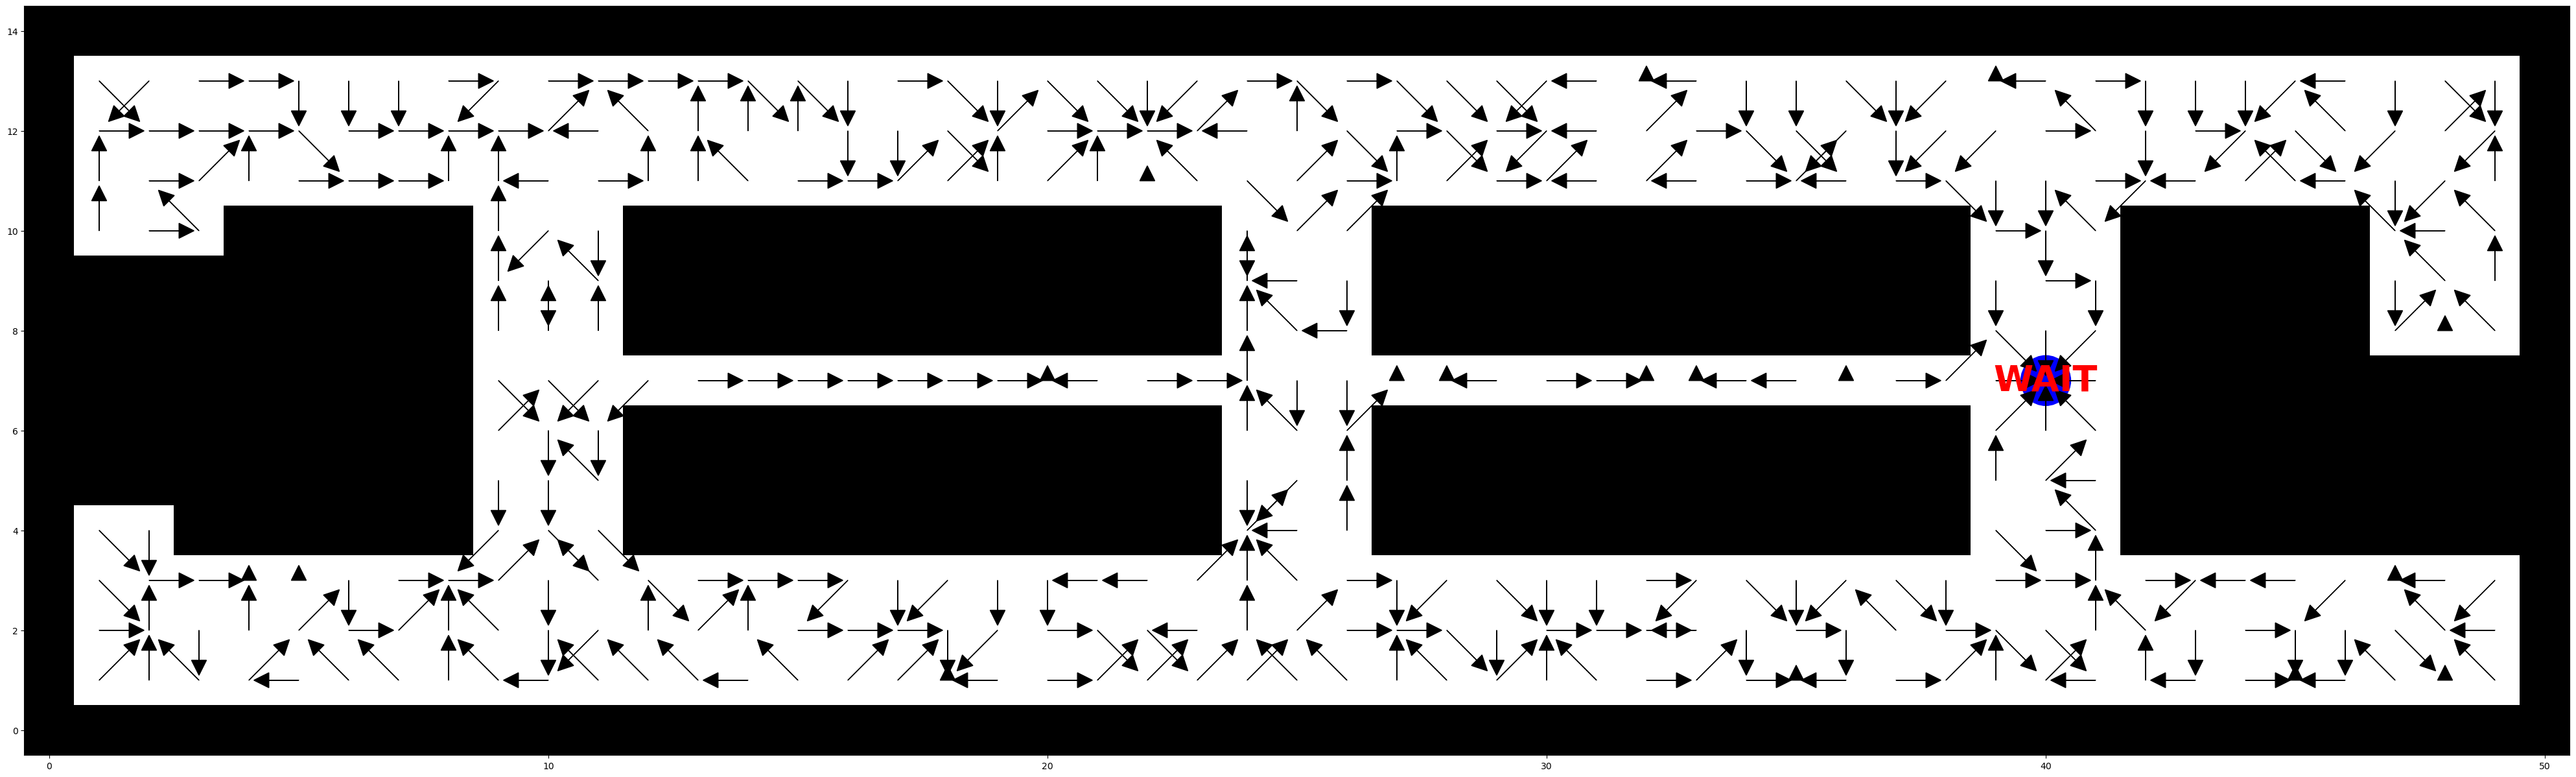

In [89]:
politica_sarsa_gamma_low = sarsa(mapa, destino, 100000, alpha=0.1, gamma=0.5, epsilon=0.1)
visualiza_politica(politica_sarsa_gamma_low)

#### SARSA - $\gamma$ = 0.8

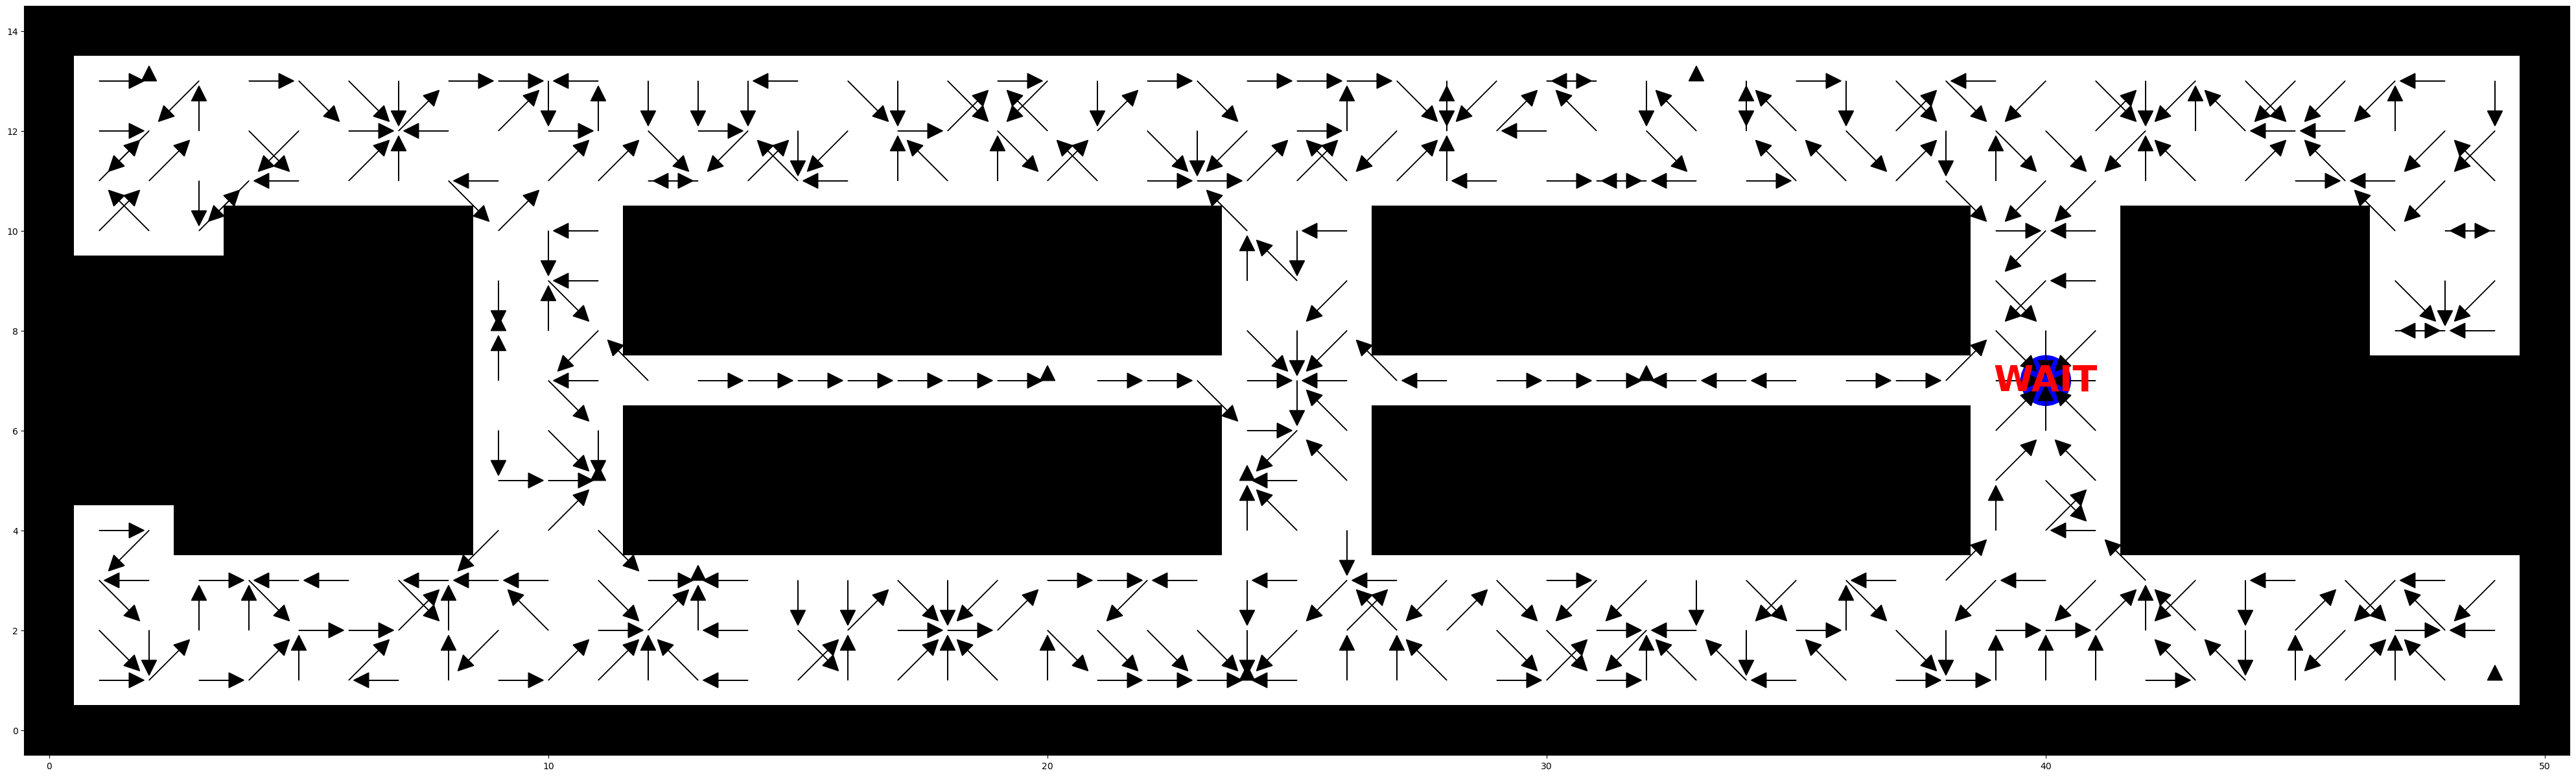

In [90]:
politica_sarsa_gamma_mid = sarsa(mapa, destino, 100000, alpha=0.1, gamma=0.8, epsilon=0.1)
visualiza_politica(politica_sarsa_gamma_mid)

#### SARSA - $\gamma$ = 0.95

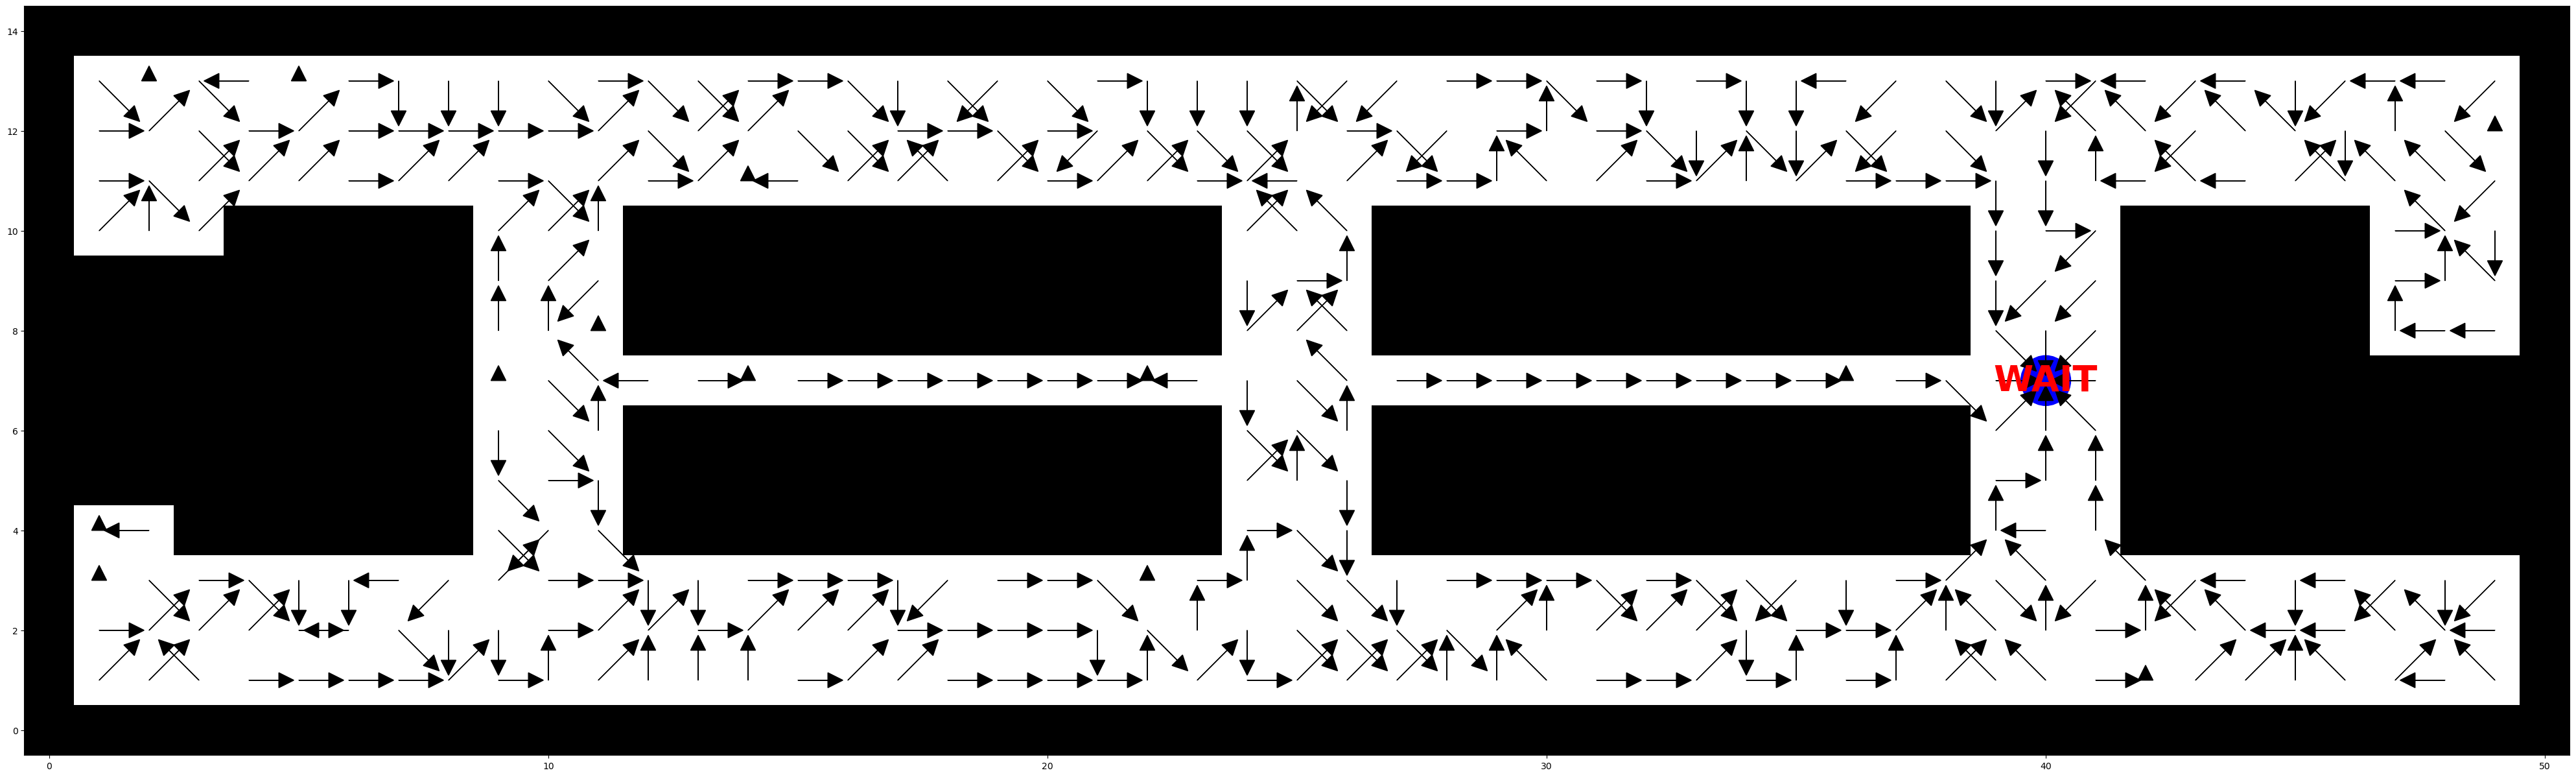

In [91]:
politica_sarsa_gamma_high = sarsa(mapa, destino, 100000, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_gamma_high)

#### SARSA - $\epsilon$ = 0.05

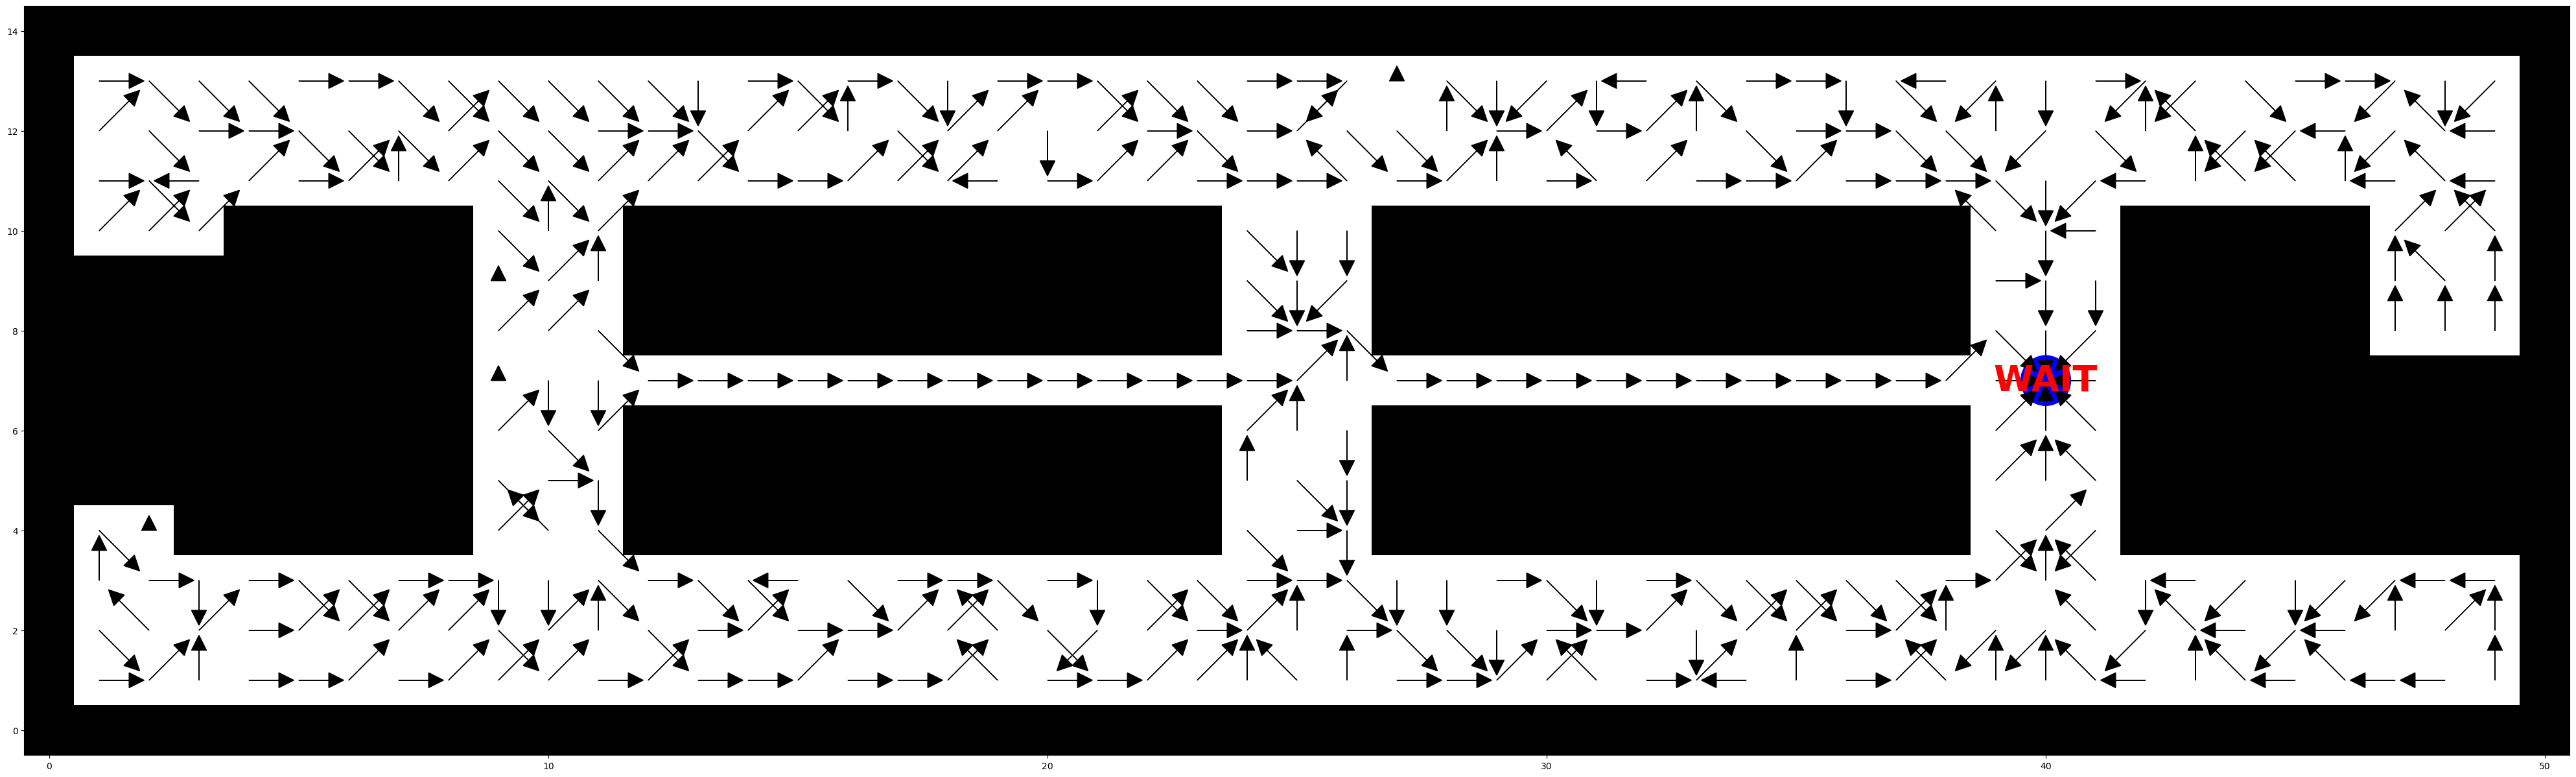

In [92]:
politica_sarsa_epsilon_low = sarsa(mapa, destino, 100000, alpha=0.1, gamma=0.95, epsilon=0.05)
visualiza_politica(politica_sarsa_epsilon_low)

#### SARSA - $\epsilon$ = 0.1

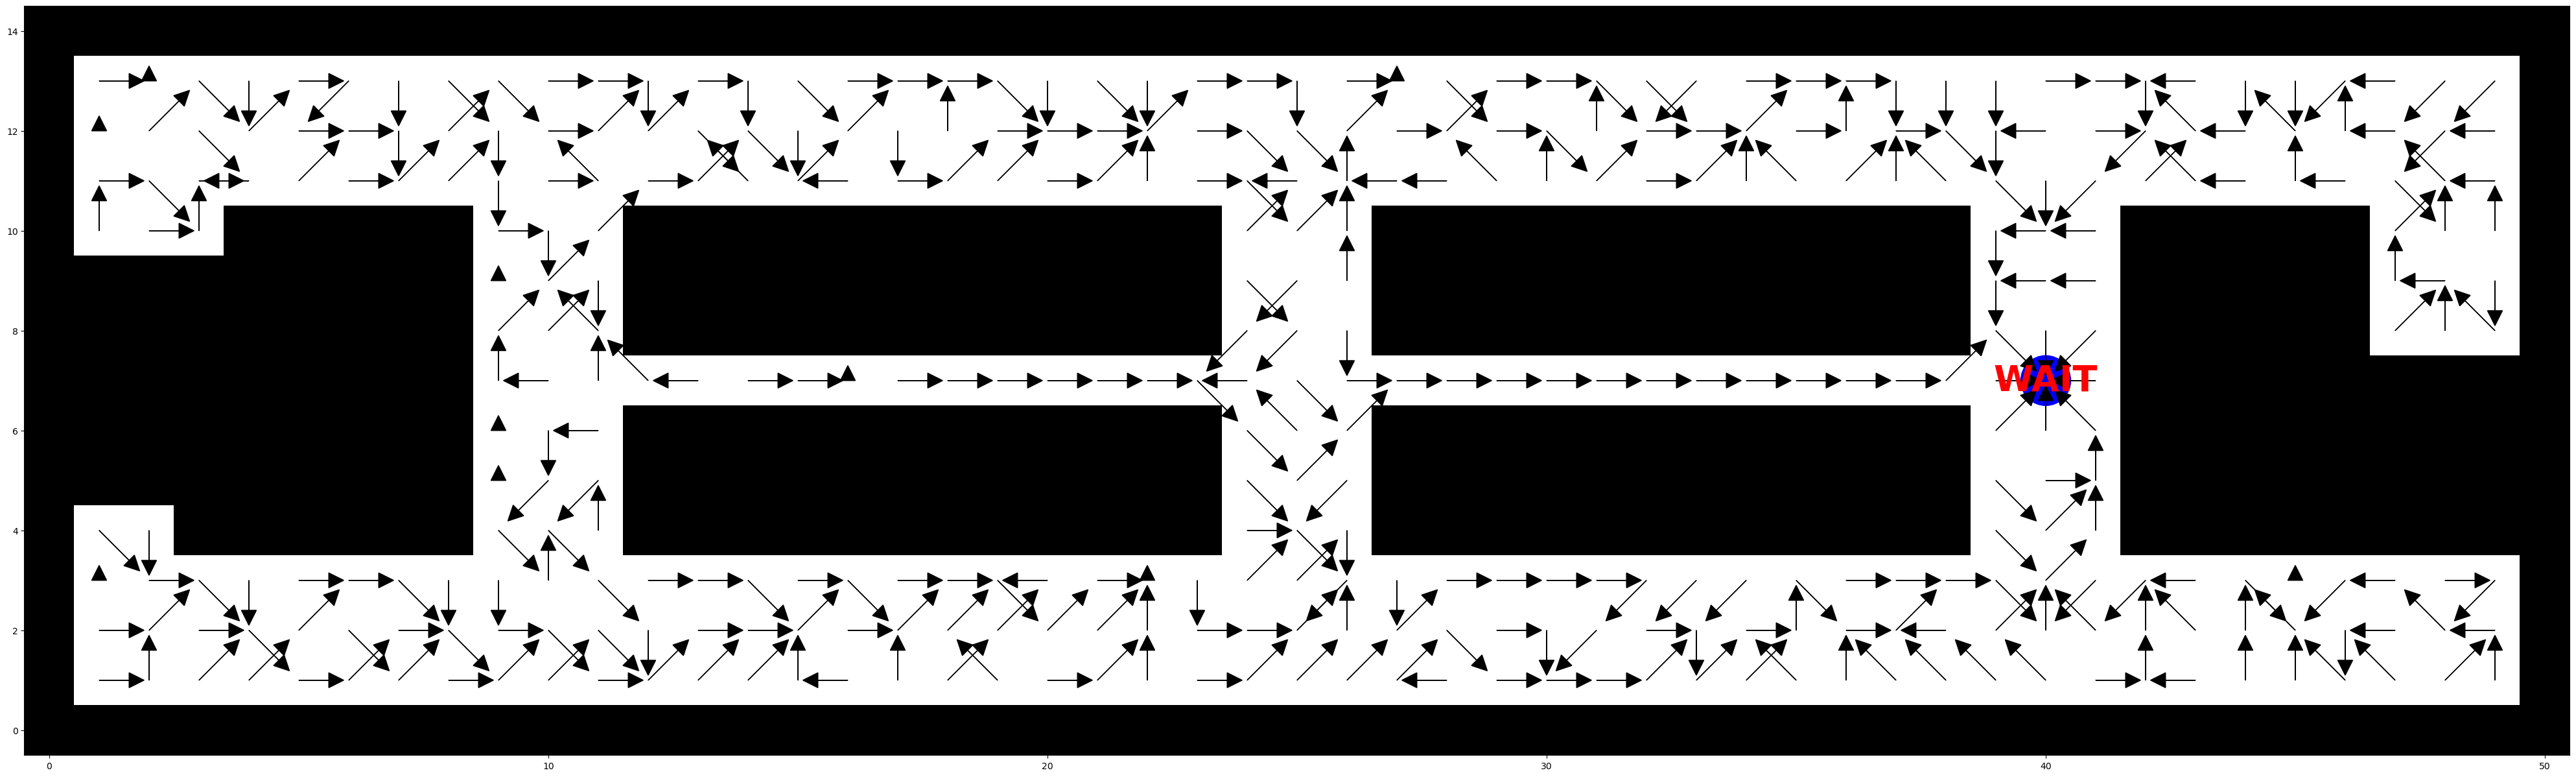

In [93]:
politica_sarsa_epsilon_mid = sarsa(mapa, destino, 100000, alpha=0.1, gamma=0.95, epsilon=0.1)
visualiza_politica(politica_sarsa_epsilon_mid)

#### SARSA - $\epsilon$ = 0.2

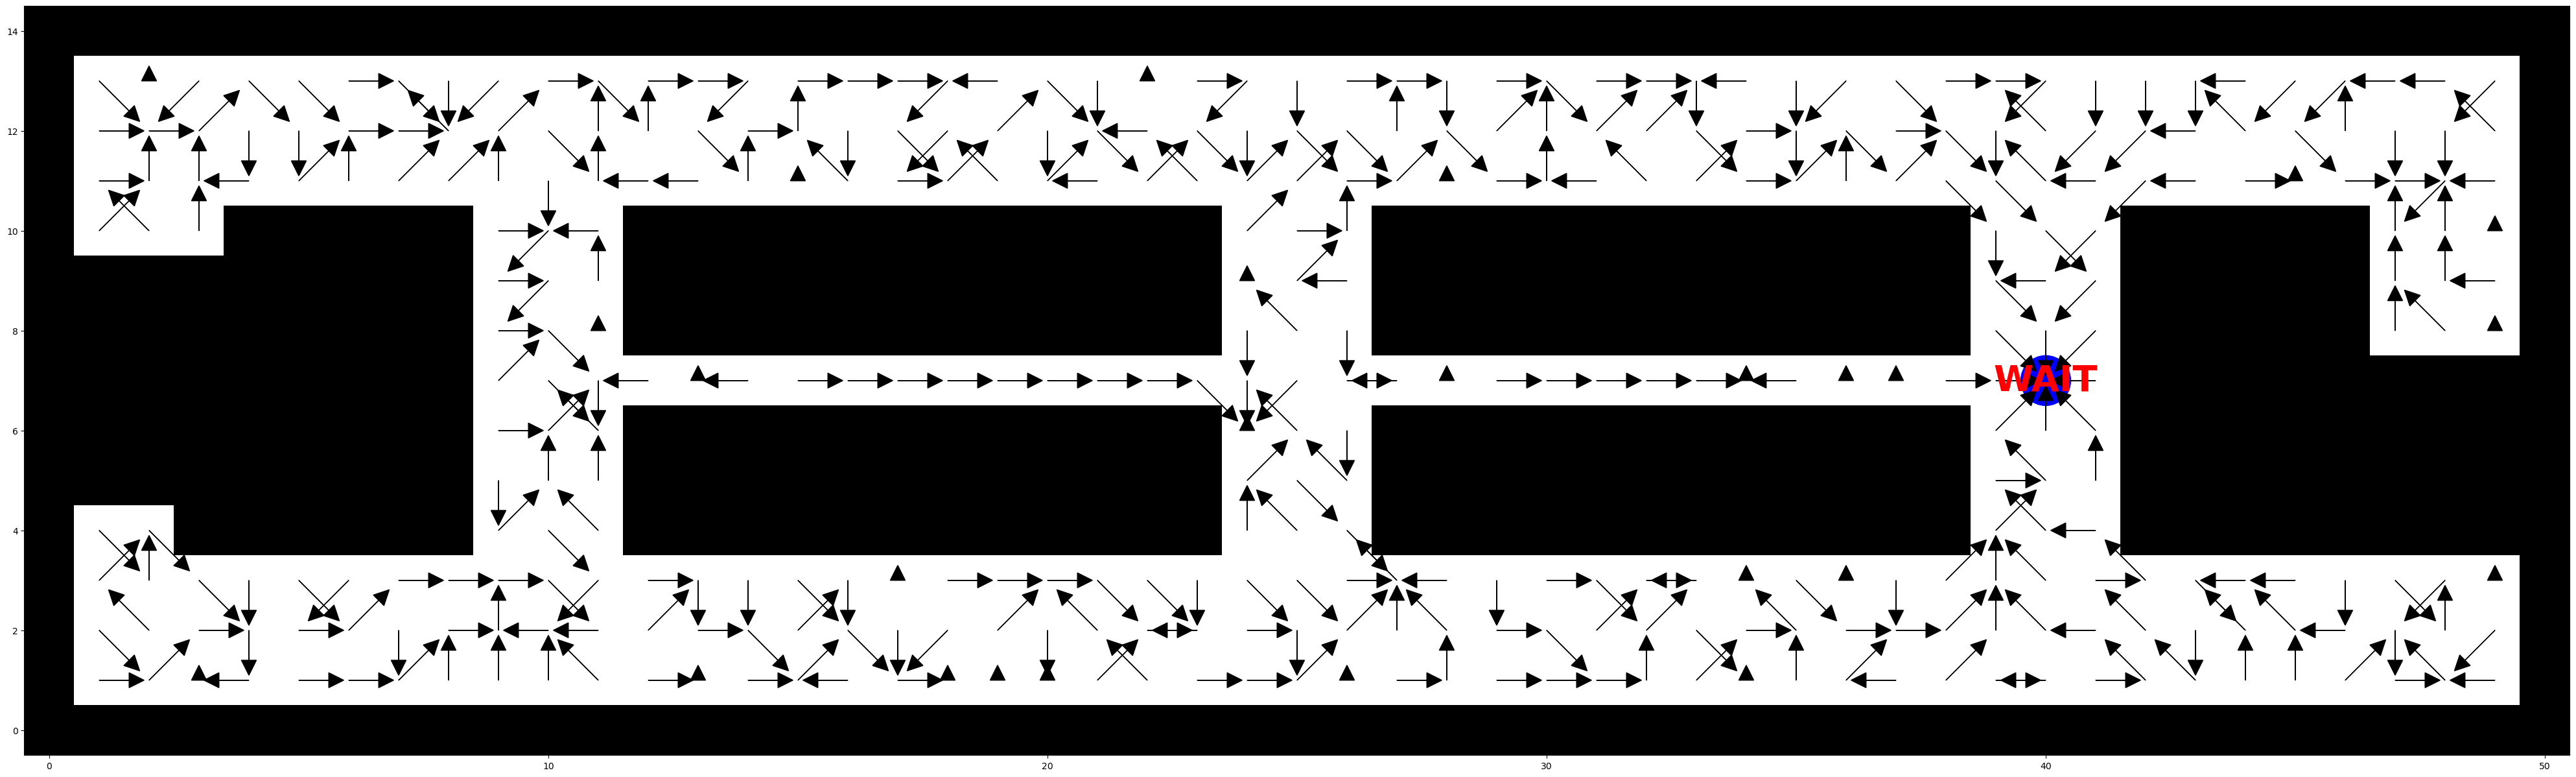

In [94]:
politica_sarsa_epsilon_high = sarsa(mapa, destino, 100000, alpha=0.1, gamma=0.95, epsilon=0.2)
visualiza_politica(politica_sarsa_epsilon_high)

#### SARSA - Óptima (100,000 Episodios, $\alpha$ = 0.05, $\gamma$ = 0.95, $\epsilon$ =0.05)

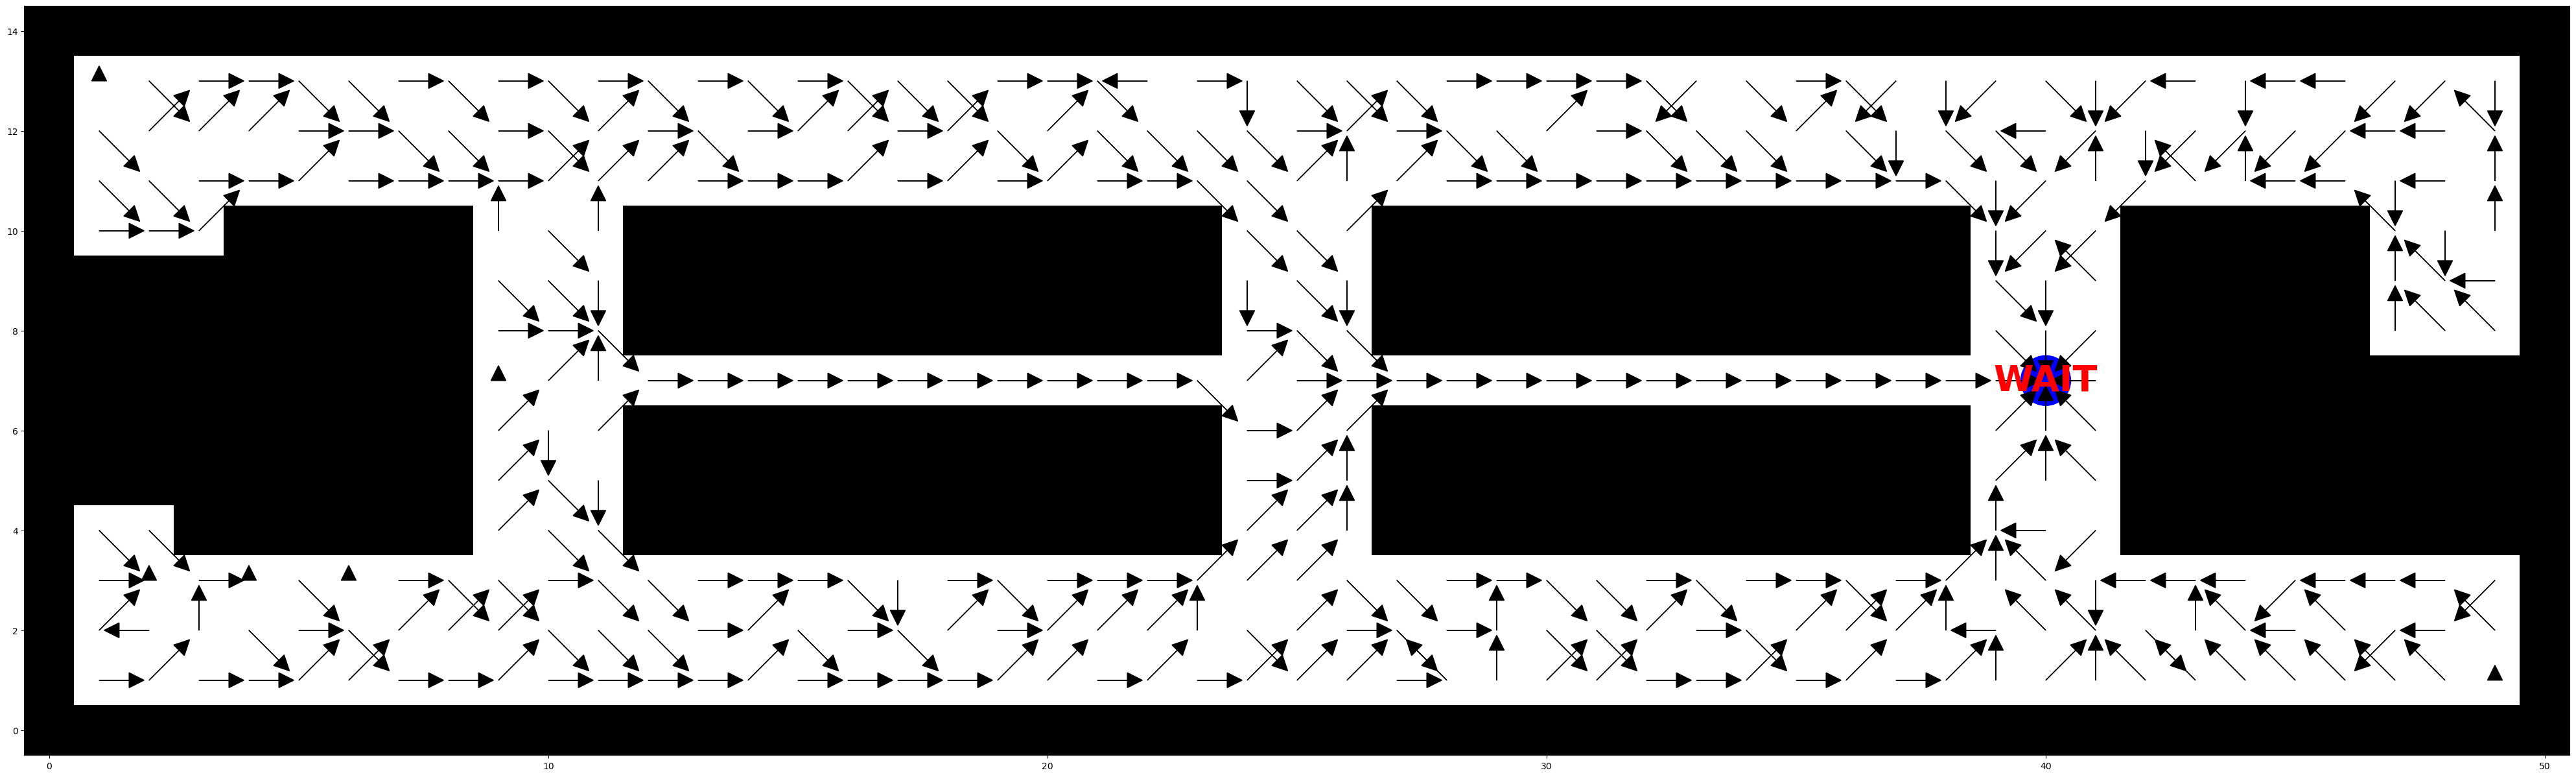

In [95]:
politica_sarsa_optima = sarsa(mapa, destino, 100000, alpha=0.05, gamma=0.95, epsilon=0.05)
visualiza_politica(politica_sarsa_optima)

### **Apartado 4: Nuevos mapas y comparativa**

En este apartado, nos enfocaremos en estudiar cómo se comportan los distintos algoritmos de aprendizaje por refuerzo cuando se les aplica a una variedad de mapas y escenarios nuevos. Utilizaremos los parámetros que hemos identificado como óptimos a través de experimentaciones previas para garantizar que cada algoritmo opere bajo las mejores condiciones posibles.


### Mapa 2

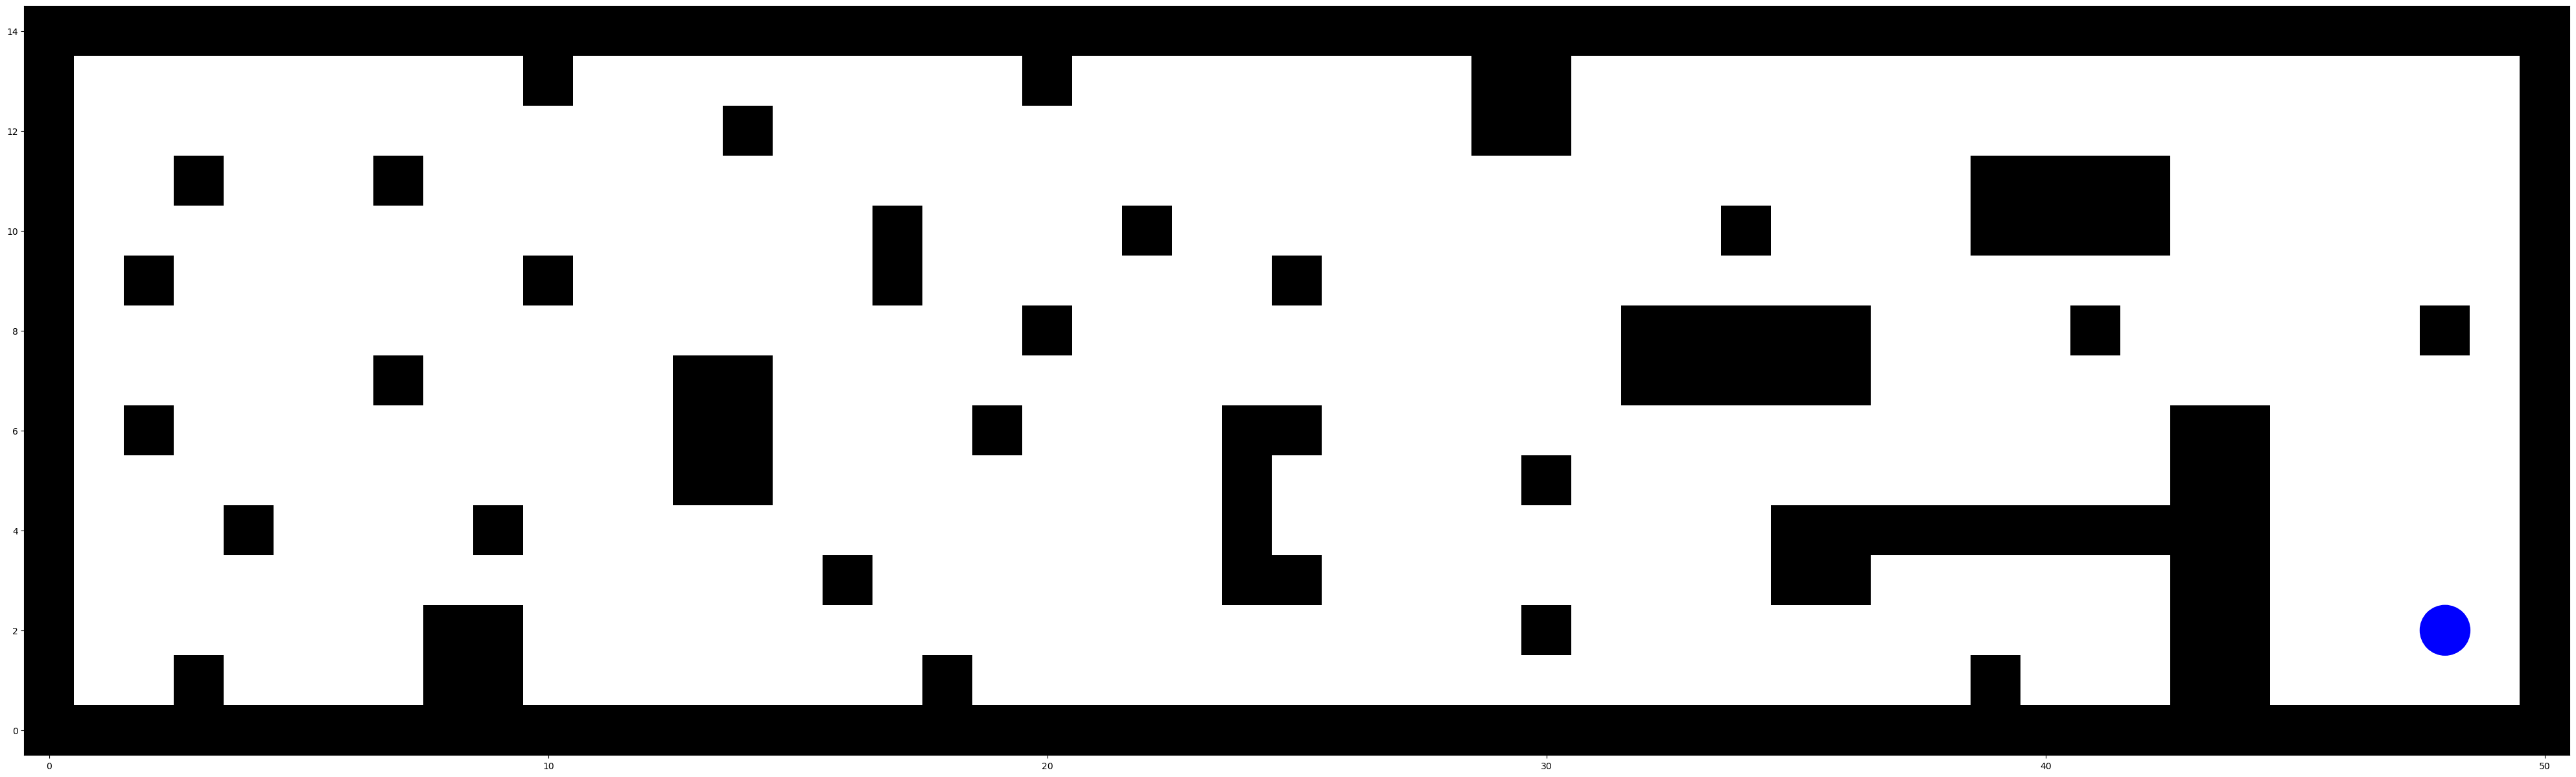

In [96]:
mapa,destino = lee_mapa("map2.txt")
visualiza_mapa()

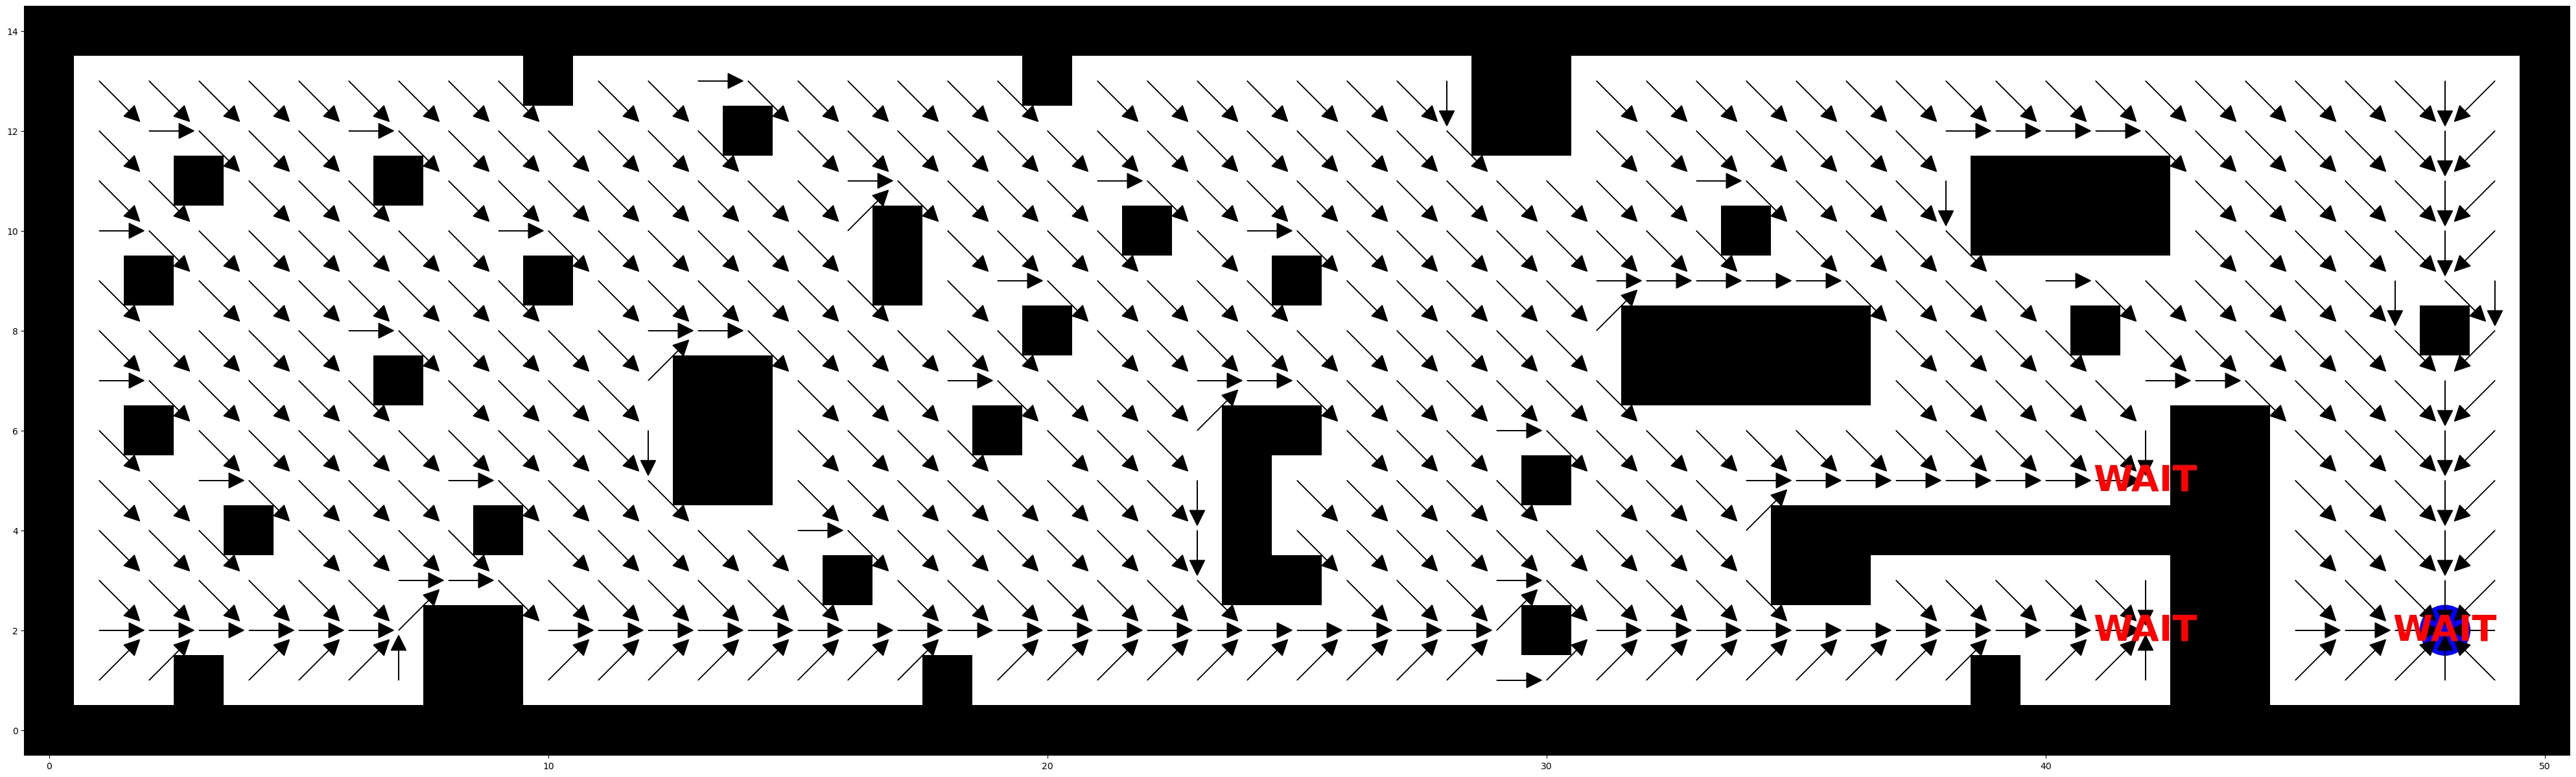

In [97]:
politica_greedy = crea_politica_greedy()
visualiza_politica(politica_greedy)

### Comparativa de algoritmos en el mapa 2

#### Q-Learning

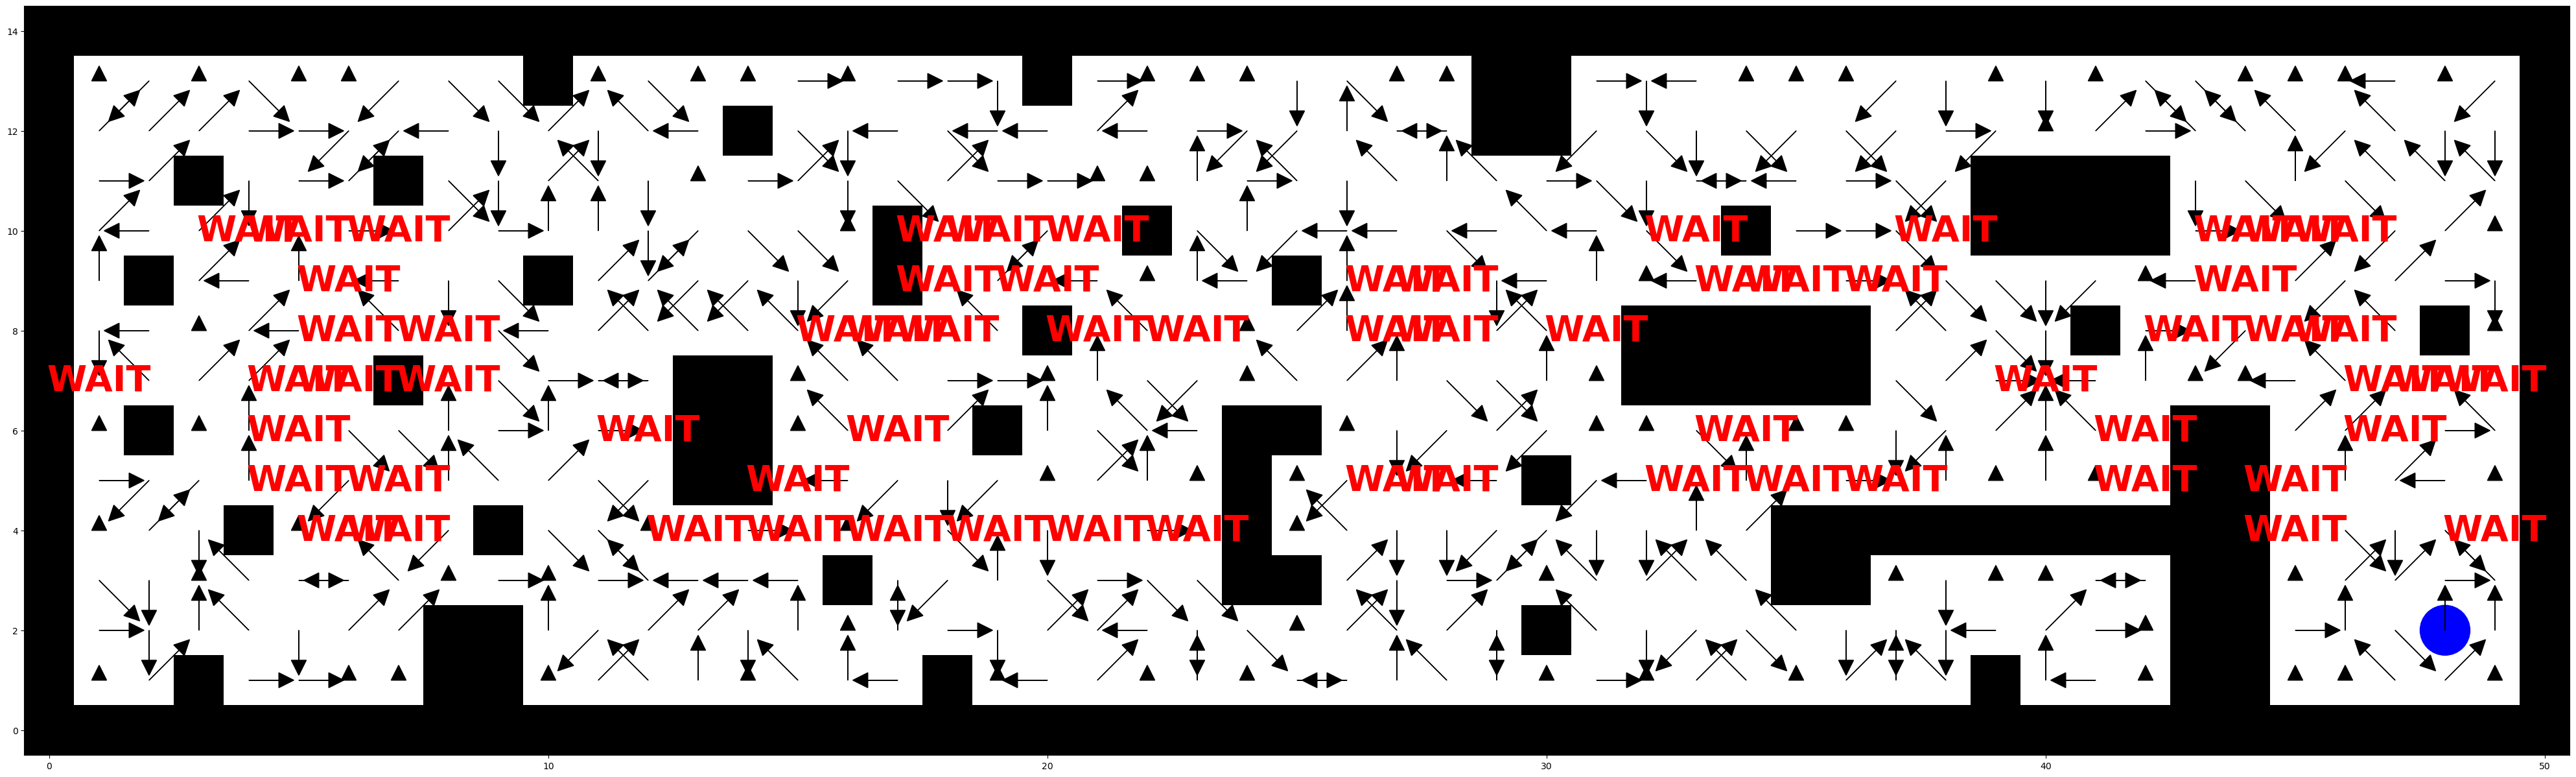

In [98]:
ql_optima = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.99, n_iter=100000)
ql_optima.run()
politica_ql_optima = parsea_politica_ql(ql_optima)
visualiza_politica(politica_ql_optima)

#### Montecarlo

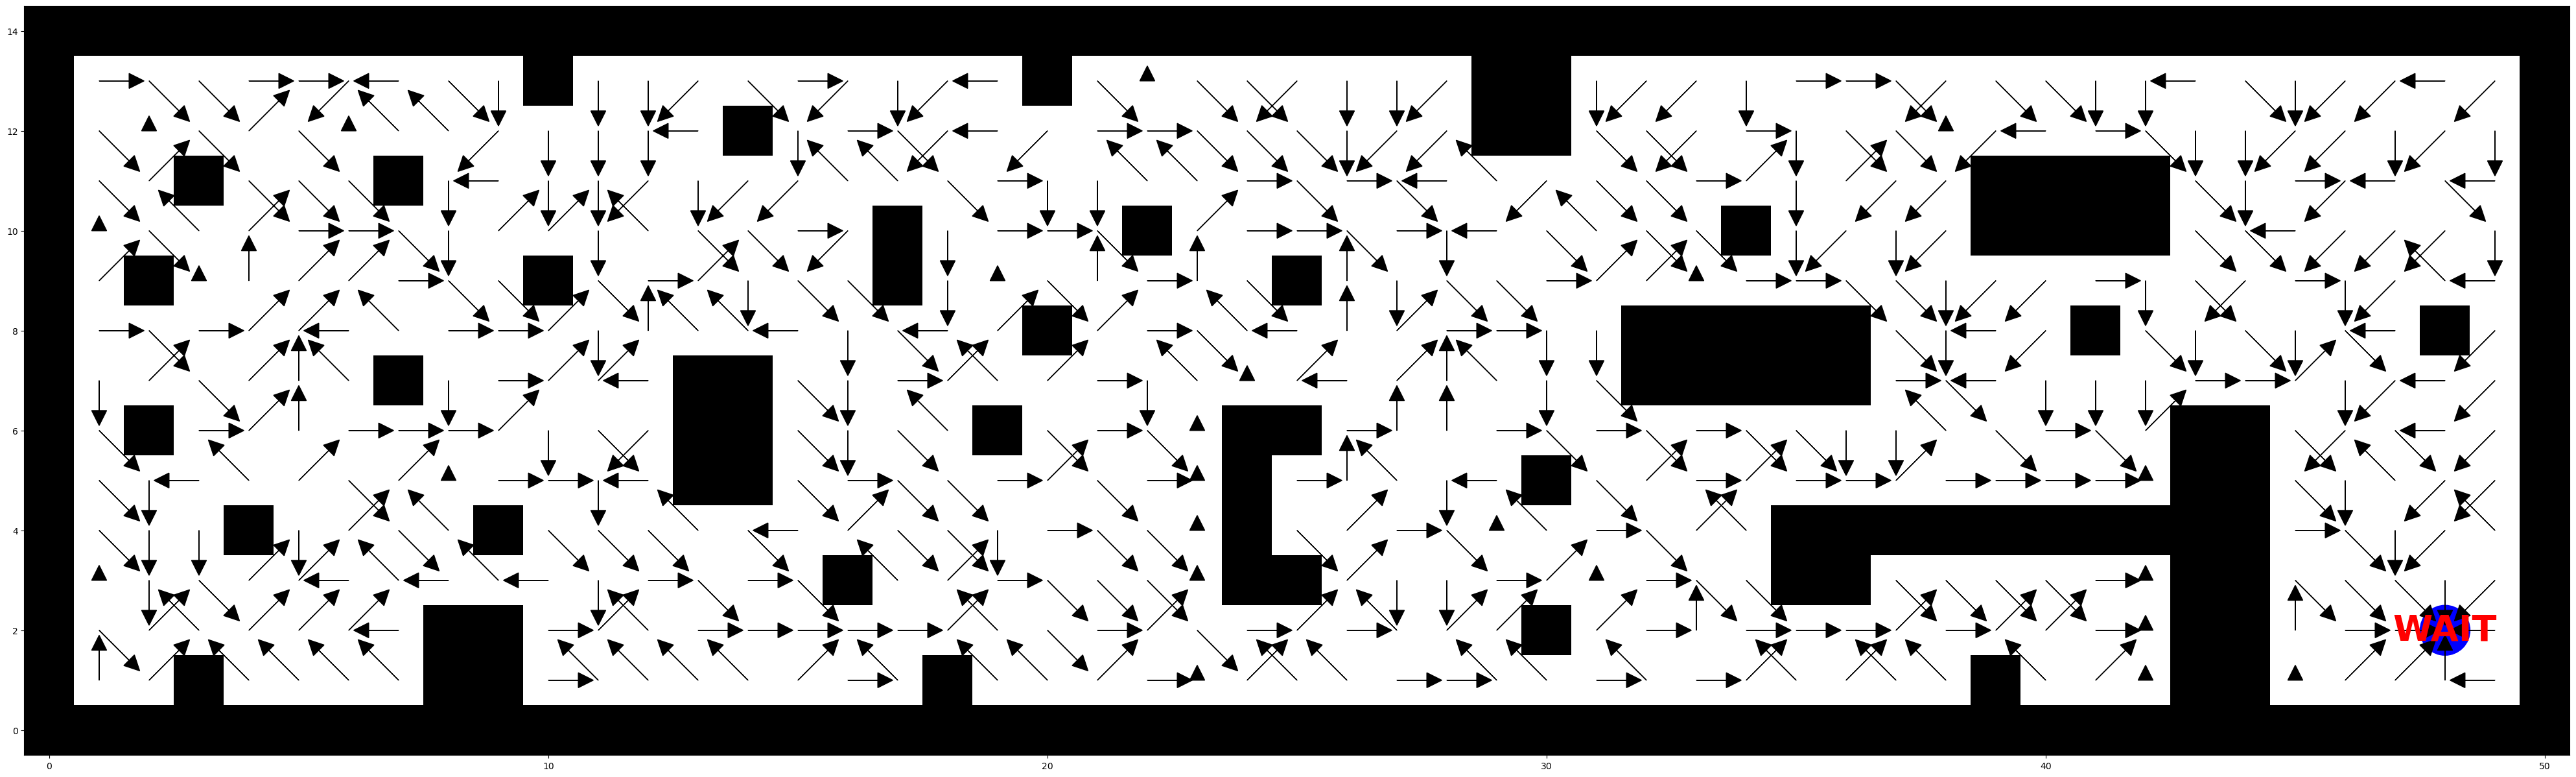

In [99]:
politica_mc_optima = monte_carlo(mapa, destino, 5000, gamma=0.95)
visualiza_politica(politica_mc_optima)

#### SARSA

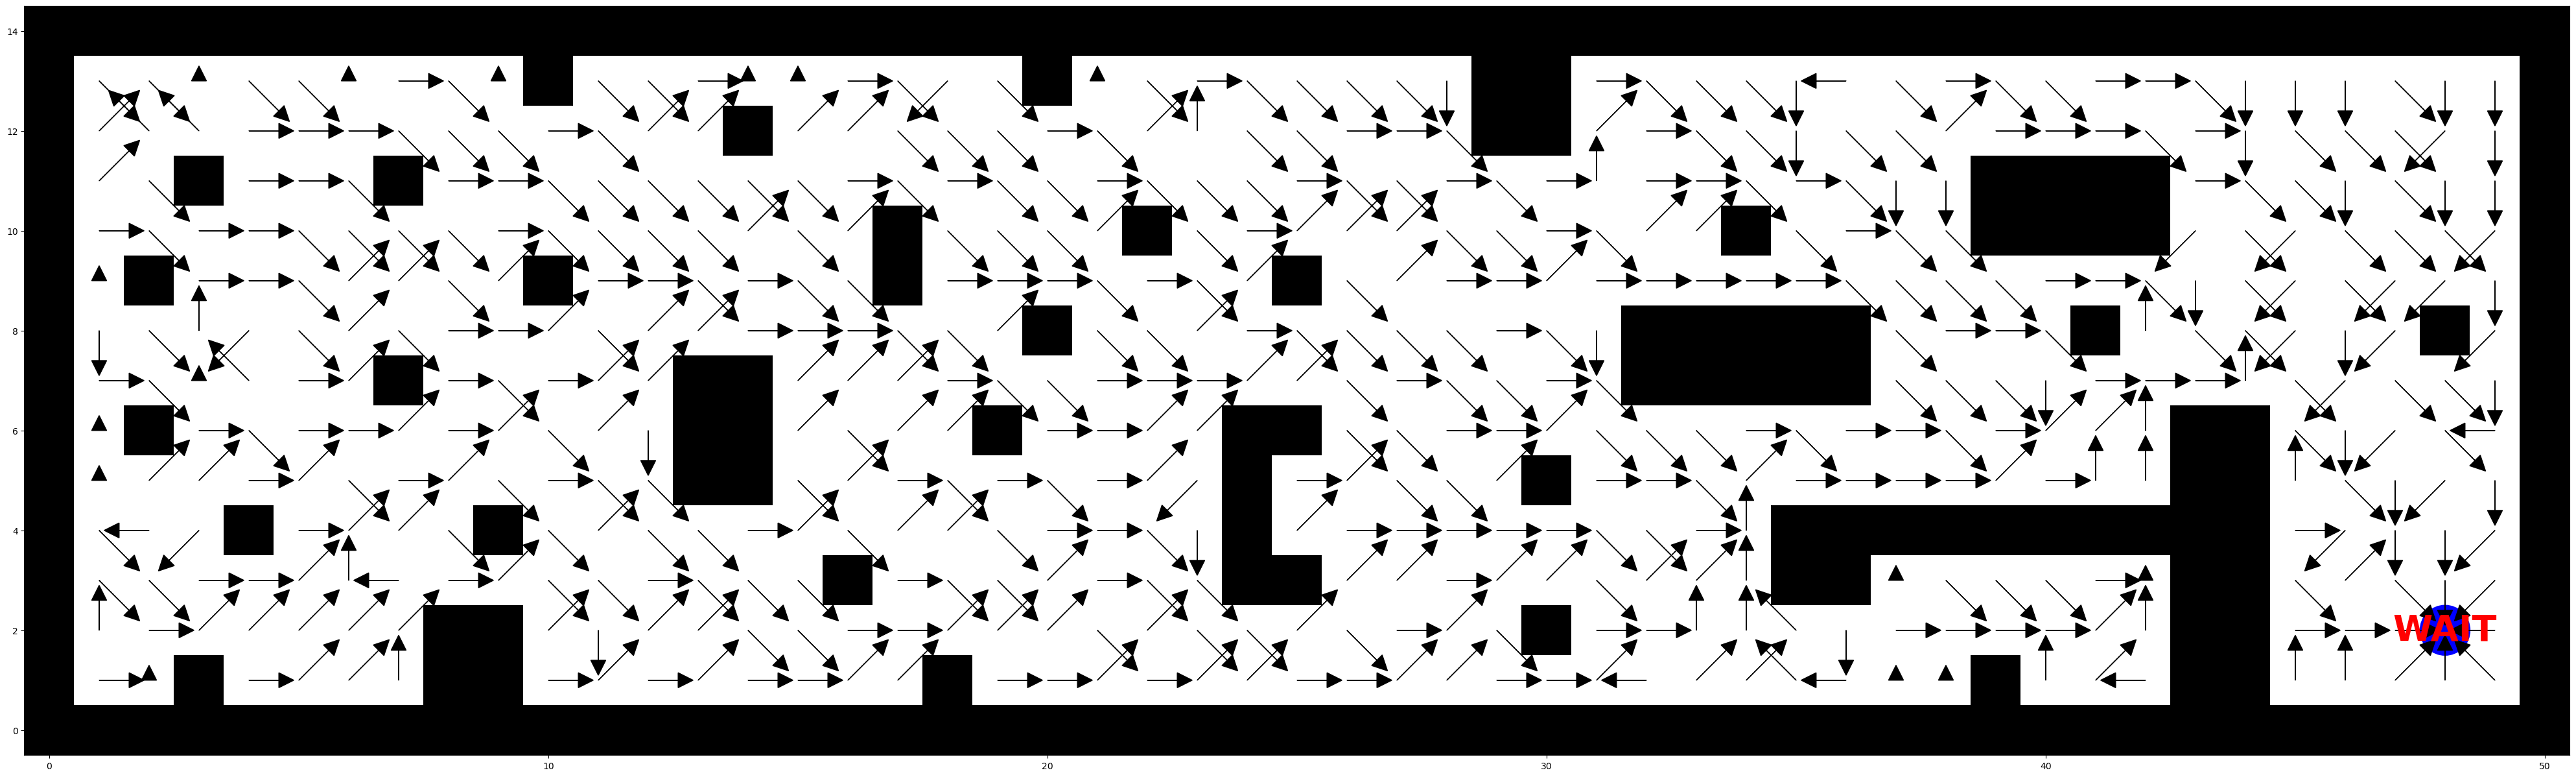

In [100]:
politica_sarsa_optima = sarsa(mapa, destino, 100000, alpha=0.05, gamma=0.95, epsilon=0.05)
visualiza_politica(politica_sarsa_optima)

### Mapa 3

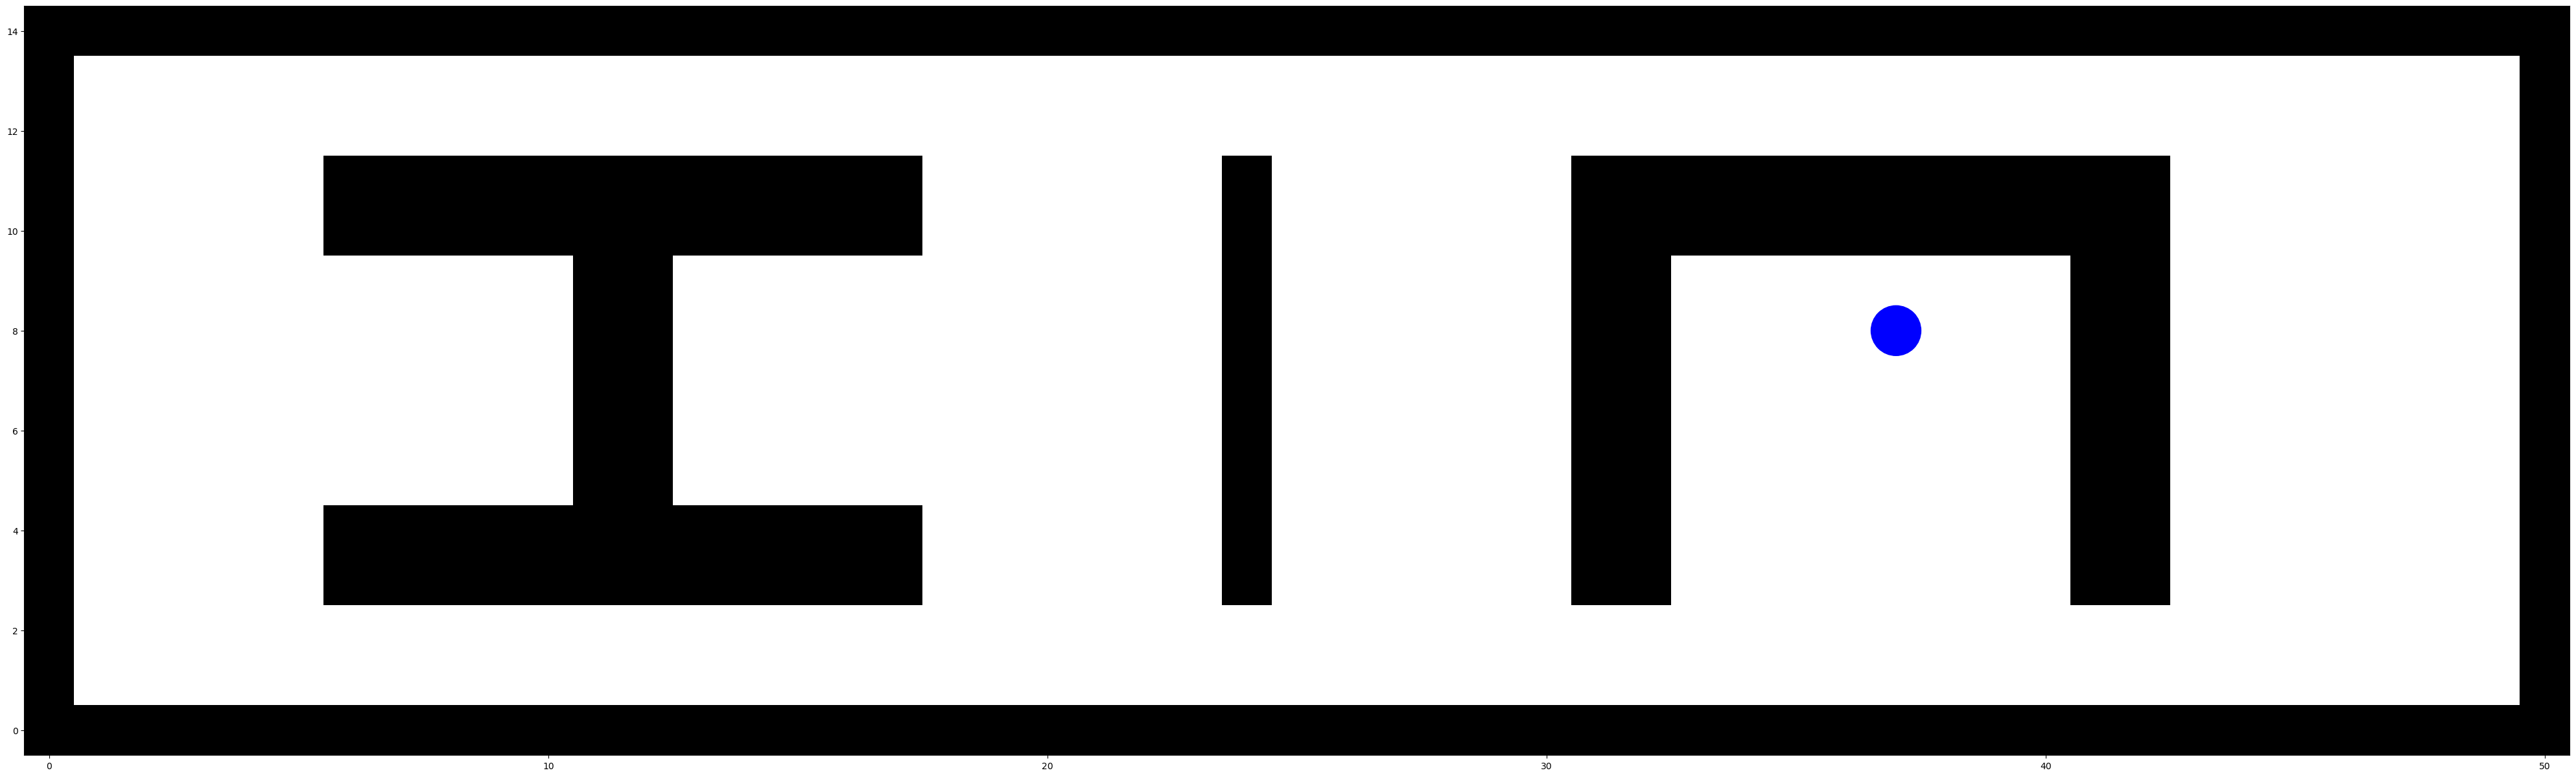

In [101]:
mapa,destino = lee_mapa("map3.txt")
visualiza_mapa()

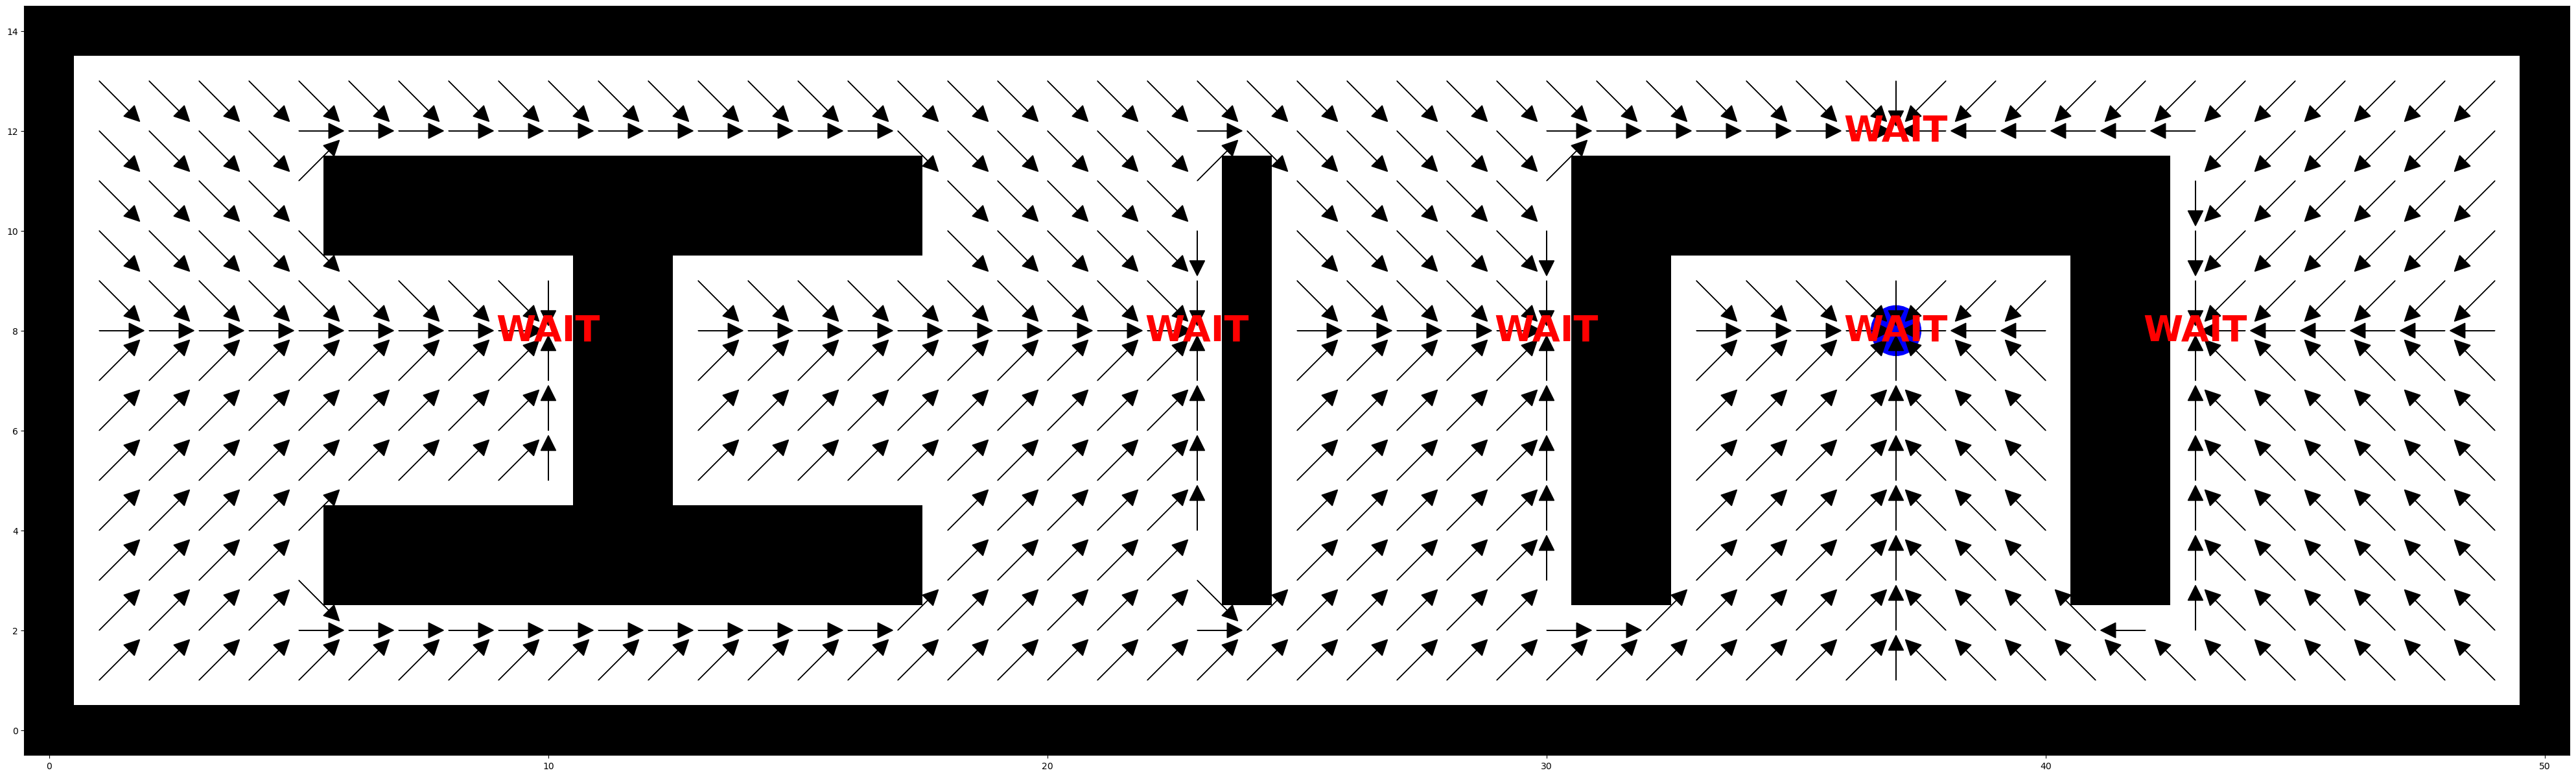

In [102]:
politica_greedy = crea_politica_greedy()
visualiza_politica(politica_greedy)

### Comparativa de algoritmos en el mapa 3

#### Q-Learning

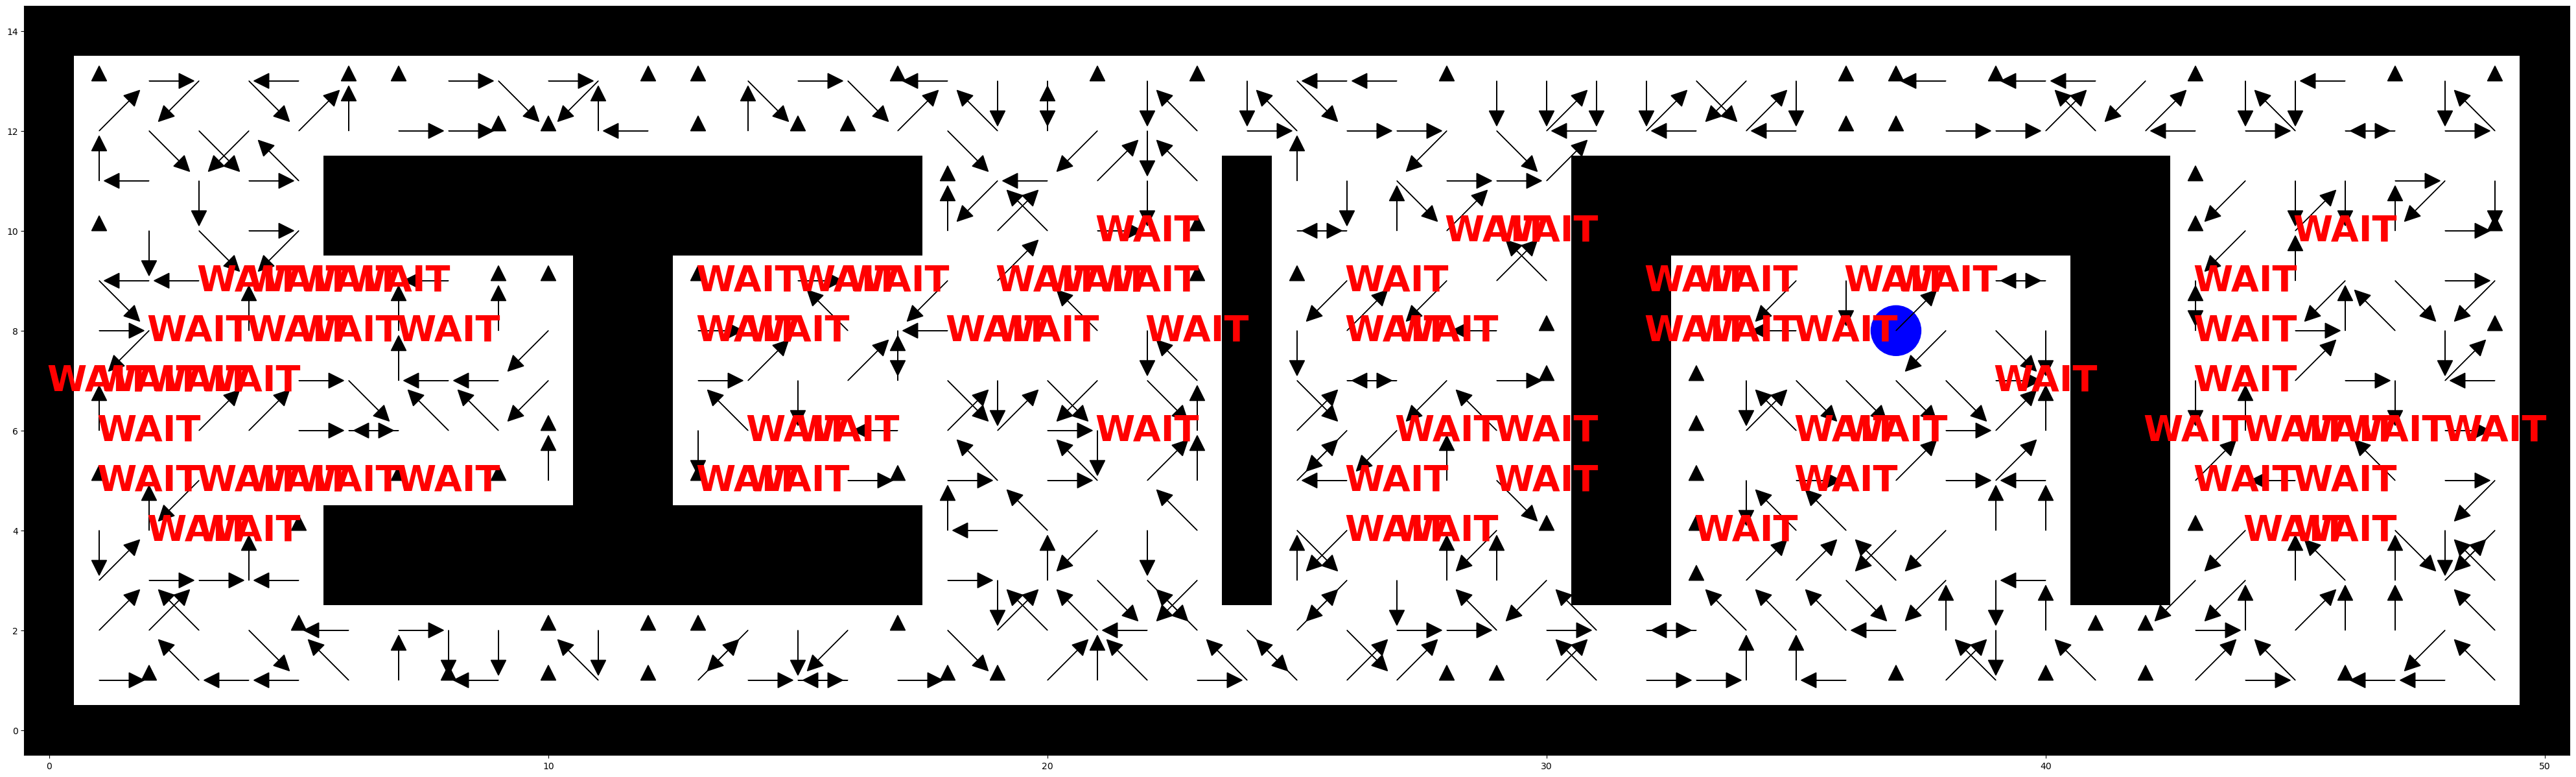

In [103]:
ql_optima = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.99, n_iter=100000)
ql_optima.run()
politica_ql_optima = parsea_politica_ql(ql_optima)
visualiza_politica(politica_ql_optima)

#### Montecarlo

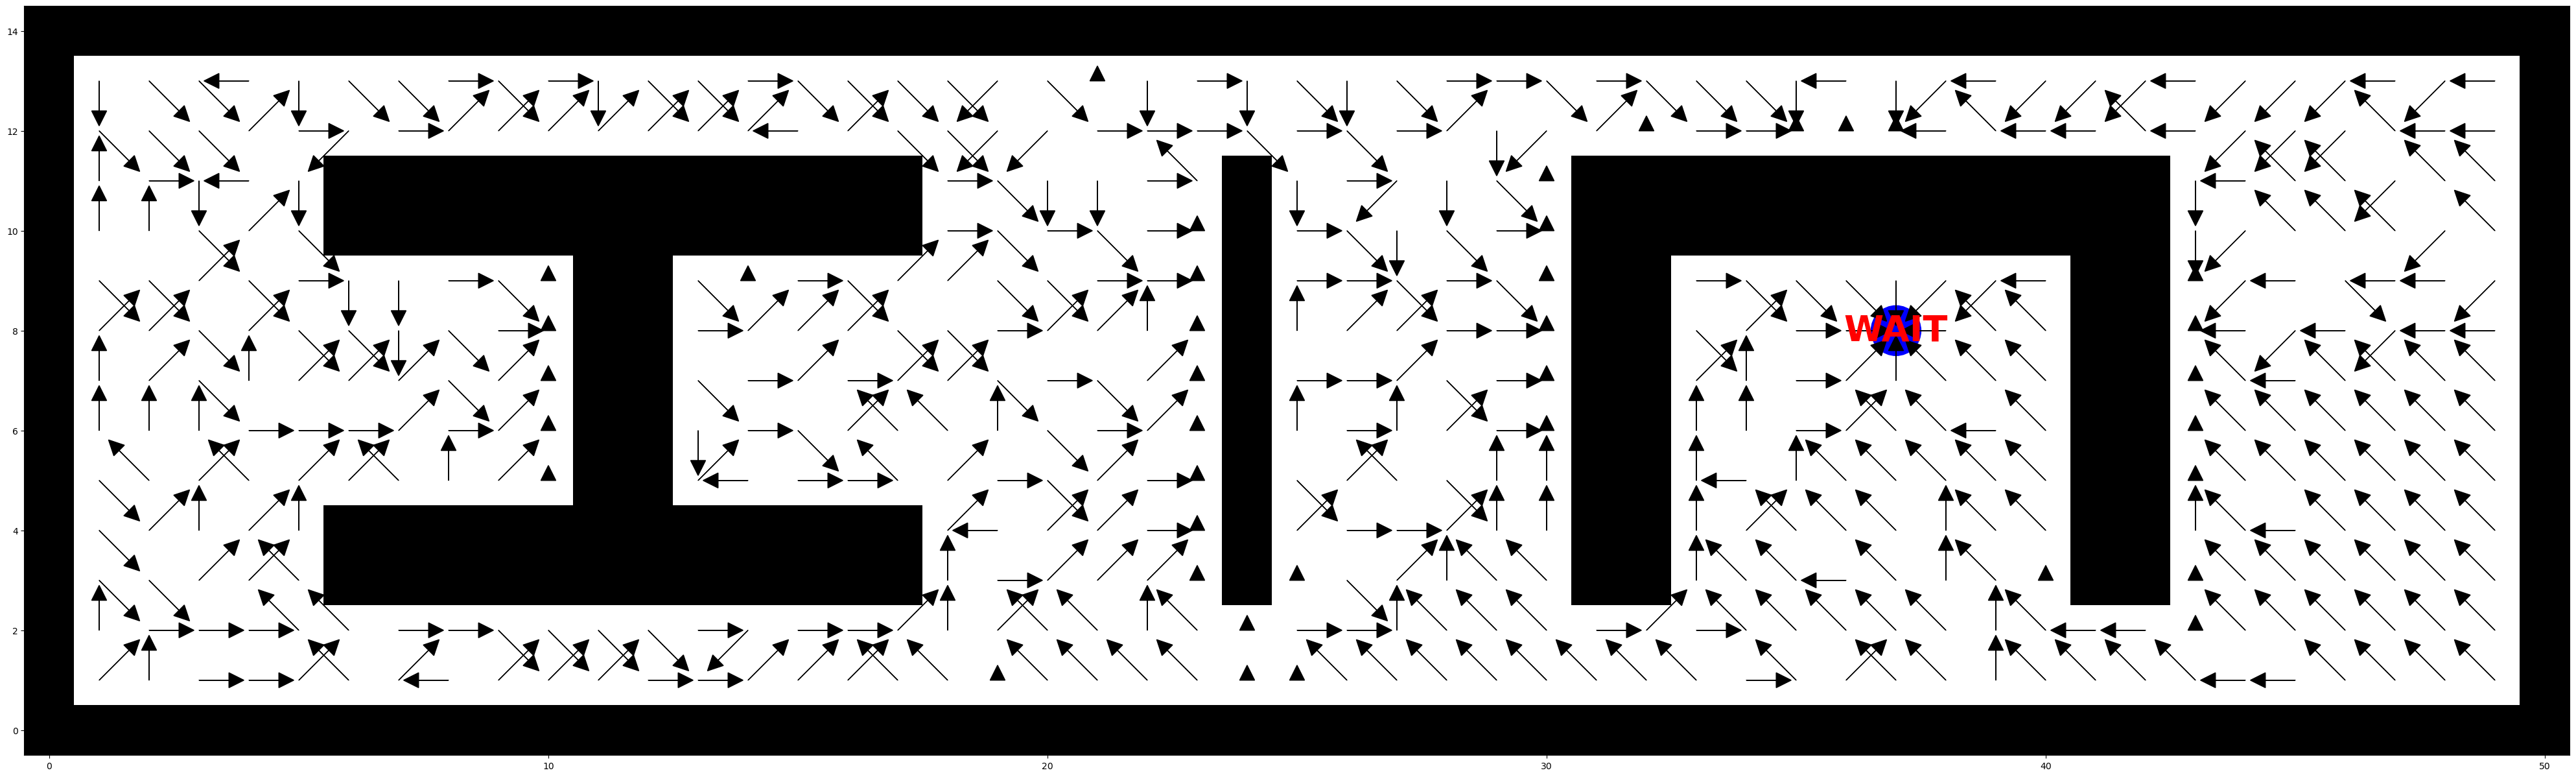

In [104]:
politica_mc_optima = monte_carlo(mapa, destino, 5000, gamma=0.95)
visualiza_politica(politica_mc_optima)

#### SARSA

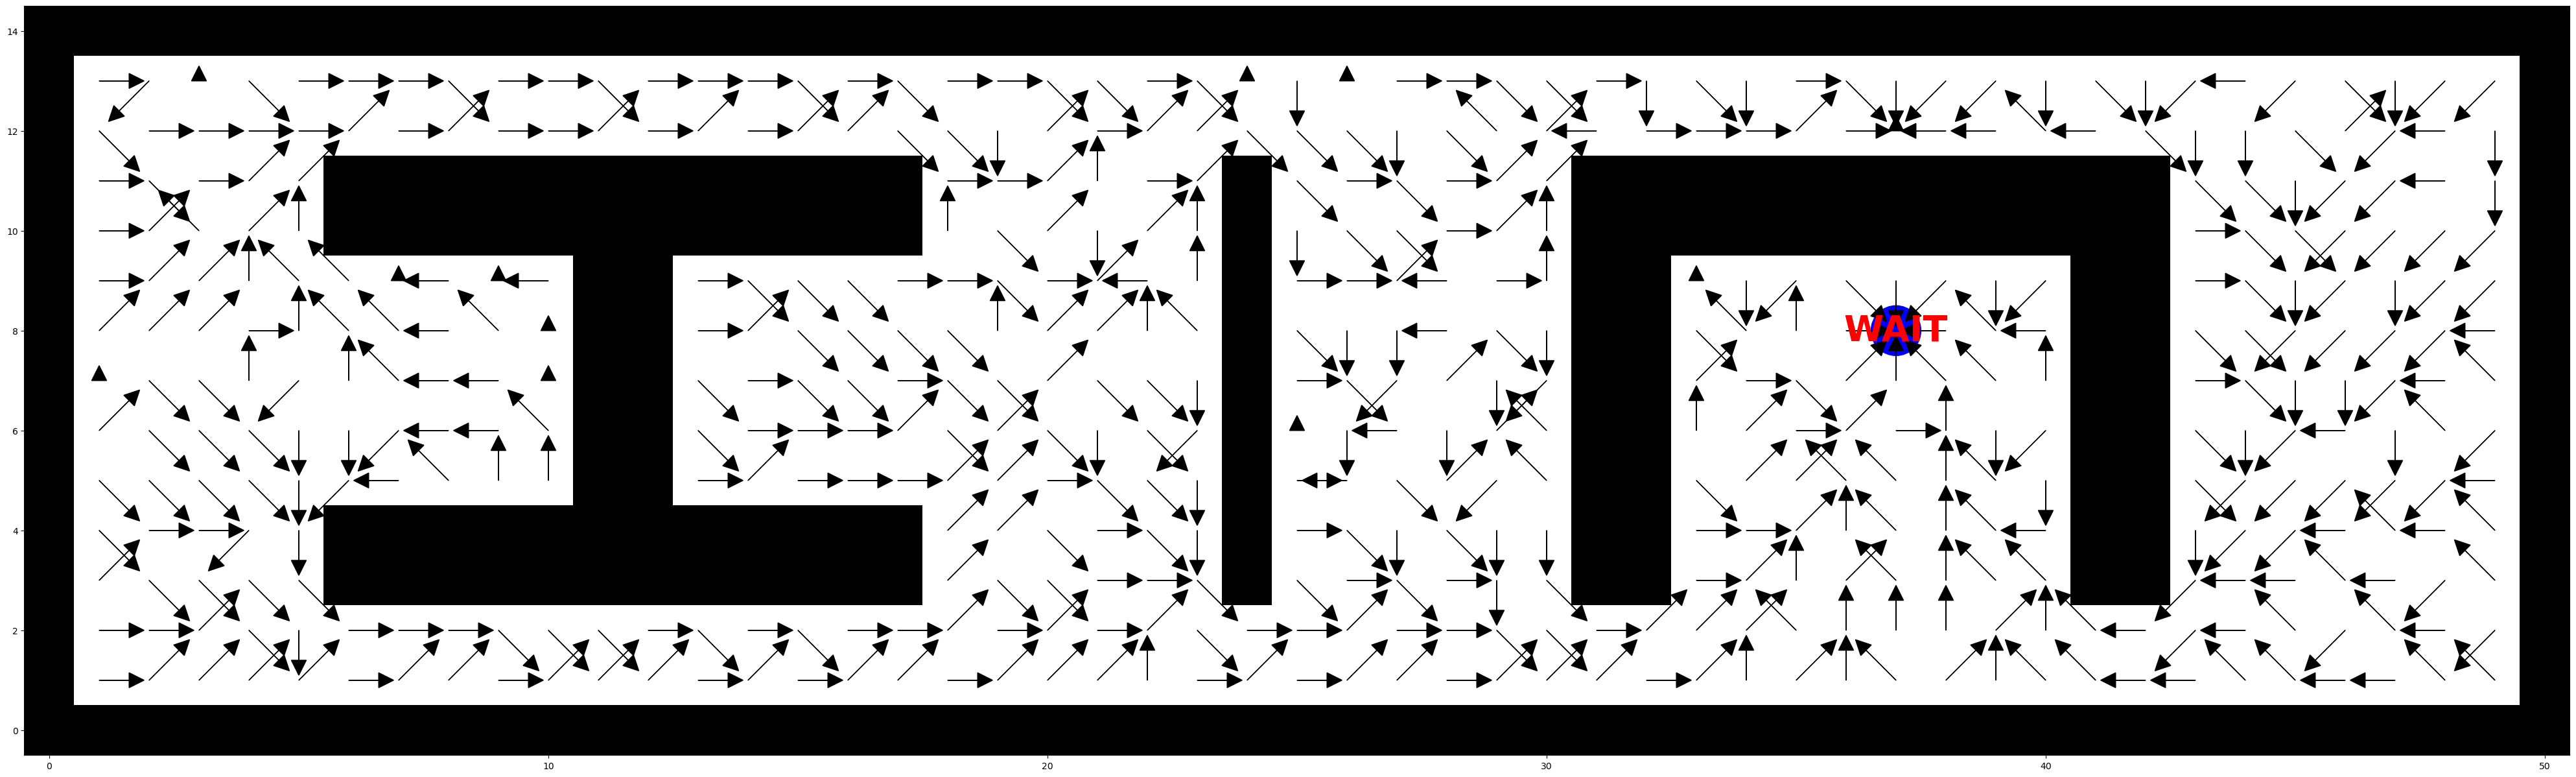

In [105]:
politica_sarsa_optima = sarsa(mapa, destino, 100000, alpha=0.05, gamma=0.95, epsilon=0.05)
visualiza_politica(politica_sarsa_optima)

#### **Diferencias entre algoritmos usados**

##### Q-learning vs. Monte Carlo
- **Q-learning**: Al ser un algoritmo off-policy, permite una gran flexibilidad en el aprendizaje, ya que no está atado a seguir una política específica durante la exploración. Utiliza una actualización basada en la recompensa estimada del mejor camino posible, haciendo uso intensivo de la función max para decidir la próxima acción.

- **Monte Carlo**: Este método no depende de una actualización paso a paso de la función de valor. En cambio, acumula las recompensas totales al final del episodio y las usa para hacer una actualización integral. Esto lo hace particularmente útil en entornos con recompensas diferidas y puede ofrecer una estimación más estable y menos sesgada en comparación con métodos que dependen de estimaciones de estado futuro, como Q-learning.

##### SARSA vs. Q-learning
- **SARSA**: Es un algoritmo on-policy que evalúa y mejora la misma política que está siendo usada para tomar decisiones. Actualiza los valores Q usando la acción que realmente se tomó, la cual es determinada por la política actual.

- **Q-learning**: Es un algoritmo off-policy que evalúa una política que toma las mejores acciones posibles (greedy), independientemente de la acción tomada por la política actual. Actualiza los valores Q usando el máximo valor Q estimado para el próximo estado, independientemente de la acción elegida según la política ε-greedy.

##### SARSA vs. Monte Carlo
- **SARSA**: Actualiza los valores Q después de cada paso, usando estimaciones basadas en la siguiente acción y el siguiente estado.

- **Monte Carlo**: Espera hasta el final del episodio y luego actualiza los valores basándose en la secuencia completa de estados y recompensas del episodio. No se basa en una aproximación del siguiente valor Q, sino que utiliza la recompensa real acumulada.

### **Conclusiones**

Después de comparar los algoritmos con distintos hiperparámetros en un mapa, se determinaron los valores óptimos para aplicarlos a dos nuevos mapas utilizando Q-Learning, Monte-Carlo, SARSA y la política greedy. El peor resultado se obtuvo con Q-Learning, ya que no proporcionó una política efectiva y mostró inconsistencias en el mapa. Por otro lado, tanto Monte-Carlo como SARSA determinaron políticas bastante óptimas. Sin embargo, al comparar en detalle los resultados del último mapa, SARSA demostró ser superior, ya que sus flechas apuntaban más acertadamente hacia el camino que se debe tomar. Además, al calcular la política greedy, observamos que esta se queda en espera o "WAIT" en varias partes del mapa, indicando una ineficiencia en ciertas áreas. Estos resultados sugieren que, aunque Monte-Carlo y SARSA son efectivos, SARSA presenta una ligera ventaja en precisión, haciéndolo el más recomendable para nuevos mapas.
